# Table of Contents

1. Preliminary Data Analysis
   - 1.1 Columns and their types
   - 1.2 Summary Statistics
   - 1.3 Null Values Handling
     - 1.3.1 Distribution of Null values throughout the dataset
     - 1.3.2 Null value count and percentage by column
     - 1.3.3 "workclass" column null value handling
     - 1.3.4 "occupation" column null values handle
     - 1.3.5 "native-country" column null value handling
     - 1.3.6 Confirming that null values are successfully handled
   - 1.4. Duplicate Values handling
   
2. Exploitary data analysis and Feature engineering
   - 2.1 Exploitary data analysis and Feature engineering on columns containing categorical data
     - 2.1.1 Exploitary data analysis and Feature engineering on "income" column
     - 2.1.2 Exploitary data analysis and Feature engineering on "education" column
     - 2.1.3 Exploitary data analysis and Feature engineering on "workclass" column
     - 2.1.4 Exploitary data analysis and Feature engineering on "occupation" column
     - 2.1.5 Exploitary data analysis and Feature engineering on "sex" column
     - 2.1.6 Exploitary data analysis and Feature engineering on "marital-status" column
     - 2.1.7 Exploitary data analysis and Feature engineering on "native-country" column
     - 2.1.8 Exploitary data analysis and Feature engineering on "relationship" column
     - 2.1.9 Exploitary data analysis and Feature engineering on "race" column
   - 2.2 Exploitary data analysis and Feature engineering on columns containing Numerical data
     - 2.2.1 Correlation matrix
     - 2.2.2 5 number summary
     - 2.2.3 Exploitary data analysis on "education-num" column
     - 2.2.4 Exploitary data analysis on "capital-loss" column
     - 2.2.5 Exploitary data analysis on "hours-per-week" column
     - 2.2.6 Exploitary data analysis on "age" column
     - 2.2.7 Exploitary data analysis on "fnlwgt" column
   - 2.3. Handling the duplicate values occured during feature engineering

3. Feature Scaling and Feature selection
   - 3.1 Label Encoding Columns with categorical data
   - 3.2 Standardization the "fnlwgt" column
   - 3.3 Feature Selection

4. Model Implementation before Imbalace Learning
   - 4.1.Train Test split
   - 4.2. RandomForestClassifier
   - 4.3. Naive Bayes

5. Imbalace Learning

6. Model Implementation
   - 6.1 Train, Test Data Split
   - 6.2. RandomForestClassifier
   - 6.3. Naive Bayes


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
sns.set(style='whitegrid')

# Set the seed value
random.seed(142)

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)  # None means unlimited rows
pd.set_option('display.max_columns', None)

# Importing the dataset via ucimlrepo package

In [3]:
#!pip install ucimlrepo 
from ucimlrepo import fetch_ucirepo
# fetch dataset
adult = fetch_ucirepo (id=2)
# data (as pandas ditaframes)
X = adult.data.features
y = adult.data.targets

In [4]:
X.shape

(48842, 14)

In [5]:
y.shape

(48842, 1)

In [6]:
X.head(10)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-States  
2             0             0              40  United-States  
3             0             0              40  United-States  
4             0             0              40           Cuba  
5             0             0              40  United-States  
6             0             0              16        Jamaica  
7             0             0              45  United-States  
8         14084             0              50  United-States  
9          5178             0              40  United-States

In [7]:
y.head(10)

income
0  <=50K
1  <=50K
2  <=50K
3  <=50K
4  <=50K
5  <=50K
6  <=50K
7   >50K
8   >50K
9   >50K

In [8]:
#Join X and y
df=X.join(y)
df.head(10)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K  
5             0             0              40  United-States  <=50K  
6             0             0              16        Jamaica  <=50K  
7             0             0              45  United-States   >50K  
8         14084             0              50  United-States   >50K  
9          5178             0              40  United-States   >50K

# 1. Preliminary Data Analysis

## 1.1. Columns and their types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## 1.2. Summary Statistics

In [10]:
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [11]:
#Summary table of catergorical data columns
data = []

for column in ['workclass',  'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
    unique_values = df[column].value_counts()
    for value, count in unique_values.items():
        data.append({'Column Name': column, 
                     'Unique Value': value, 
                     'Value Count': count})

unique_value_table = pd.DataFrame(data)
unique_value_table.set_index(['Column Name', 'Unique Value','Value Count'], inplace=True)

unique_value_table


Empty DataFrame
Columns: []
Index: [(workclass, Private, 33906), (workclass, Self-emp-not-inc, 3862), (workclass, Local-gov, 3136), (workclass, State-gov, 1981), (workclass, ?, 1836), (workclass, Self-emp-inc, 1695), (workclass, Federal-gov, 1432), (workclass, Without-pay, 21), (workclass, Never-worked, 10), (education, HS-grad, 15784), (education, Some-college, 10878), (education, Bachelors, 8025), (education, Masters, 2657), (education, Assoc-voc, 2061), (education, 11th, 1812), (education, Assoc-acdm, 1601), (education, 10th, 1389), (education, 7th-8th, 955), (education, Prof-school, 834), (education, 9th, 756), (education, 12th, 657), (education, Doctorate, 594), (education, 5th-6th, 509), (education, 1st-4th, 247), (education, Preschool, 83), (marital-status, Married-civ-spouse, 22379), (marital-status, Never-married, 16117), (marital-status, Divorced, 6633), (marital-status, Separated, 1530), (marital-status, Widowed, 1518), (marital-status, Married-spouse-absent, 628), (marital-status, Married-AF-spouse, 37), (occupation, Prof-specialty, 6172), (occupation, Craft-repair, 6112), (occupation, Exec-managerial, 6086), (occupation, Adm-clerical, 5611), (occupation, Sales, 5504), (occupation, Other-service, 4923), (occupation, Machine-op-inspct, 3022), (occupation, Transport-moving, 2355), (occupation, Handlers-cleaners, 2072), (occupation, ?, 1843), (occupation, Farming-fishing, 1490), (occupation, Tech-support, 1446), (occupation, Protective-serv, 983), (occupation, Priv-house-serv, 242), (occupation, Armed-Forces, 15), (relationship, Husband, 19716), (relationship, Not-in-family, 12583), (relationship, Own-child, 7581), (relationship, Unmarried, 5125), (relationship, Wife, 2331), (relationship, Other-relative, 1506), (race, White, 41762), (race, Black, 4685), (race, Asian-Pac-Islander, 1519), (race, Amer-Indian-Eskimo, 470), (race, Other, 406), (sex, Male, 32650), (sex, Female, 16192), (native-country, United-States, 43832), (native-country, Mexico, 951), (native-country, ?, 583), (native-country, Philippines, 295), (native-country, Germany, 206), (native-country, Puerto-Rico, 184), (native-country, Canada, 182), (native-country, El-Salvador, 155), (native-country, India, 151), (native-country, Cuba, 138), (native-country, England, 127), (native-country, China, 122), (native-country, South, 115), (native-country, Jamaica, 106), (native-country, Italy, 105), (native-country, Dominican-Republic, 103), (native-country, Japan, 92), (native-country, Guatemala, 88), (native-country, Poland, 87), (native-country, Vietnam, 86), (native-country, Columbia, 85), (native-country, Haiti, 75), (native-country, Portugal, 67), (native-country, Taiwan, 65), (native-country, Iran, 59), (native-country, Greece, 49), (native-country, Nicaragua, 49), (native-country, Peru, 46), (native-country, Ecuador, 45), (native-country, France, 38), (native-country, Ireland, 37), (native-country, Hong, 30), (native-country, Thailand, 30), (native-country, Cambodia, 28), (native-country, Trinadad&Tobago, 27), (native-country, Laos, 23), (native-country, Yugoslavia, 23), (native-country, Outlying-US(Guam-USVI-etc), 23), (native-country, Scotland, 21), (native-country, Honduras, 20), ...]

## 1.3. Null Values Handling
### 1.3.1. Distribution of Null values through out the dataset

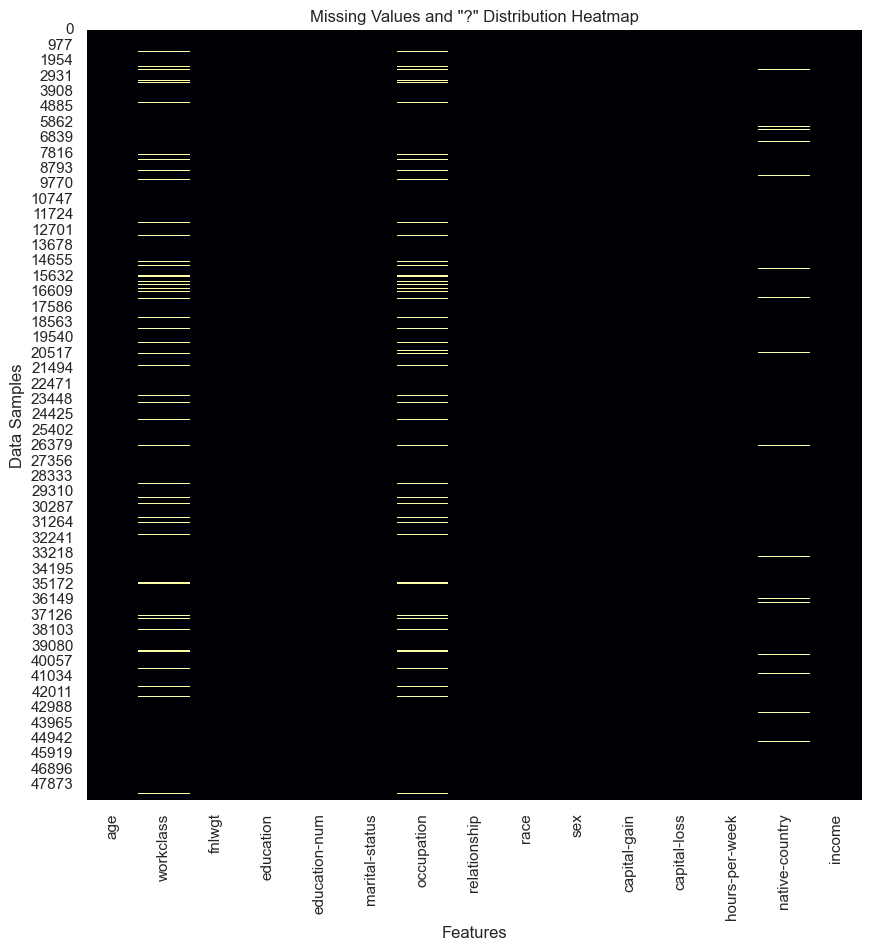

In [12]:
# Create a combined mask for both NaN values and cells containing "?"
combined_mask = df.isnull() | (df == "?")

plt.figure(figsize=(10, 10))

# Plot combined heatmap
sns.heatmap(combined_mask, cbar=False, cmap='inferno')
plt.title('Missing Values and "?" Distribution Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Samples')

plt.show()


### 1.3.2. Null value and "?" count and percentage by column

In [13]:
null_counts = df.isnull().sum()| (df == "?").sum()
# Calculate percentages
null_percentages = (null_counts / len(df)) * 100

# Concatenate null counts and percentages into a DataFrame
null_info = pd.concat([null_counts, null_percentages], axis=1)
null_info.columns = ['Null and "?" Count ', 'Null Percentage']
null_info

Null and "?" Count   Null Percentage
age                               0         0.000000
workclass                      2031         4.158306
fnlwgt                            0         0.000000
education                         0         0.000000
education-num                     0         0.000000
marital-status                    0         0.000000
occupation                     2039         4.174686
relationship                      0         0.000000
race                              0         0.000000
sex                               0         0.000000
capital-gain                      0         0.000000
capital-loss                      0         0.000000
hours-per-week                    0         0.000000
native-country                  855         1.750543
income                            0         0.000000

### Null values are identified in 3 columns

In [14]:
def value_counts_(selected_column):
    # Get value counts
    value_counts = selected_column.value_counts()
    # Get the maximum count
    max_count = value_counts.max()
    # Calculate the ratio of the highest count for each value
    ratio_highest_count = value_counts / max_count
    # Combine value counts and ratios into a DataFrame
    result_df = pd.DataFrame({'value_counts': value_counts, 'ratio_to_highest_value_count': ratio_highest_count})
    print(result_df)

### 1.3.3. "workclass" column null value handling

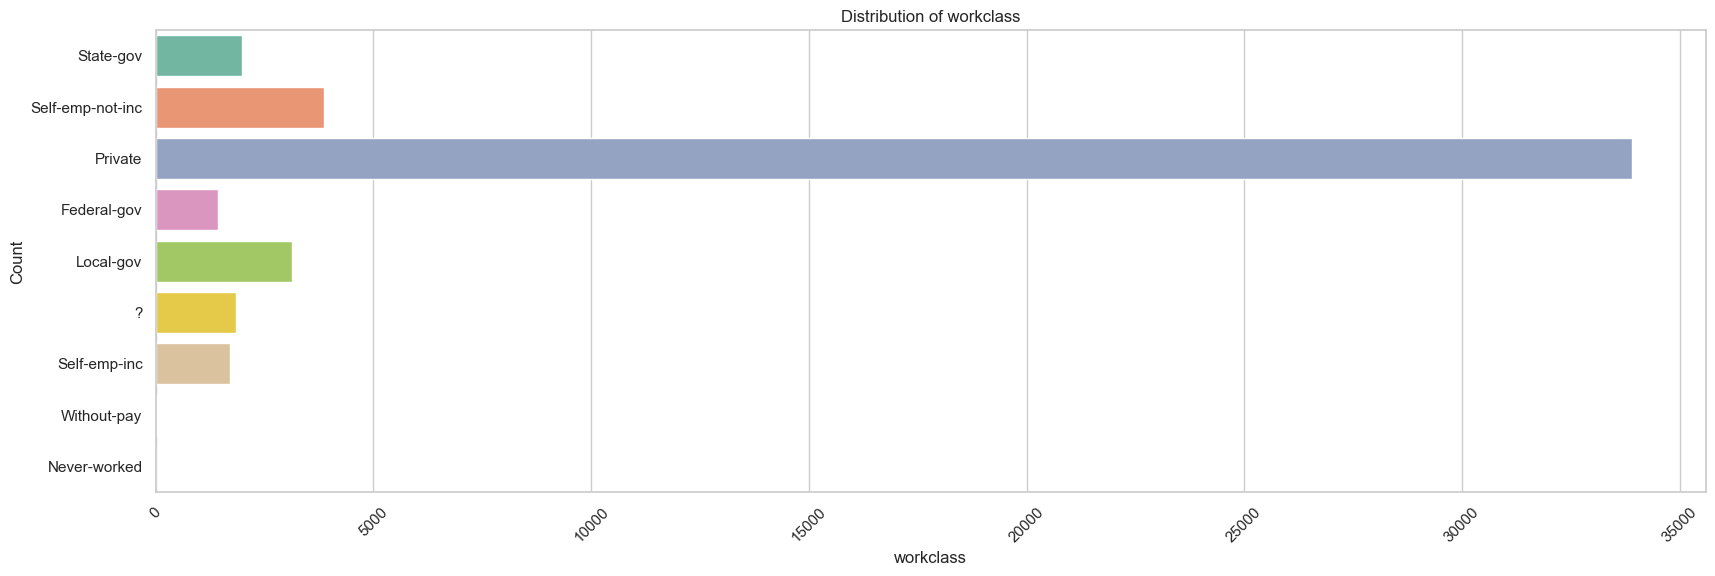

In [15]:
plt.figure(figsize=(20, 6))
sns.countplot(y=df['workclass'], palette='Set2')
plt.title(f'Distribution of workclass')
plt.xlabel('workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Replace missing values with mode
mode_value = df['workclass'].mode()[0]
df['workclass'].fillna(mode_value, inplace=True)

print('Null value count: ', df['workclass'].isnull().sum())

Null value count:  0


In [17]:
df['workclass'] = df['workclass'].apply(lambda value: mode_value if value == '?' else value)
print('? value count: ', (df['workclass']== "?").sum())

? value count:  0


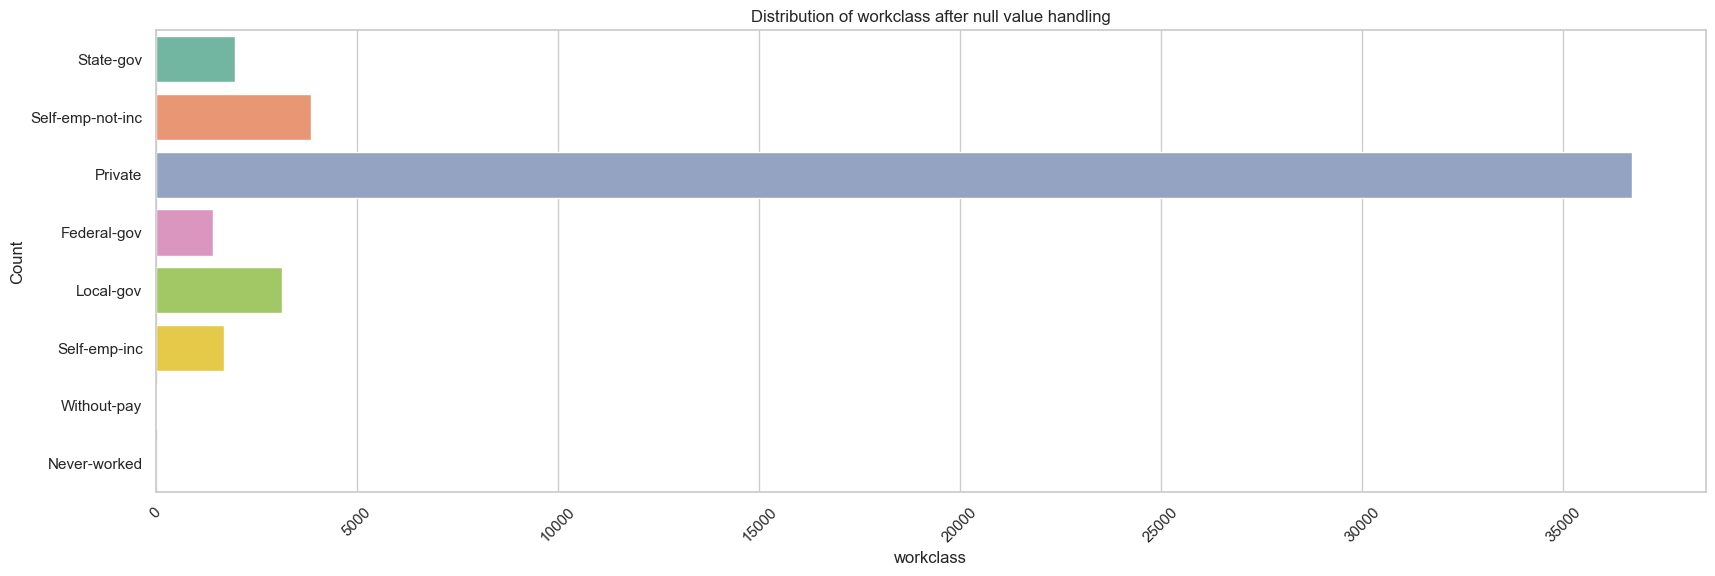

In [18]:
plt.figure(figsize=(20, 6))
sns.countplot(y=df['workclass'], palette='Set2')
plt.title(f'Distribution of workclass after null value handling')
plt.xlabel('workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 1.3.4. "occupation" column null values handle

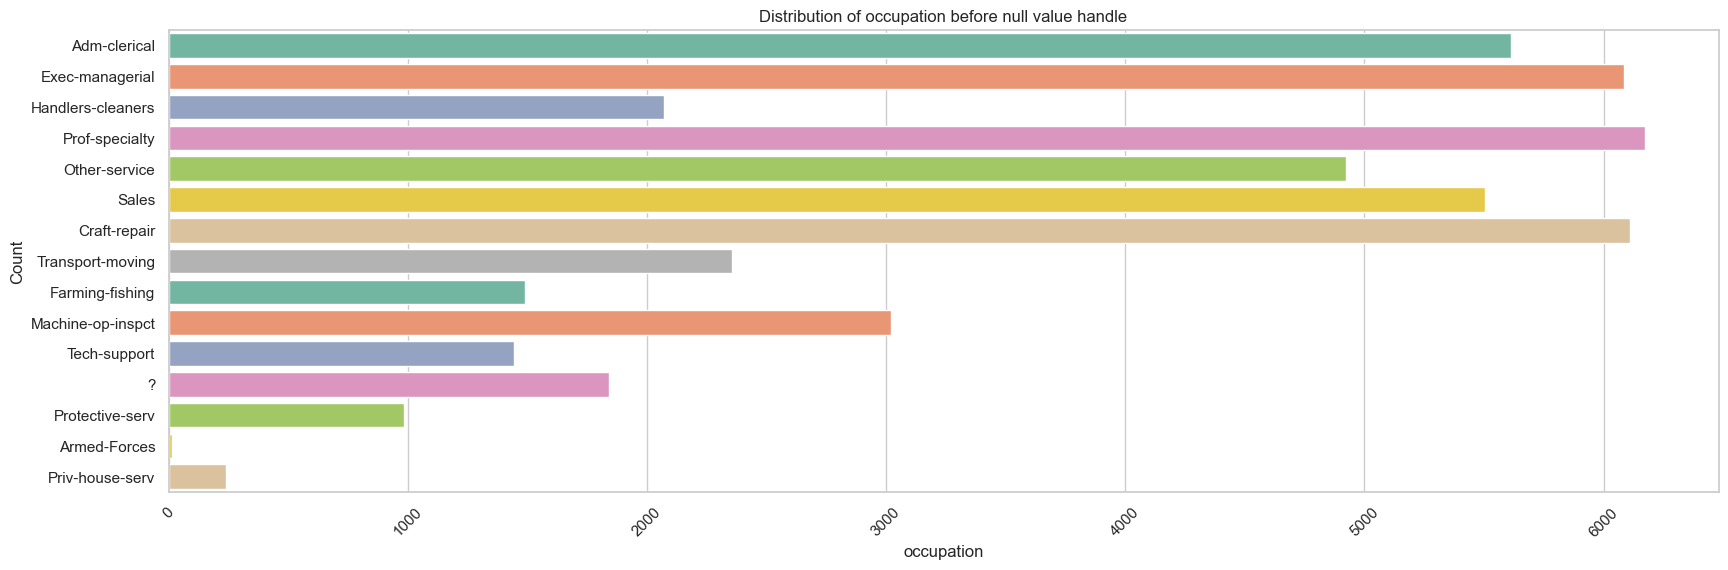

In [19]:
selected_column=df['occupation']
plt.figure(figsize=(20, 6))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of occupation before null value handle')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The mode of “occupation” column is “Prof-specialty”. But the value counts of “Exec-managerial” and “Craft-repair” are also close to the that of “Prof-specialty”. So instead of replacing the null values and “?” directly with the mode, a random values out of [ “Prof-specialty” ,“Exec-managerial” and “Craft-repair”] will be replaced with them.

In [20]:
replacing_values=['Prof-specialty','Craft-repair','Exec-managerial']
# Replace missing values with mode, the values that have a higher frequency 
df['occupation'].fillna(random.choice(replacing_values), inplace=True)

print('Null value count: ', df['occupation'].isnull().sum())


Null value count:  0


In [21]:
df['occupation'] = df['occupation'].apply(lambda value: random.choice(replacing_values) if value == '?' else value)
print('? value count:', (df['occupation'] == "?").sum())

? value count: 0


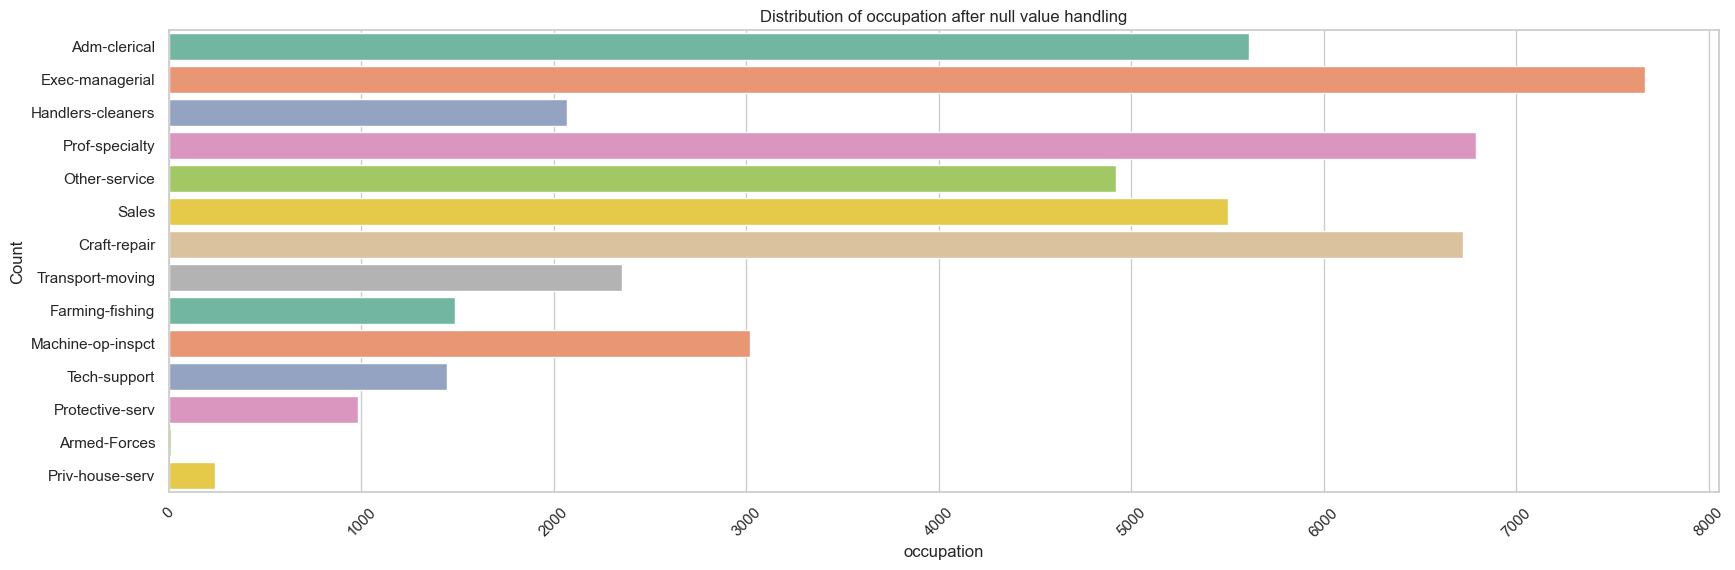

In [22]:
selected_column=df['occupation']
plt.figure(figsize=(20, 6))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of occupation after null value handling')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### 1.3.5. "native-country" column null value handling

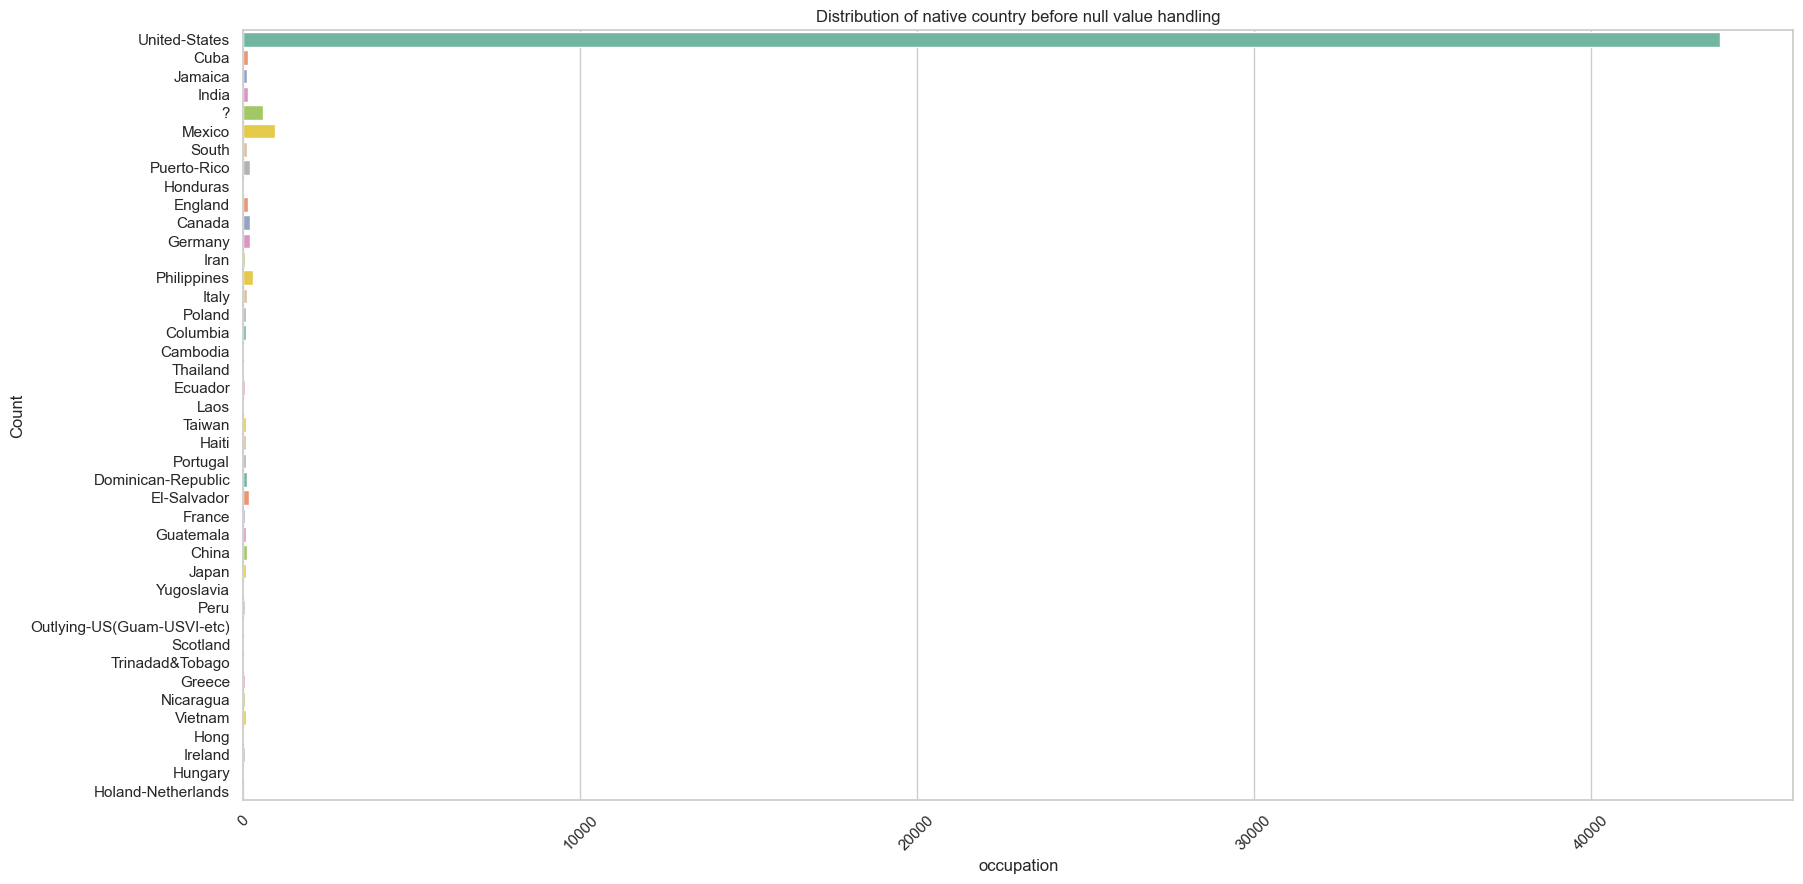

In [23]:
selected_column=df['native-country']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of native country before null value handling')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Replace missing values with mode
mode_value = df['native-country'].mode()[0]
df['native-country'].fillna(mode_value, inplace=True)

print('Null value count: ', df['native-country'].isnull().sum())

Null value count:  0


In [25]:
df['native-country'] = df['native-country'].apply(lambda value: mode_value if value == '?' else value)
print('? value count:', (df['native-country'] == "?").sum())

? value count: 0


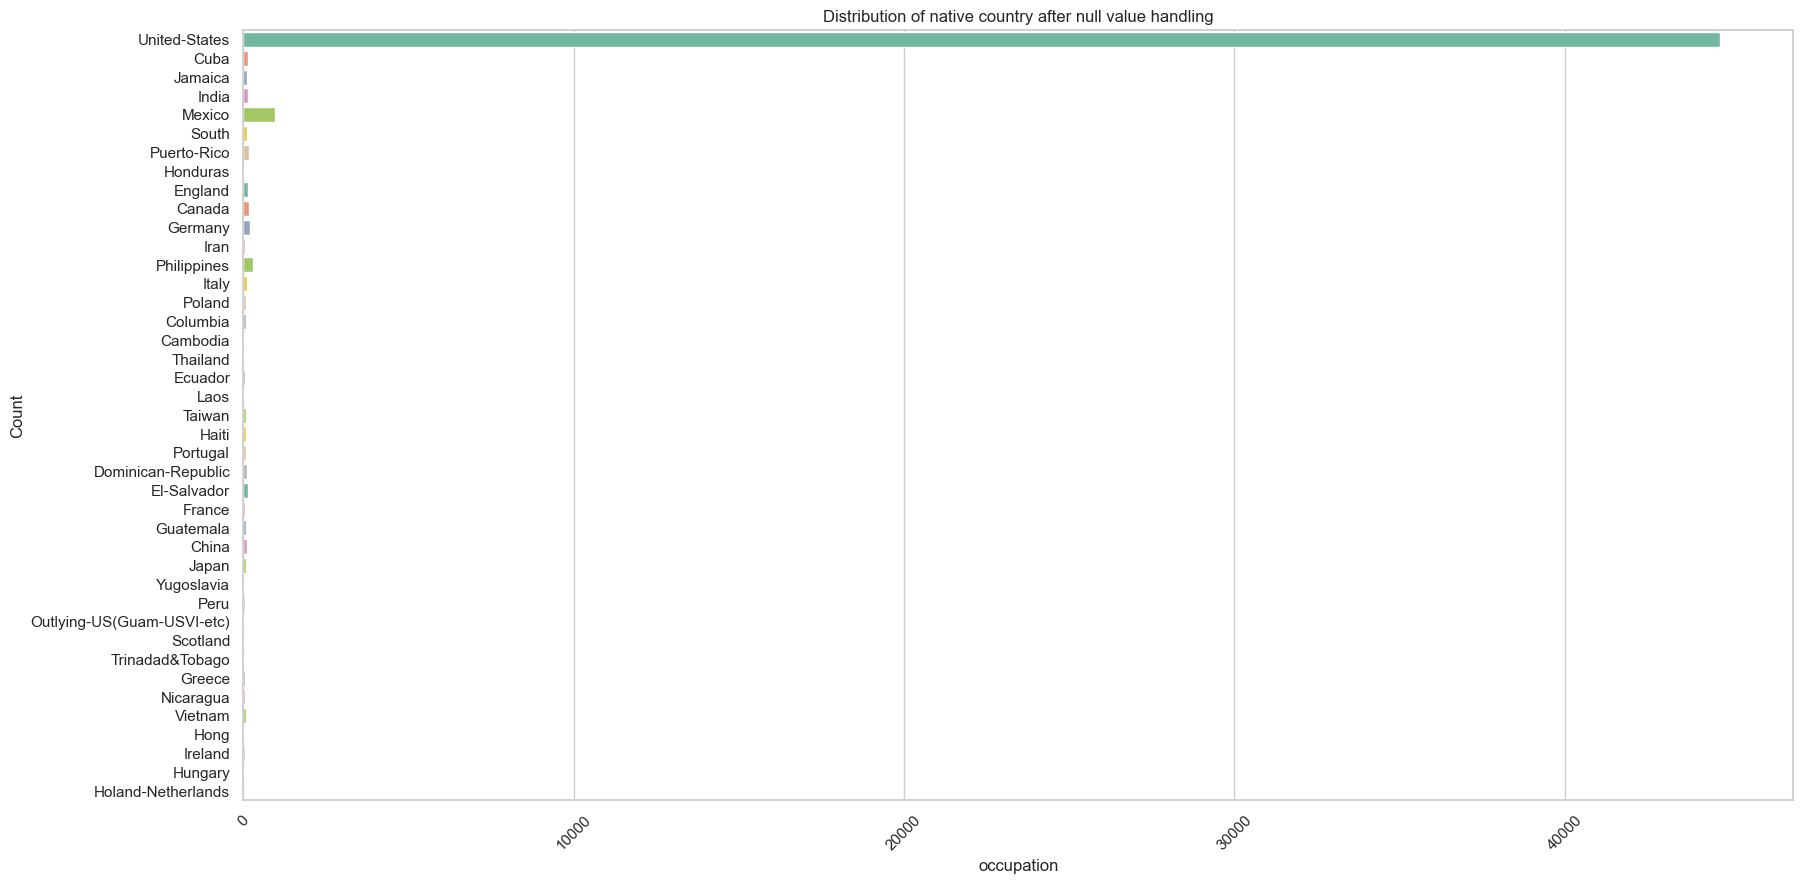

In [26]:
selected_column=df['native-country']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of native country after null value handling')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 1.3.6. Confirming that null values are succefully handled

In [27]:
null_counts = df.isnull().sum() + (df == "?").sum()
# Calculate percentages
null_percentages = (null_counts / len(df)) * 100

# Concatenate null counts and percentages into a DataFrame
null_info = pd.concat([null_counts, null_percentages], axis=1)
null_info.columns = ['Null and "?" Count ', 'Null Percentage']
null_info

Null and "?" Count   Null Percentage
age                               0              0.0
workclass                         0              0.0
fnlwgt                            0              0.0
education                         0              0.0
education-num                     0              0.0
marital-status                    0              0.0
occupation                        0              0.0
relationship                      0              0.0
race                              0              0.0
sex                               0              0.0
capital-gain                      0              0.0
capital-loss                      0              0.0
hours-per-week                    0              0.0
native-country                    0              0.0
income                            0              0.0

## 1.4. Duplicate Values handling

In [28]:
# Find duplicates considering all columns
duplicate_rows = df.duplicated()
print(df[duplicate_rows].shape)
df[duplicate_rows]


(30, 15)


age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
16151   46           Private  202560       HS-grad              9   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  367749     Bachelors             13   
22494   49  Self-emp-not-inc   43479  Some-college             10   
25872   23           Private  240137       5th-6th              3   
26313   28           Private  274679       Masters             14   
28230   27           Private  255582       HS-grad              9   
28522   42           Private  204235  Some-college             10   
28846   39           Private   30916       HS-grad              9   
29157   38           Private  207202       HS-grad              9   
30845   46           Private  133616  Some-college             10   
31993   19           Private  251579  Some-college             10   
32404   35           Private  379959       HS-grad              9   
33425   24           Private  194630     Bachelors             13   
43750   37           Private   52870     Bachelors             13   
43773   29           Private   36440     Bachelors             13   
46409   30           Private  180317     Assoc-voc             11   
48521   18      Self-emp-inc  378036          12th              8   

           marital-status         occupation   relationship  \
4881        Never-married       Craft-repair  Not-in-family   
5104        Never-married      Other-service  Not-in-family   
9171        Never-married     Prof-specialty      Own-child   
11631       Never-married       Tech-support  Not-in-family   
13084       Never-married    Priv-house-serv  Not-in-family   
15059       Never-married    Farming-fishing  Not-in-family   
16151  Married-civ-spouse    Exec-managerial           Wife   
17040  Married-civ-spouse       Craft-repair        Husband   
18555       Never-married      Other-service  Not-in-family   
18698       Never-married    Farming-fishing  Not-in-family   
21318       Never-married       Adm-clerical      Own-child   
21490       Never-married    Exec-managerial      Own-child   
21875  Married-civ-spouse       Craft-repair        Husband   
22300       Never-married    Priv-house-serv  Not-in-family   
22367       Never-married     Prof-specialty  Not-in-family   
22494  Married-civ-spouse       Craft-repair        Husband   
25872       Never-married  Handlers-cleaners  Not-in-family   
26313       Never-married     Prof-specialty  Not-in-family   
28230       Never-married  Machine-op-inspct  Not-in-family   
28522  Married-civ-spouse     Prof-specialty        Husband   
28846  Married-civ-spouse       Craft-repair        Husband   
29157  Married-civ-spouse  Machine-op-inspct        Husband   
30845            Divorced       Adm-clerical      Unmarried   
31993       Never-married      Other-service      Own-child   
32404            Divorced      Other-service  Not-in-family   
33425       Never-married     Prof-specialty  Not-in-family   
43750  Married-civ-spouse    Exec-managerial        Husband   
43773       Never-married       Adm-clerical  Not-in-family   
46409            Divorced  Machine-op-in

In [29]:
# Keep only the first occurrence of duplicates
df= df.drop_duplicates(keep='first')
duplicate_rows = df.duplicated()
print(df[duplicate_rows].shape)

(0, 15)


### Null Values are succefully handled

# 2. Exploitary data analysis and Feature engineering

The data preparation process will be conducted separately for categorical and numerical data
to ensure thorough exploration and feature engineering tailored to the nature of each type of
attribute.

## 2.1. Exploitary data analysis and Feature engineering on columns containing catergorical data

In [30]:
# A method to take perecentages of values of a certain column out of the whole dataset and the ratio of their value count to that of the mode.
def value_counts_(selected_column):
    # Get value counts
    value_counts = selected_column.value_counts()
    # Get the maximum count
    max_count = value_counts.max()
    # Calculate the ratio of the highest count for each value
    ratio_highest_count = value_counts / max_count
    # percentage out 0f whole dataset
    percentage = value_counts / len(df) *100
    # Combine value counts and ratios into a DataFrame
    result_df = pd.DataFrame({'value_counts': value_counts, 'ratio_to_highest_value_count': ratio_highest_count, 'percentage':percentage})
    print(result_df)

In [31]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

### 2.1.1. Exploitary data analysis and Feature engineering on "income" column

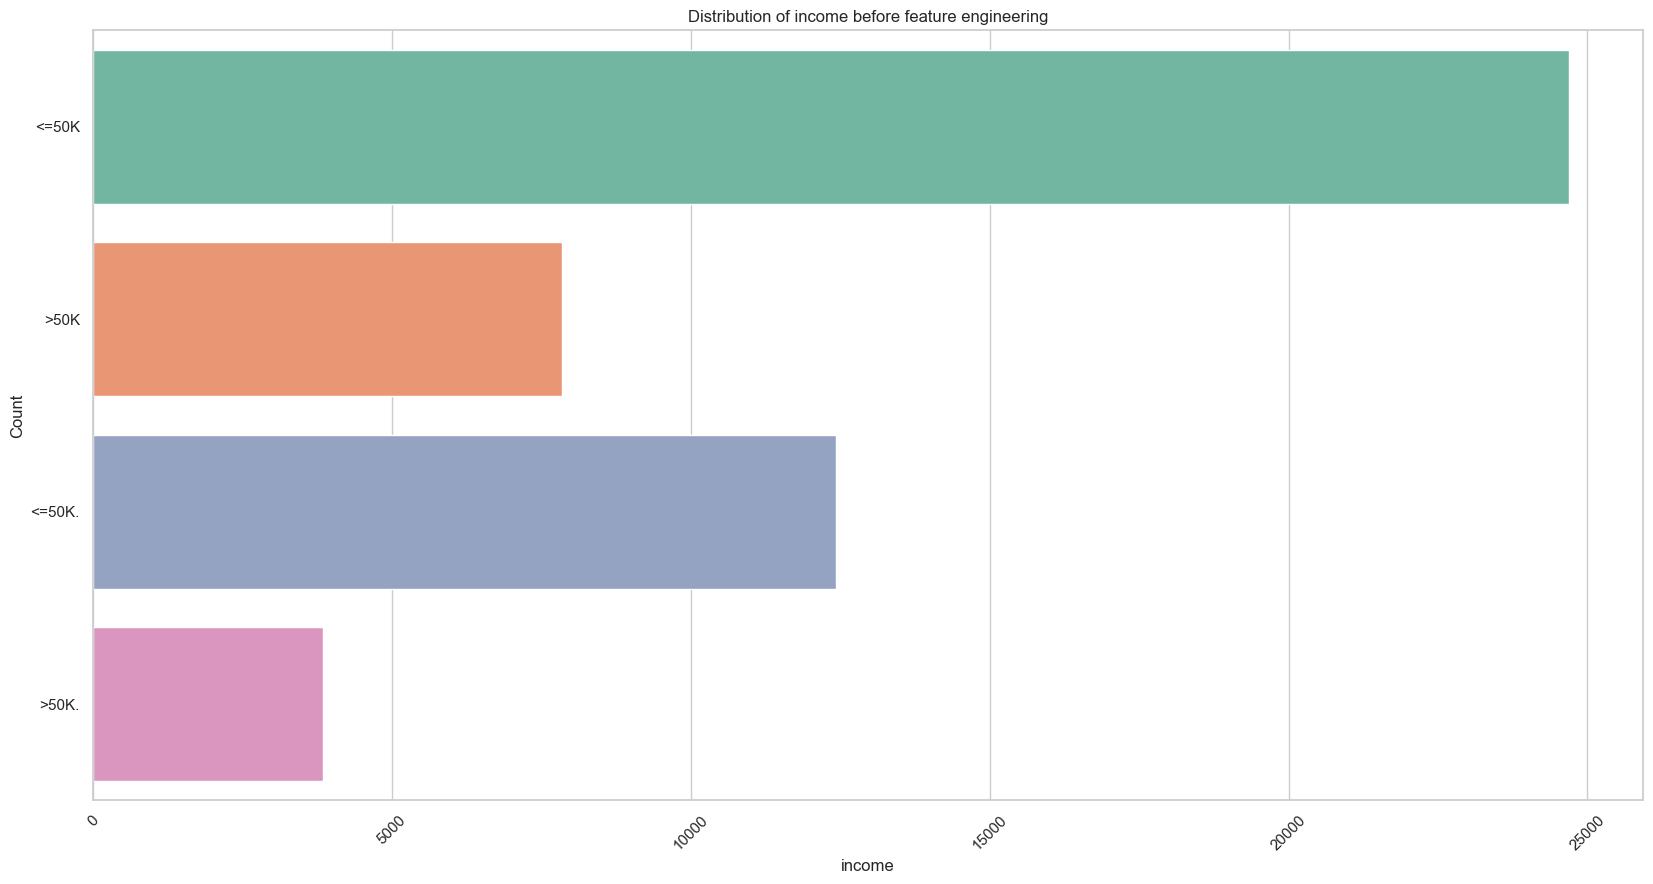

        value_counts  ratio_to_highest_value_count  percentage
income                                                        
<=50K          24698                      1.000000   50.598214
<=50K.         12430                      0.503280   25.465050
>50K            7838                      0.317354   16.057527
>50K.           3846                      0.155721    7.879210


In [32]:
selected_column=df['income']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of income before feature engineering')
plt.xlabel('income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

In [33]:
def process_income(income):
    if income=='<=50K.':
        return '<=50K'
    elif income=='>50K.':
        return '>50K'
    else:
        return income

In [34]:
df['income']=df['income'].apply(process_income)

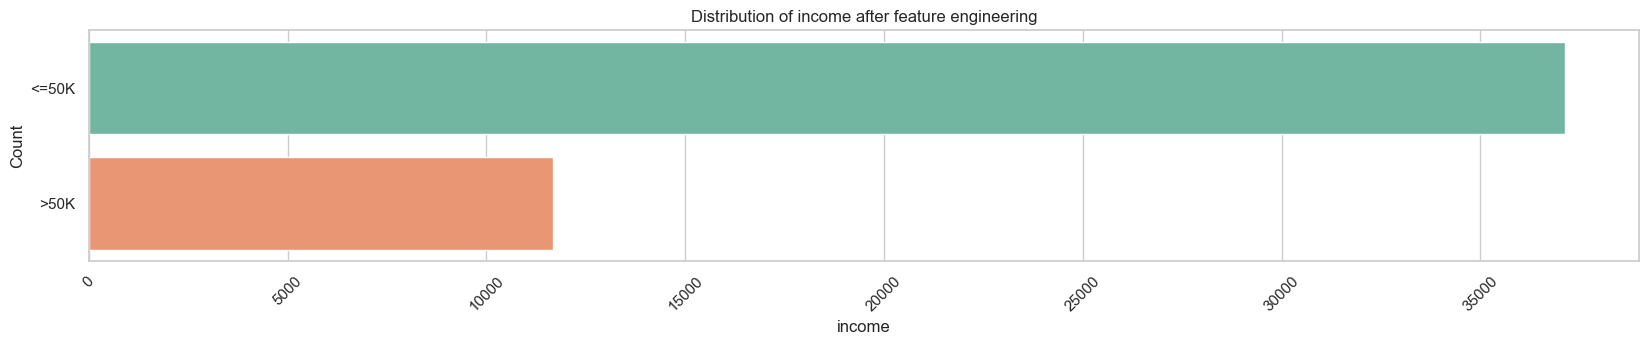

        value_counts  ratio_to_highest_value_count  percentage
income                                                        
<=50K          37128                      1.000000   76.063263
>50K           11684                      0.314695   23.936737


In [35]:
selected_column=df['income']
plt.figure(figsize=(20, 3))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of income after feature engineering')
plt.xlabel('income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

# The Dataset is highly imbalanced. Might need to imbalance learning

### 2.1.2. Exploitary data analysis and Feature engineering on "education" column

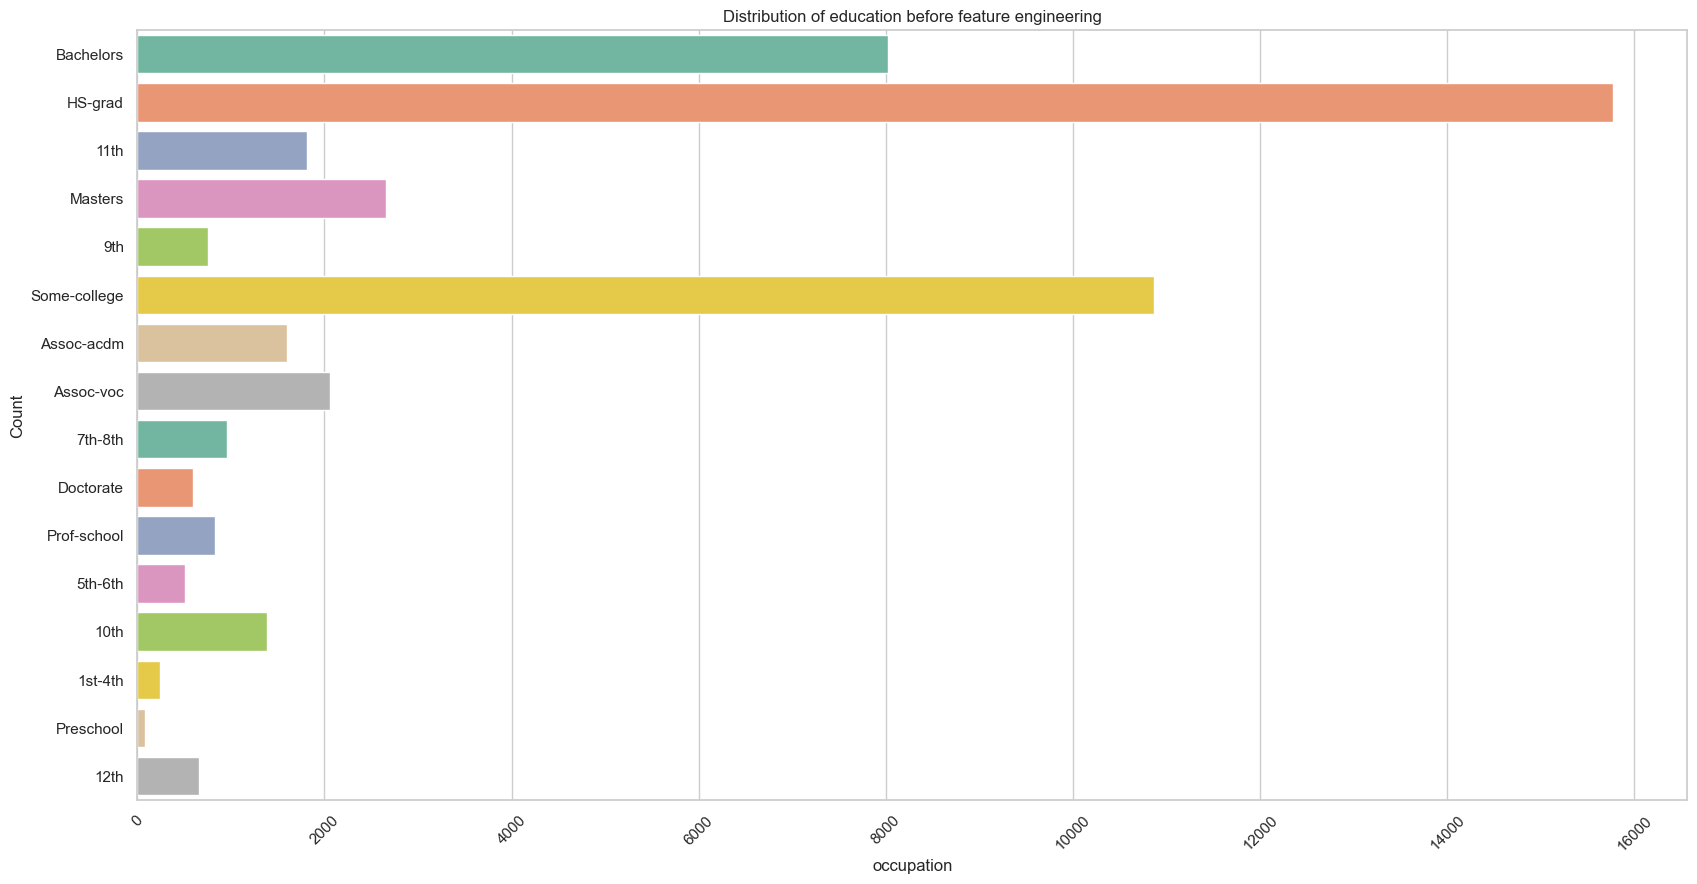

              value_counts  ratio_to_highest_value_count  percentage
education                                                           
HS-grad              15776                      1.000000   32.319921
Some-college         10869                      0.688958   22.267065
Bachelors             8020                      0.508367   16.430386
Masters               2656                      0.168357    5.441285
Assoc-voc             2060                      0.130578    4.220274
11th                  1812                      0.114858    3.712202
Assoc-acdm            1601                      0.101483    3.279931
10th                  1389                      0.088045    2.845612
7th-8th                954                      0.060472    1.954437
Prof-school            834                      0.052865    1.708596
9th                    756                      0.047921    1.548799
12th                   656                      0.041582    1.343932
Doctorate              594        

In [36]:
selected_column=df['education']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of education before feature engineering')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

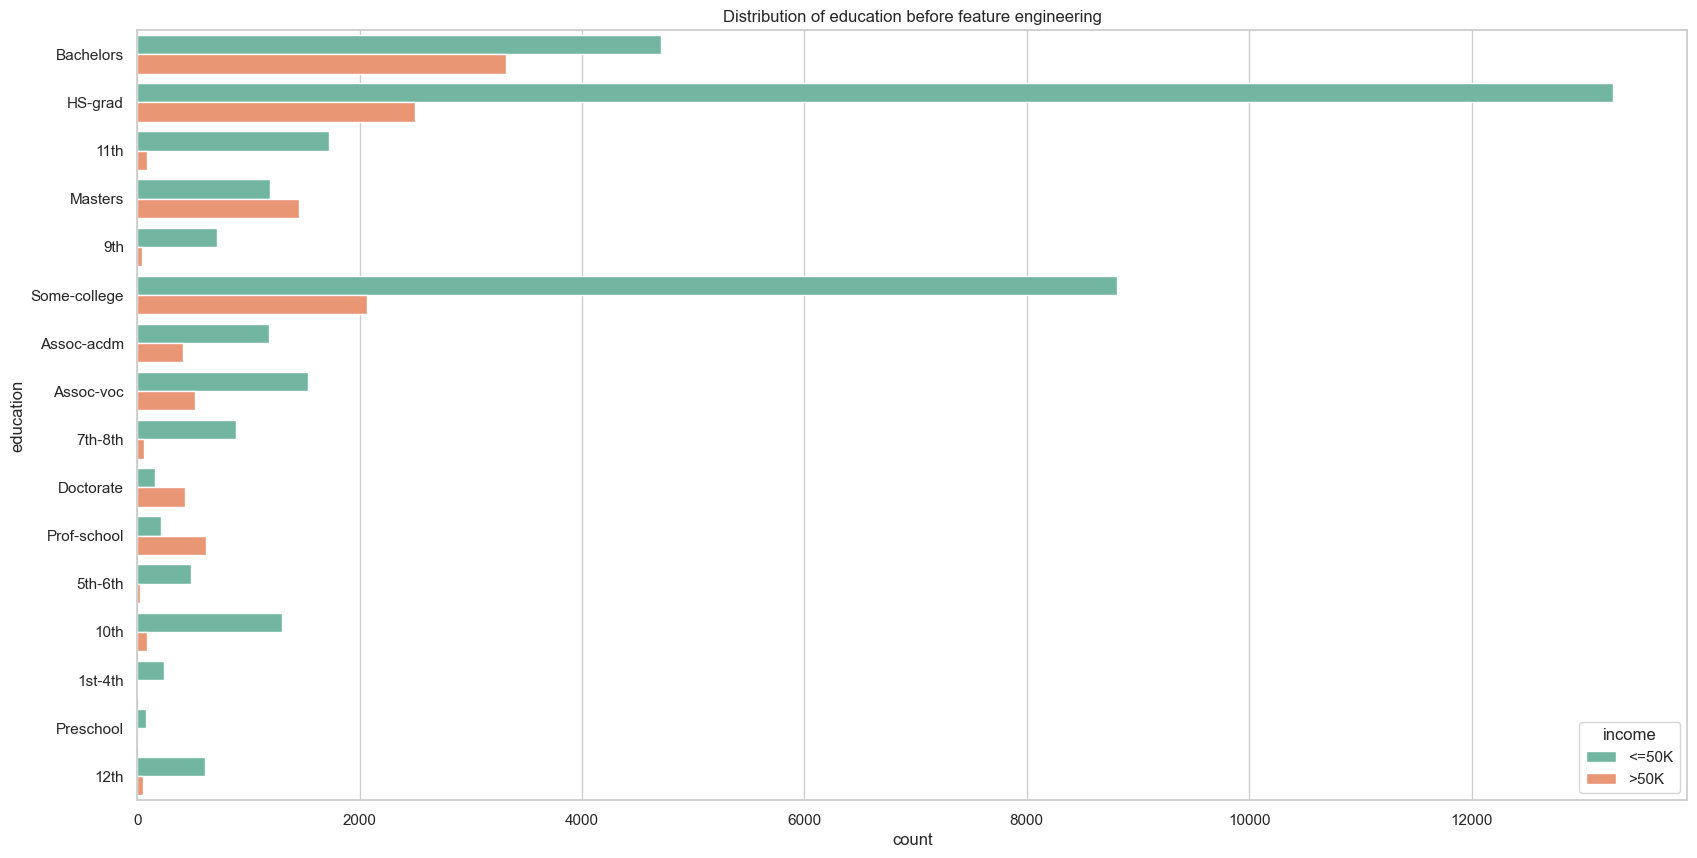

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(y='education',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of education before feature engineering')
plt.show()

The values counts of ['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th', 'Preschool'] are low. And all of their <=50K count is greater than that of >50K which means they have a similar trend in their income distribution. And also these education levels represent school-level education. So they will be group as 'School-or-below'. This simplification not only reduces the dimensionality of the education attribute but also helps to improve the model's generalization performance by reducing the noise associated with the low-value count categories. Similarly ['Assoc-voc', 'Assoc-acdm', 'Some-college', 'Prof-school'] will be also grouped into a new category called “College”.

In [38]:
school_or_below = ['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th', 'Preschool']
college = ['Assoc-voc', 'Assoc-acdm', 'Some-college', 'Prof-school']

def process_education(education):
    if education in school_or_below:
        return 'School-or-below'
    elif education in college:
        return 'College'
    else:
        return education

In [39]:
df['education']=df['education'].apply(process_education)


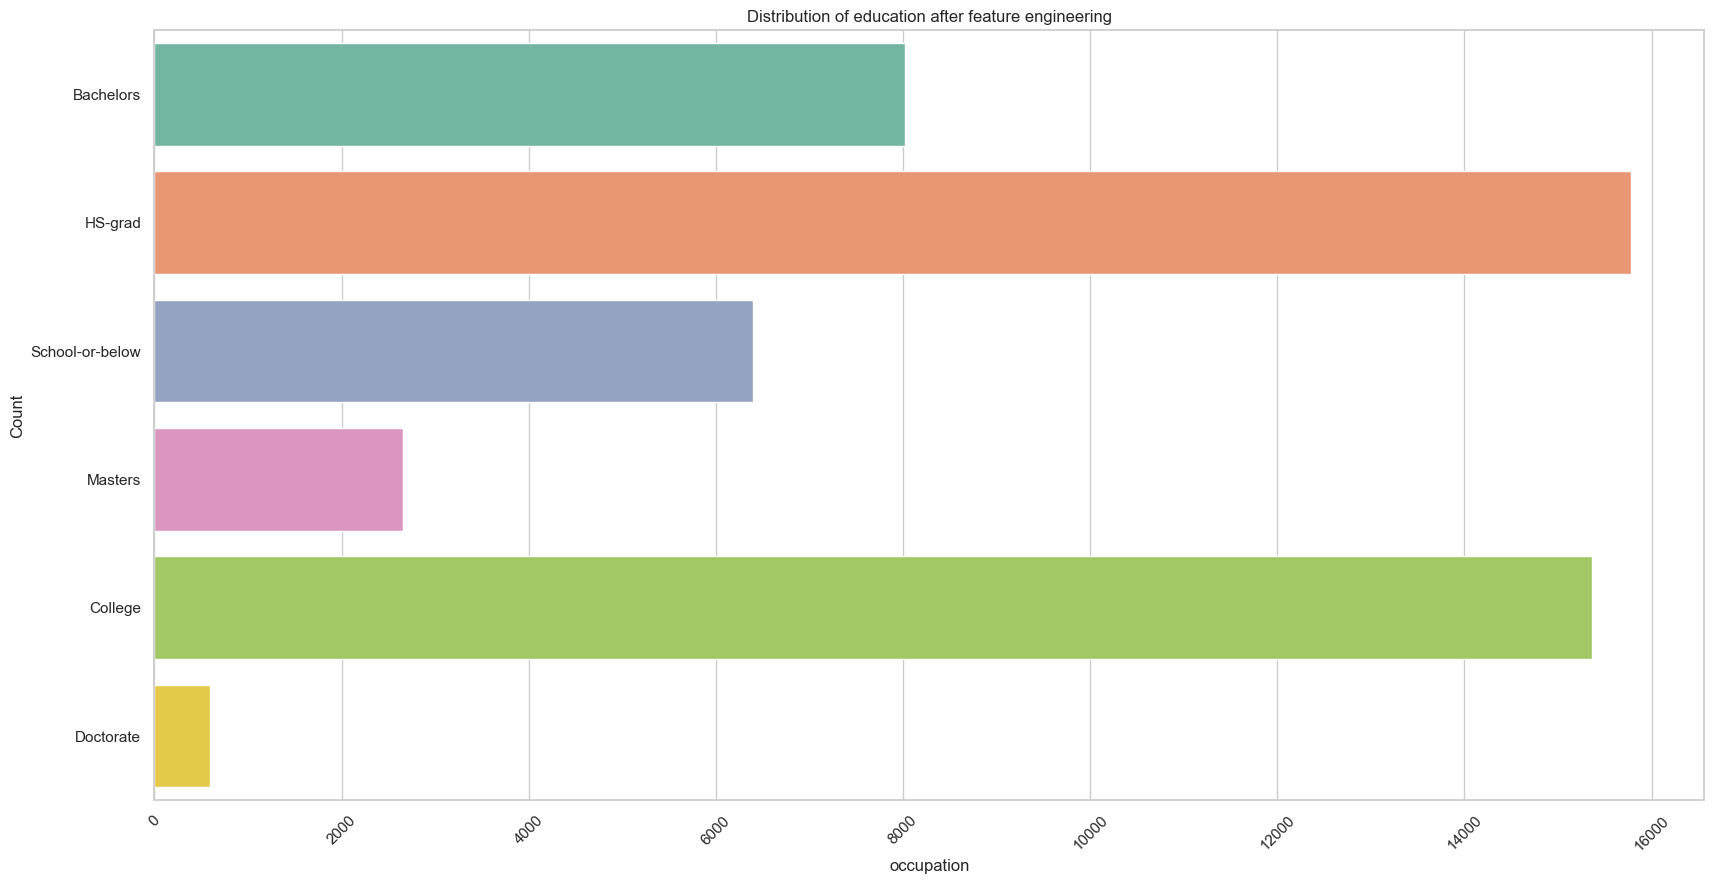

In [40]:
selected_column=df['education']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of education after feature engineering')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

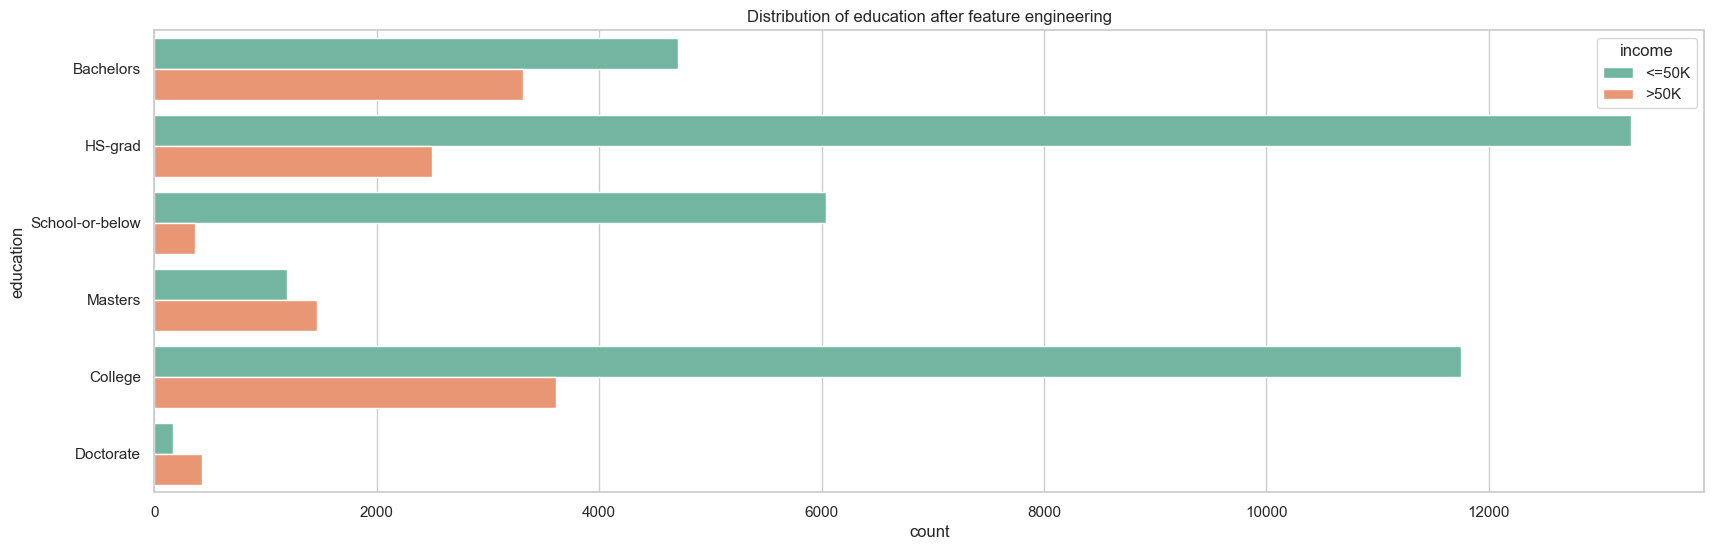

In [41]:
plt.figure(figsize=(20,6))
sns.countplot(y='education',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of education after feature engineering')
plt.show()

### 2.1.3. Exploitary data analysis and Feature engineering on "workclass" column

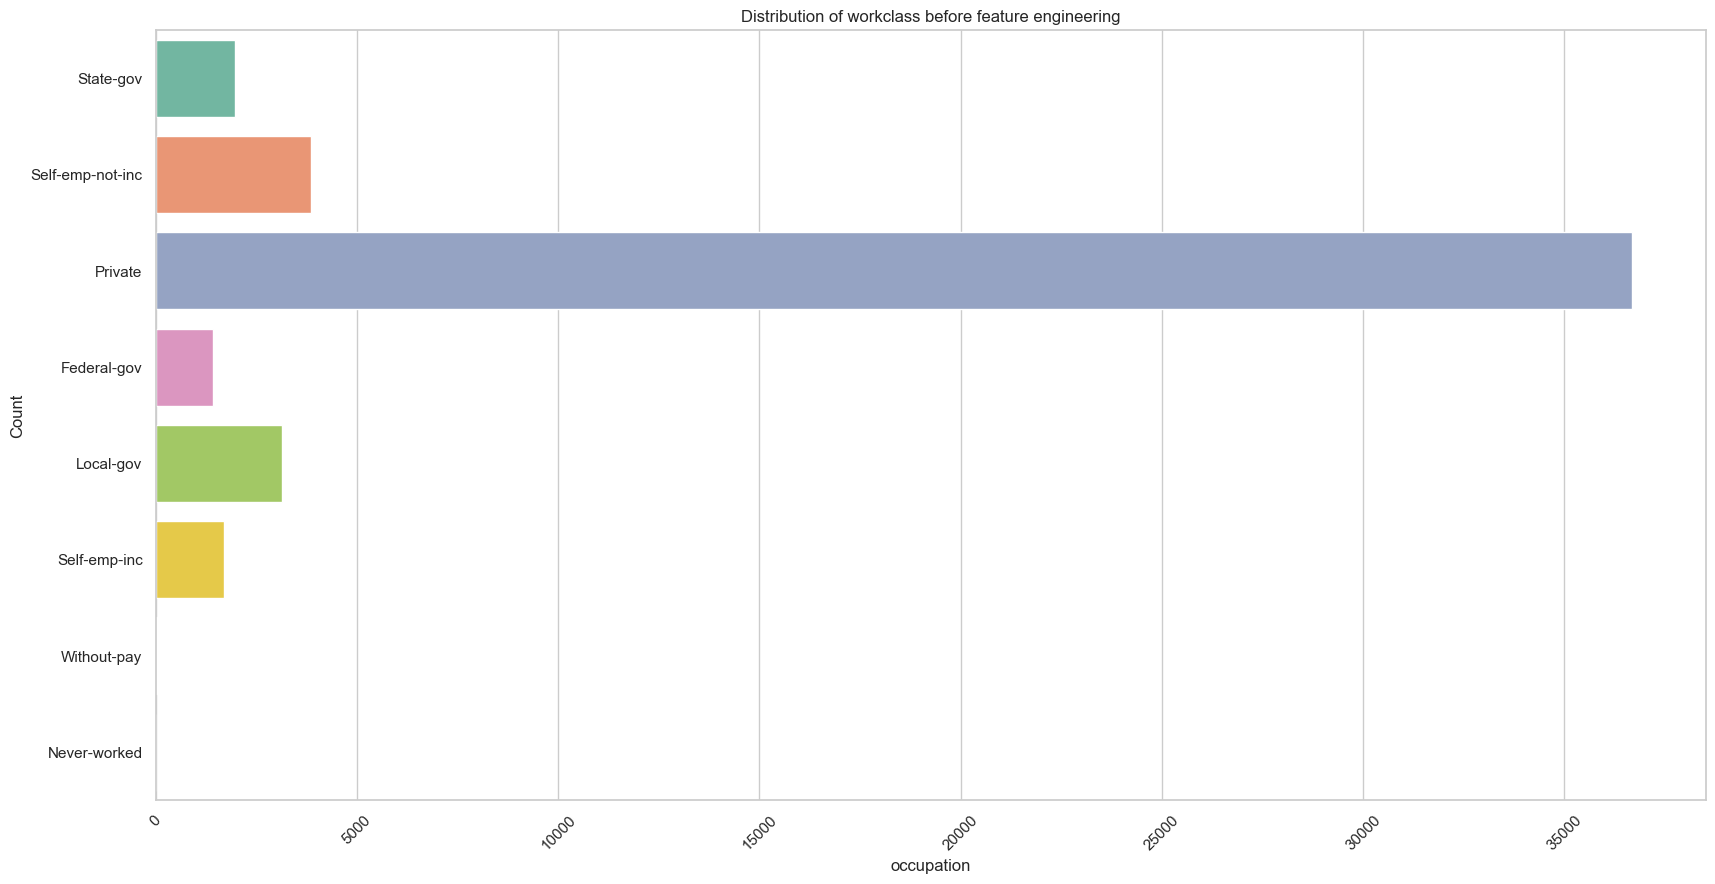

                  value_counts  ratio_to_highest_value_count  percentage
workclass                                                               
Private                  36677                      1.000000   75.139310
Self-emp-not-inc          3861                      0.105270    7.909940
Local-gov                 3136                      0.085503    6.424650
State-gov                 1981                      0.054012    4.058428
Self-emp-inc              1694                      0.046187    3.470458
Federal-gov               1432                      0.039044    2.933705
Without-pay                 21                      0.000573    0.043022
Never-worked                10                      0.000273    0.020487


In [42]:
selected_column=df['workclass']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of workclass before feature engineering')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

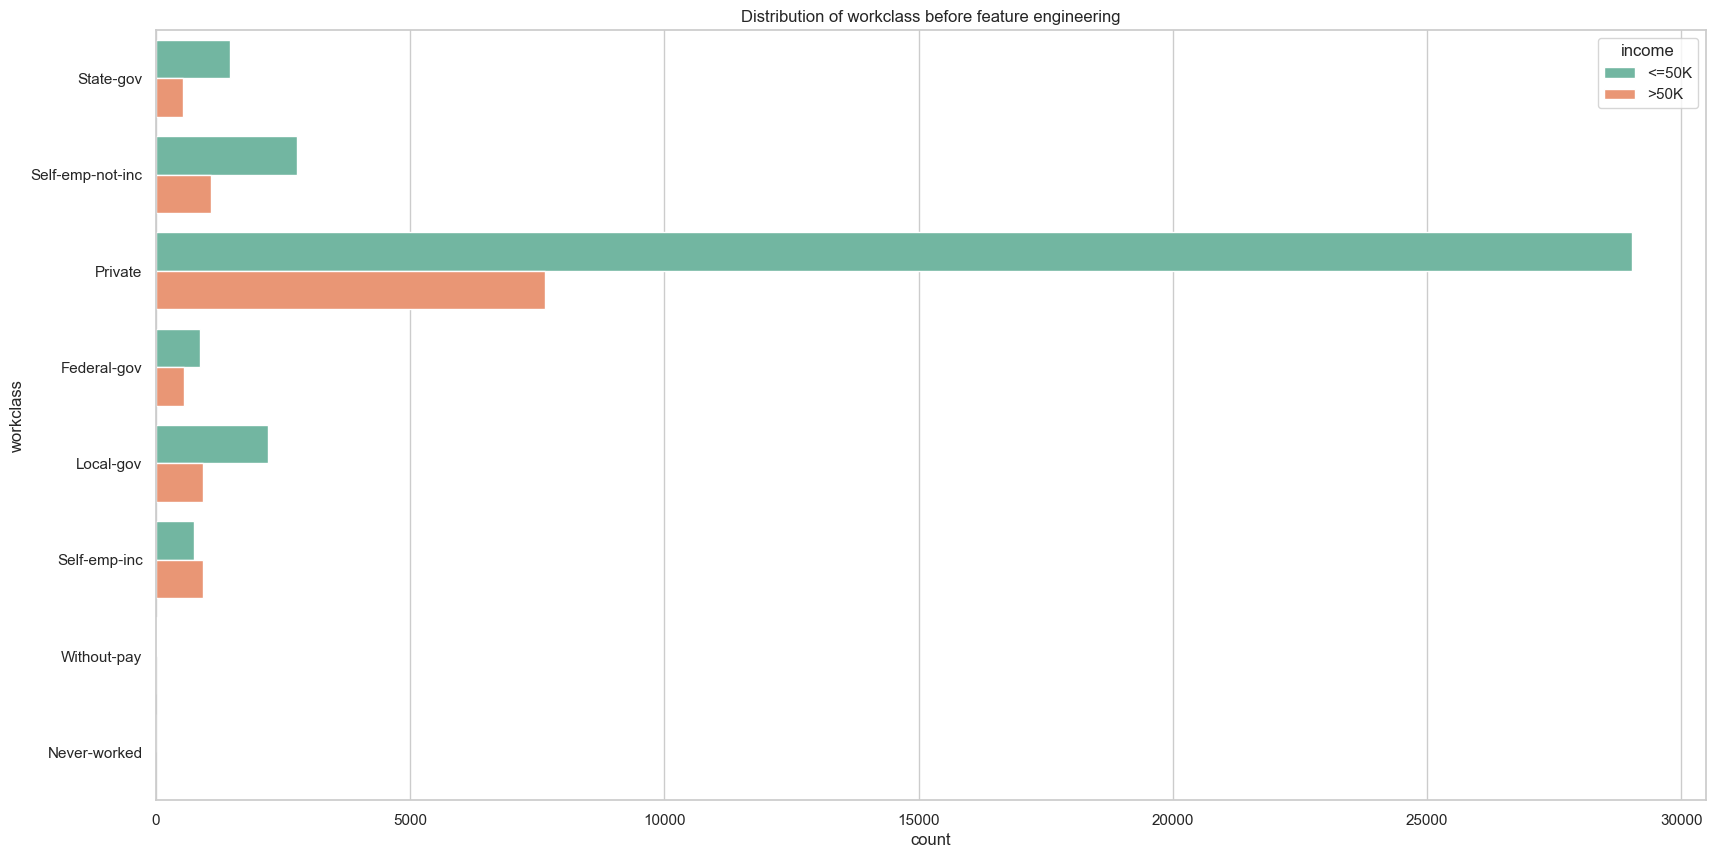

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(y='workclass',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of workclass before feature engineering')
plt.show()

In [44]:
value_counts_(df[df['income']=='<=50K']['workclass'])

                  value_counts  ratio_to_highest_value_count  percentage
workclass                                                               
Private                  29028                      1.000000   59.468983
Self-emp-not-inc          2784                      0.095907    5.703516
Local-gov                 2209                      0.076099    4.525527
State-gov                 1451                      0.049986    2.972630
Federal-gov                871                      0.030006    1.784397
Self-emp-inc               756                      0.026044    1.548799
Without-pay                 19                      0.000655    0.038925
Never-worked                10                      0.000344    0.020487


In [45]:
value_counts_(df[df['income']=='>50K']['workclass'])

                  value_counts  ratio_to_highest_value_count  percentage
workclass                                                               
Private                   7649                      1.000000   15.670327
Self-emp-not-inc          1077                      0.140803    2.206425
Self-emp-inc               938                      0.122630    1.921659
Local-gov                  927                      0.121192    1.899123
Federal-gov                561                      0.073343    1.149308
State-gov                  530                      0.069290    1.085799
Without-pay                  2                      0.000261    0.004097


In [46]:
df[df['workclass']=='Never-worked']['hours-per-week']

5361     40
10845    35
14772    30
20337    10
23232    40
32304    40
32314     4
41346    20
44168    35
46459    35
Name: hours-per-week, dtype: int64

Never worked catergory cannot have hours per week. Abnormal condition. Never worked will be considered as an outlier and will be dropped.

In [47]:
df=df[~(df['workclass']=='Never-worked')]

'Without-pay' catergory will be combined with the already exsiting catergory named ‘other’. The values counts of ['Local-gov', 'State-gov', 'Federal-gov'] are low. And they have a similar trend in their income distribution. And also these work classes represents government jobs. So they will be group as 'Government'. This simplification reduces the dimensionality of the education attribute.

In [48]:
government=['Local-gov', 'State-gov', 'Federal-gov']


def process_workclass(value):
    if value in government:
        return 'Government'
    elif value=='Without-pay':
        return 'Other'
    else:
        return value


In [49]:
df['workclass']=df['workclass'].apply(process_workclass)

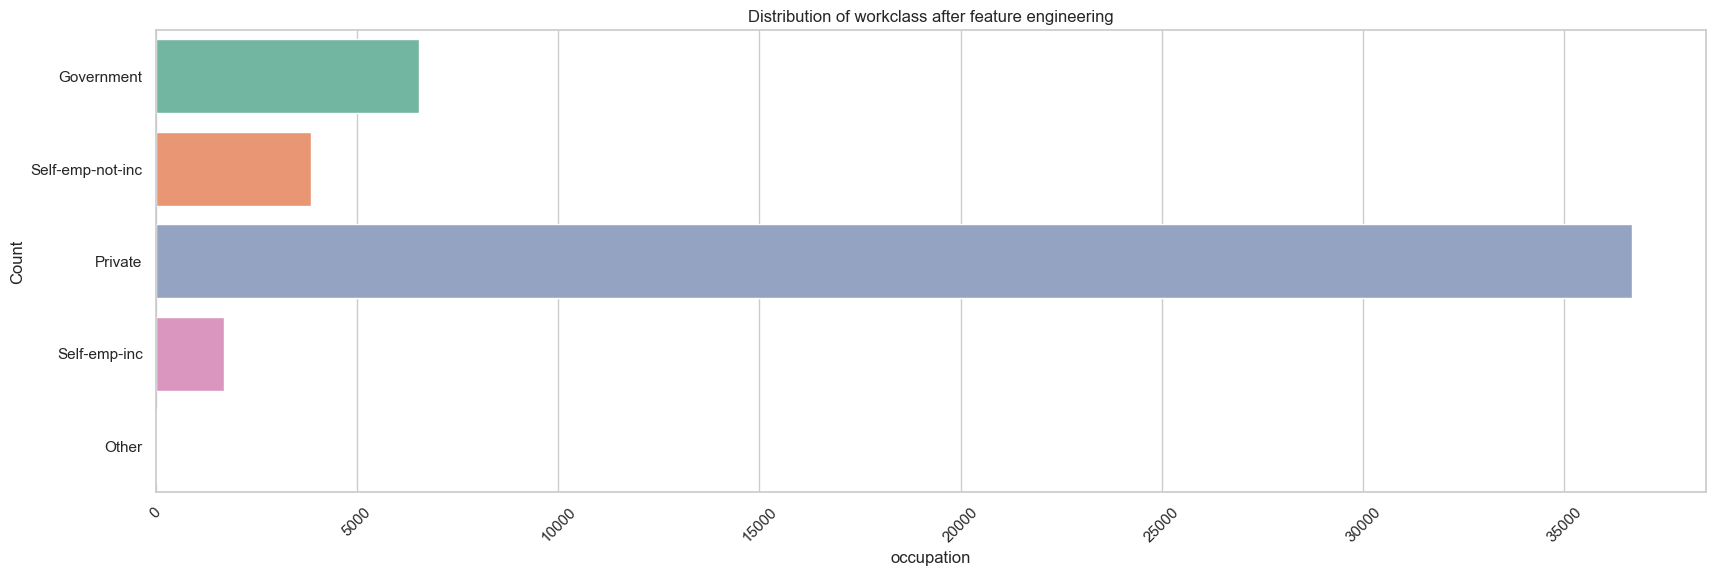

                  value_counts  ratio_to_highest_value_count  percentage
workclass                                                               
Private                  36677                      1.000000   75.154707
Government                6549                      0.178559   13.419532
Self-emp-not-inc          3861                      0.105270    7.911561
Self-emp-inc              1694                      0.046187    3.471169
Other                       21                      0.000573    0.043031


In [50]:
selected_column=df['workclass']
plt.figure(figsize=(20, 6))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of workclass after feature engineering')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

### 2.1.4. Exploitary data analysis and Feature engineering on "occupation" column

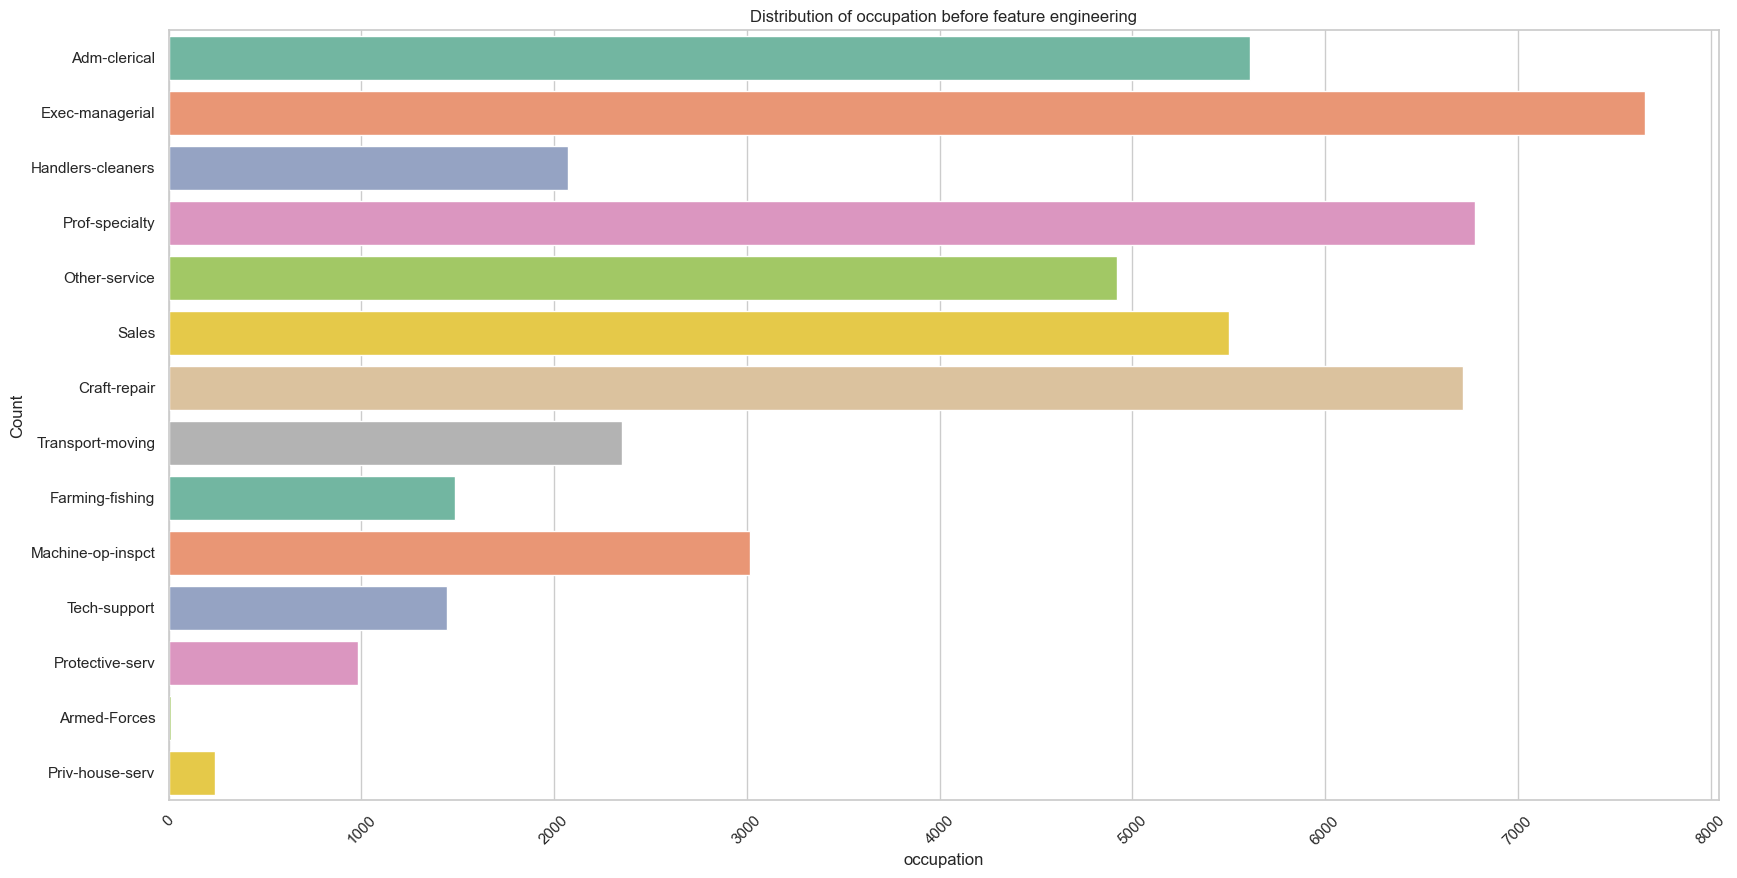

                   value_counts  ratio_to_highest_value_count  percentage
occupation                                                               
Exec-managerial            7658                      1.000000   15.691980
Prof-specialty             6780                      0.885349   13.892873
Craft-repair               6718                      0.877253   13.765829
Adm-clerical               5608                      0.732306   11.491332
Sales                      5504                      0.718726   11.278226
Other-service              4919                      0.642335   10.079505
Machine-op-inspct          3019                      0.394228    6.186222
Transport-moving           2355                      0.307522    4.825622
Handlers-cleaners          2071                      0.270436    4.243679
Farming-fishing            1487                      0.194176    3.047006
Tech-support               1445                      0.188692    2.960944
Protective-serv             983       

In [51]:
selected_column=df['occupation']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of occupation before feature engineering')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

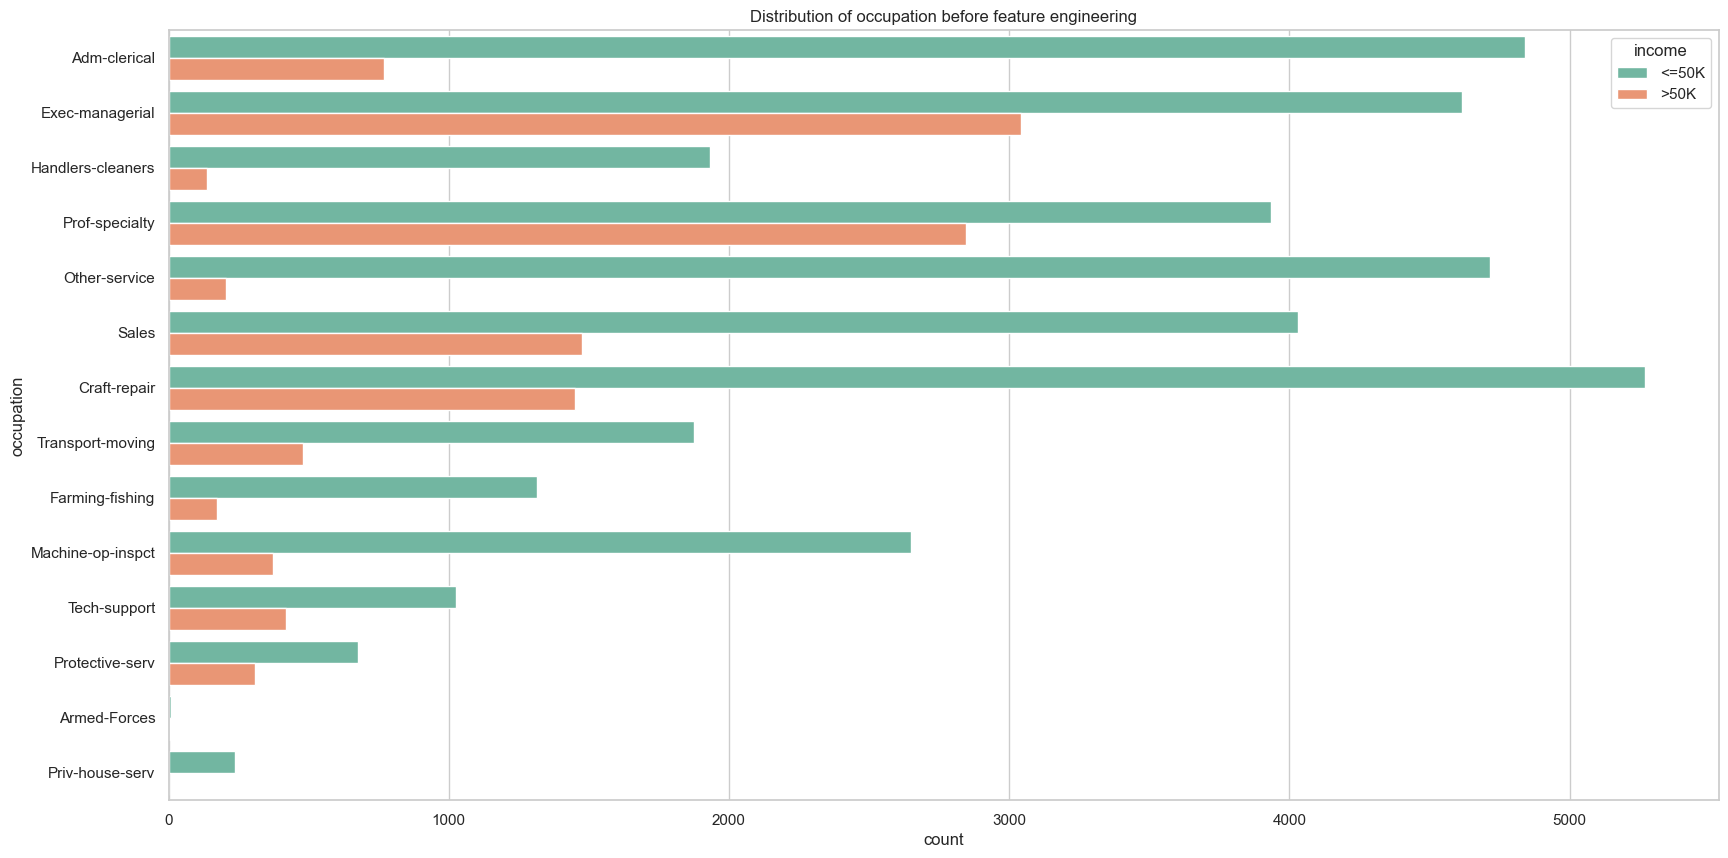

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(y='occupation',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of occupation before feature engineering')
plt.show()

### 2.1.5. Exploitary data analysis and Feature engineering on "sex" column

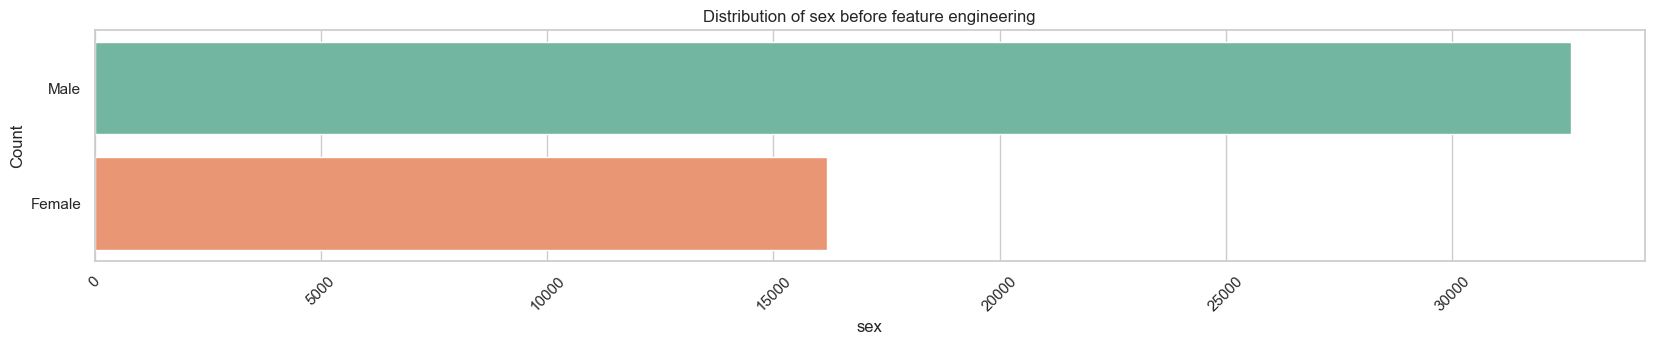

        value_counts  ratio_to_highest_value_count  percentage
sex                                                           
Male           32624                      1.000000   66.849719
Female         16178                      0.495893   33.150281


In [53]:
selected_column=df['sex']
plt.figure(figsize=(20, 3))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of sex before feature engineering')
plt.xlabel('sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

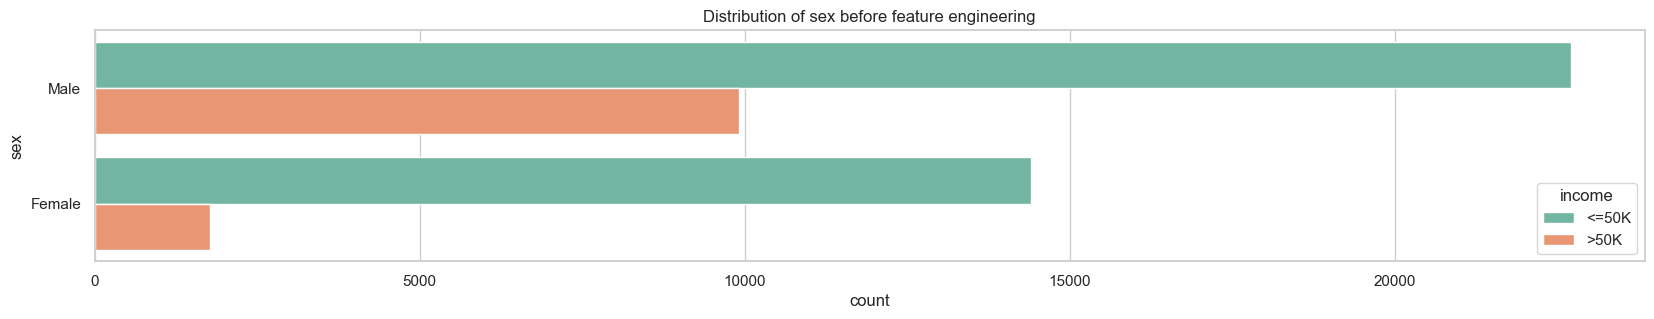

In [54]:
plt.figure(figsize=(20,3))
sns.countplot(y='sex',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of sex before feature engineering')
plt.show()

### 2.1.6. Exploitary data analysis and Feature engineering on "marital-status" column

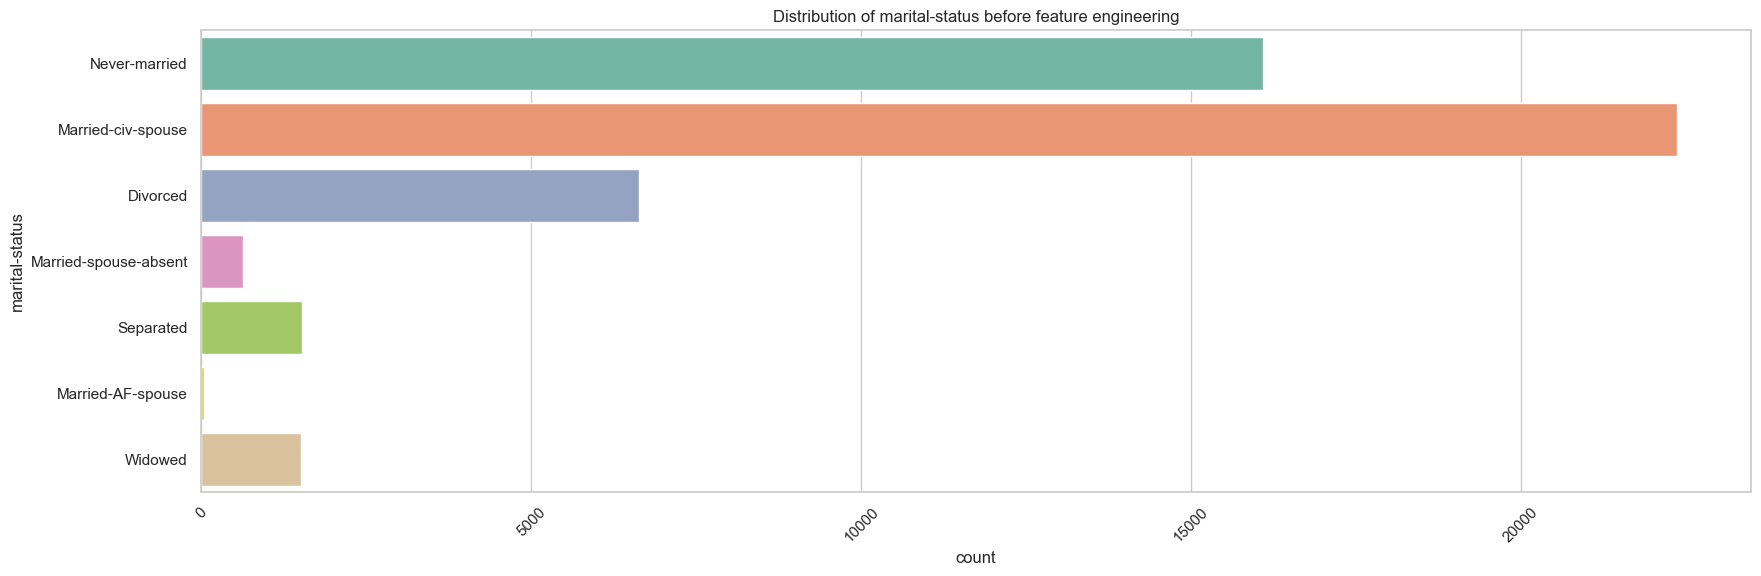

                       value_counts  ratio_to_highest_value_count  percentage
marital-status                                                               
Married-civ-spouse            22370                      1.000000   45.838285
Never-married                 16091                      0.719312   32.972009
Divorced                       6629                      0.296334   13.583460
Separated                      1530                      0.068395    3.135117
Widowed                        1518                      0.067859    3.110528
Married-spouse-absent           627                      0.028029    1.284783
Married-AF-spouse                37                      0.001654    0.075817


In [55]:
selected_column=df['marital-status']
plt.figure(figsize=(20, 6))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of marital-status before feature engineering')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

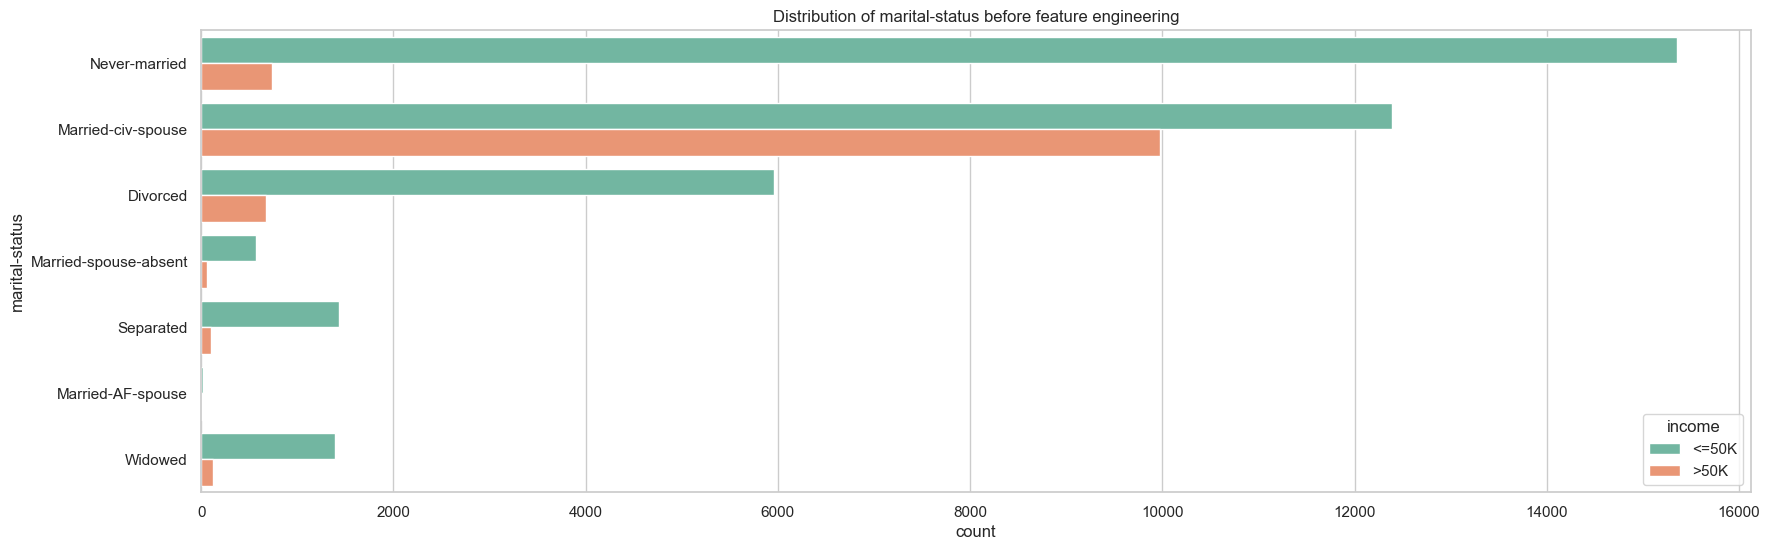

In [56]:
plt.figure(figsize=(20,6))
sns.countplot(y='marital-status',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of marital-status before feature engineering')
plt.show()

Married-AF-spouse values count is too low compared to other categories. So it will be combined with Married-civ-spouse and a new category named “Married” will be created. This category will individuals who are still spending a married life. The values counts of ['Married-spouse-absent', 'Widowed' and 'Separated'] are low compared to the other categories. So they will be grouped as a new category called “Other-Status”. This group represents individuals who are still legally married but have a complex married life

In [57]:
married = ['Married-civ-spouse', 'Married-AF-spouse']
other_status = ['Married-spouse-absent', 'Widowed', 'Separated']

def process_marital_status(value):
    if value in married:
        return 'Married'
    elif value in other_status:
        return 'Other-status'
    else:
        return value

In [58]:
df['marital-status']=df['marital-status'].apply(process_marital_status)

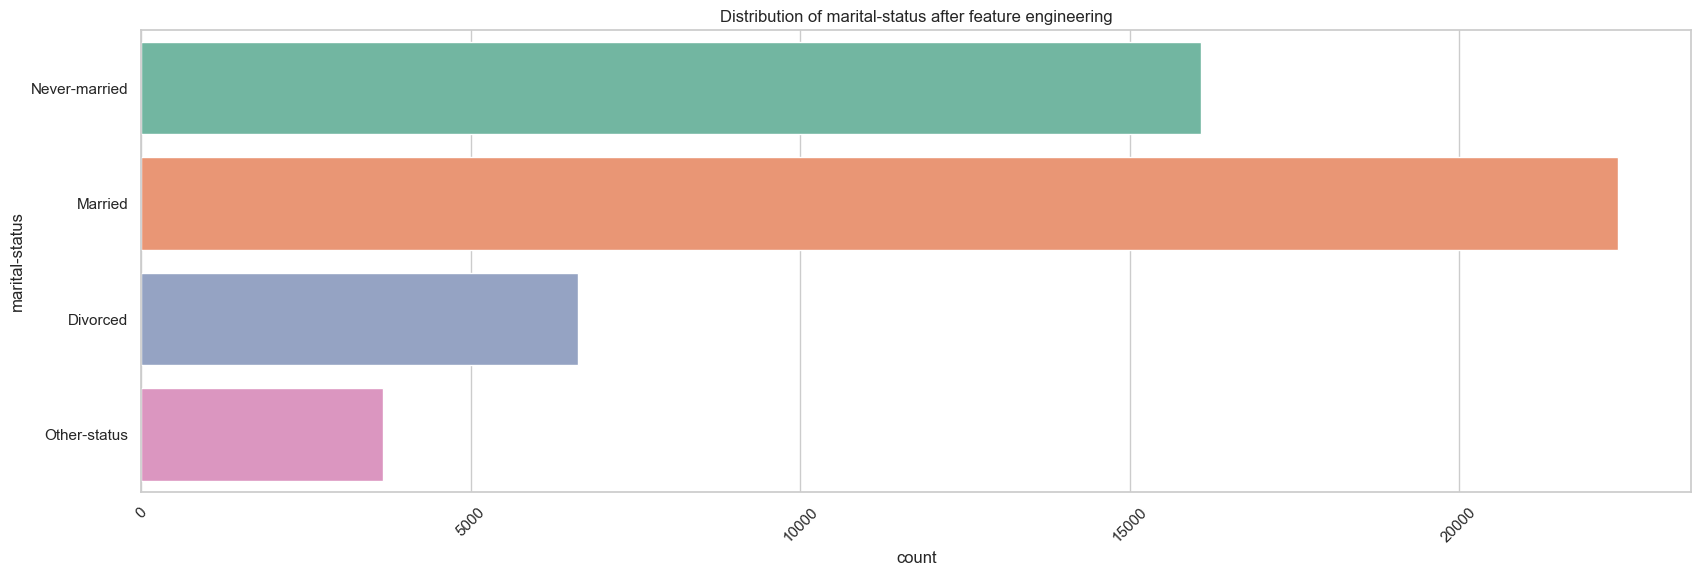

                value_counts  ratio_to_highest_value_count  percentage
marital-status                                                        
Married                22407                      1.000000   45.914102
Never-married          16091                      0.718124   32.972009
Divorced                6629                      0.295845   13.583460
Other-status            3675                      0.164011    7.530429


In [59]:
selected_column=df['marital-status']
plt.figure(figsize=(20, 6))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of marital-status after feature engineering')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

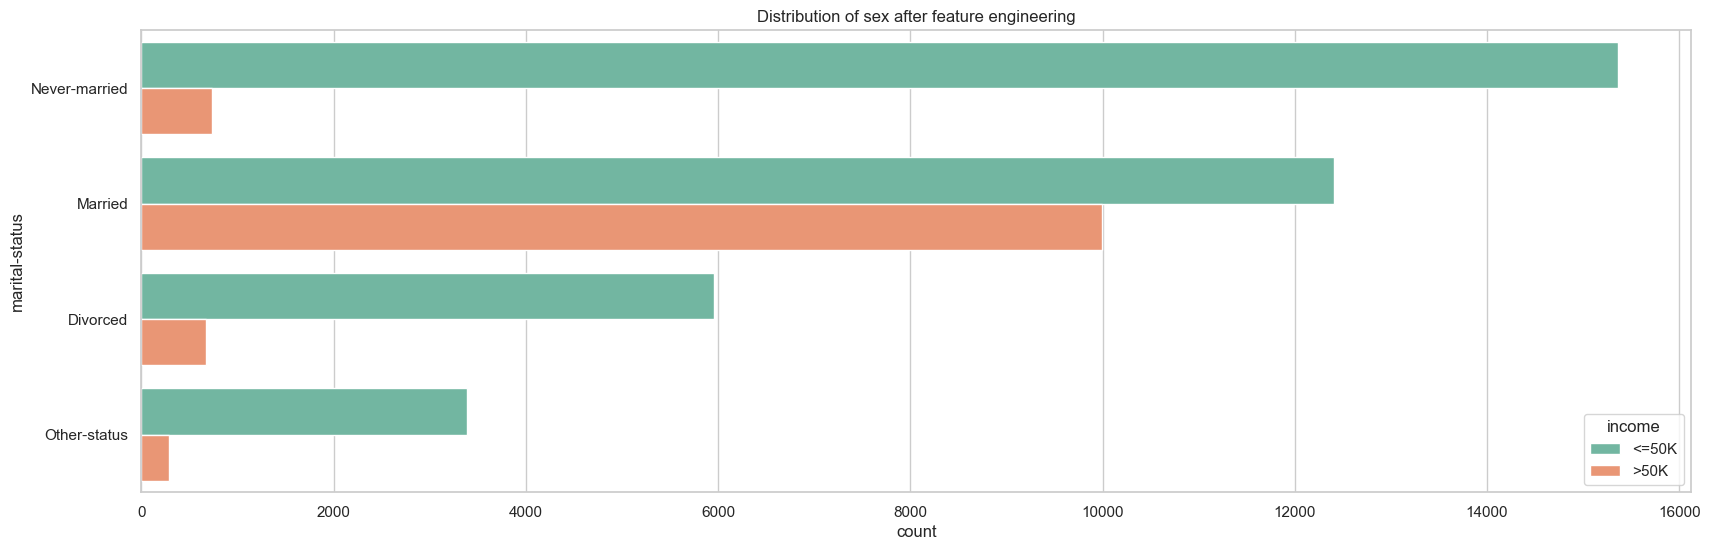

In [60]:
plt.figure(figsize=(20,6))
sns.countplot(y='marital-status',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of sex after feature engineering')
plt.show()

### 2.1.7. Exploitary data analysis and Feature engineering on "native-country" column

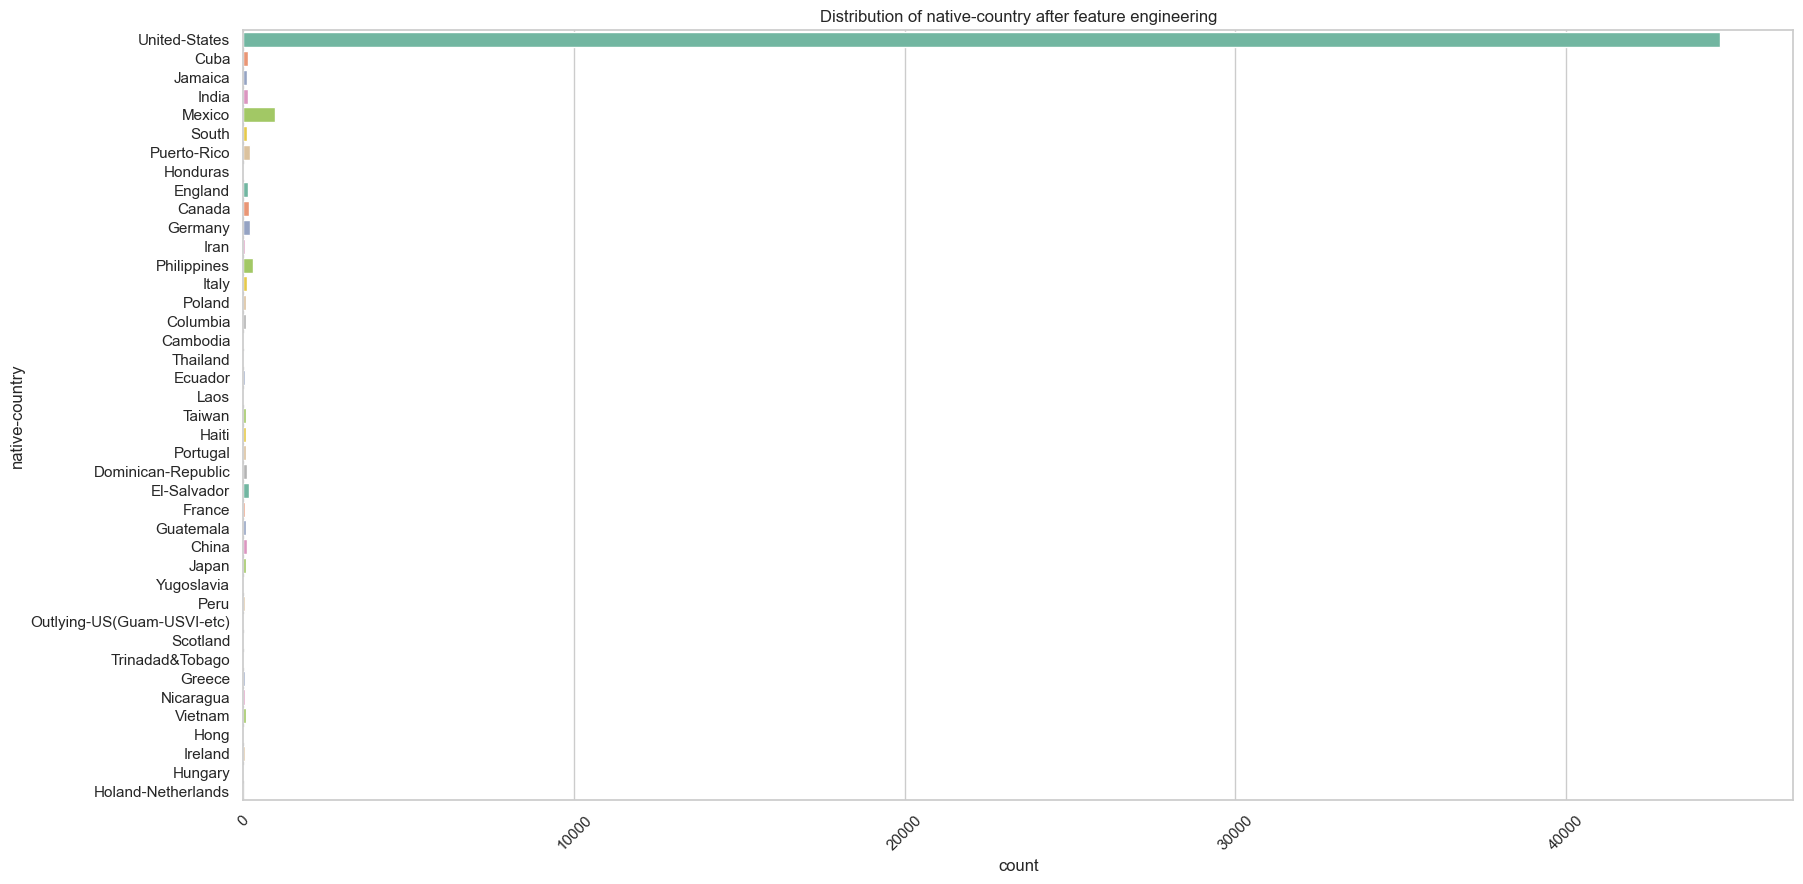

                            value_counts  ratio_to_highest_value_count  \
native-country                                                           
United-States                      44655                      1.000000   
Mexico                               947                      0.021207   
Philippines                          295                      0.006606   
Germany                              206                      0.004613   
Puerto-Rico                          184                      0.004120   
Canada                               182                      0.004076   
El-Salvador                          155                      0.003471   
India                                151                      0.003381   
Cuba                                 138                      0.003090   
England                              127                      0.002844   
China                                122                      0.002732   
South                                1

In [61]:
selected_column=df['native-country']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of native-country after feature engineering')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

USA will be filtered out to get a better visualization of the rest of the countries.

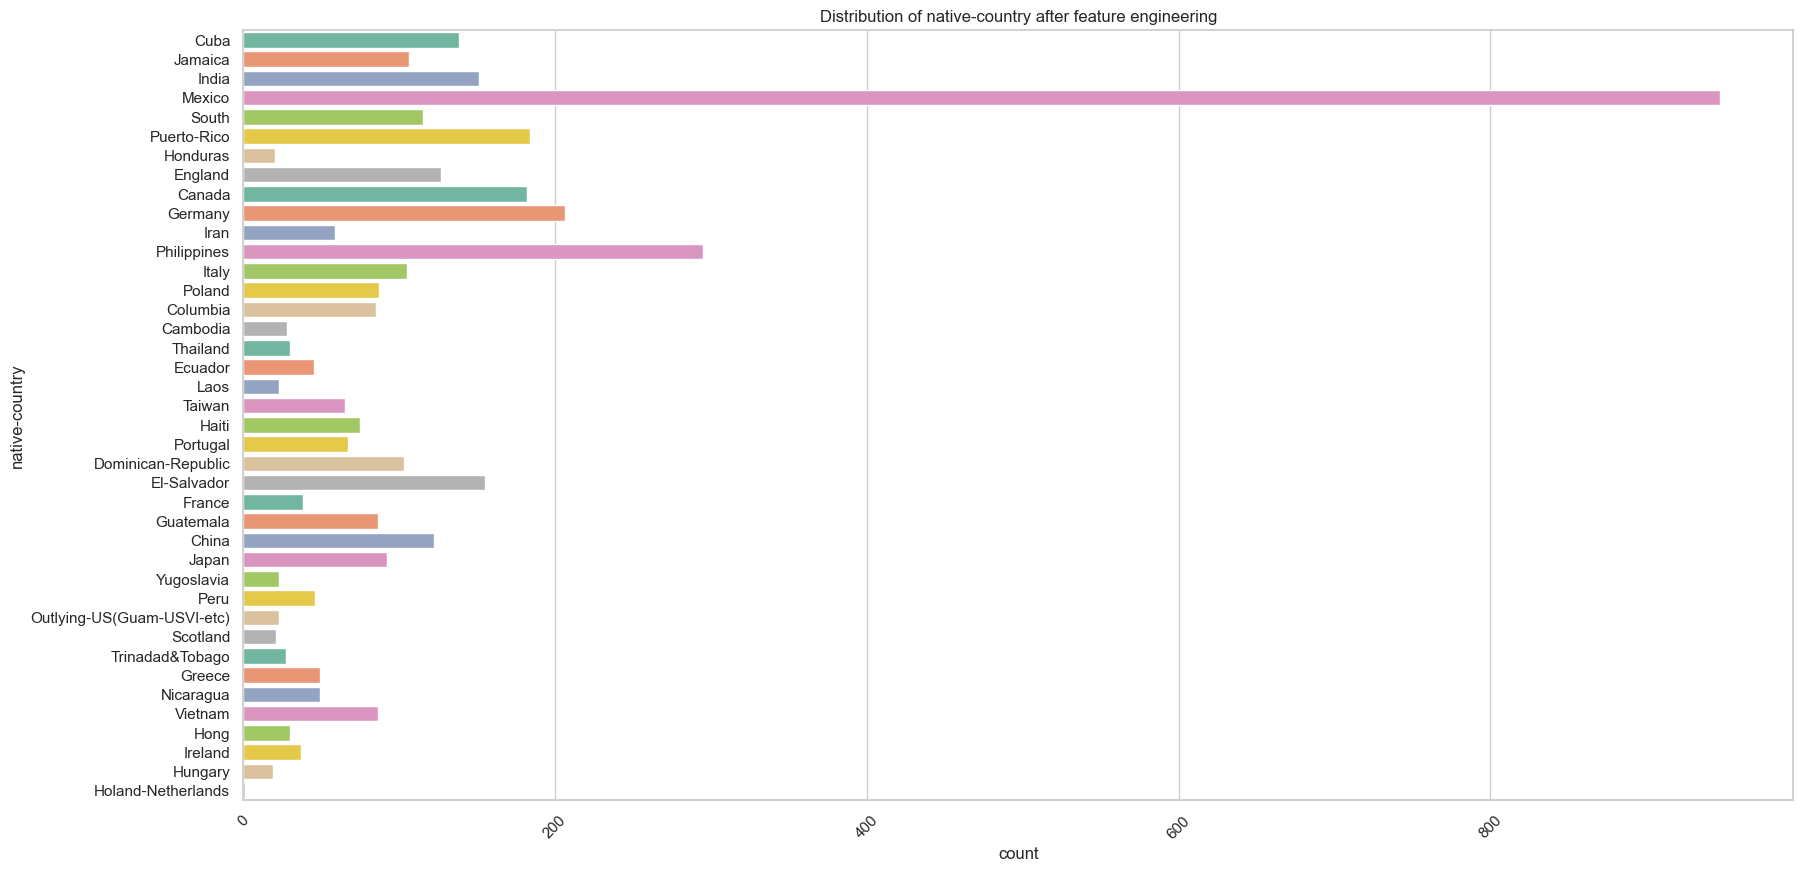

                            value_counts  ratio_to_highest_value_count  \
native-country                                                           
Mexico                               947                      1.000000   
Philippines                          295                      0.311510   
Germany                              206                      0.217529   
Puerto-Rico                          184                      0.194298   
Canada                               182                      0.192186   
El-Salvador                          155                      0.163675   
India                                151                      0.159451   
Cuba                                 138                      0.145723   
England                              127                      0.134108   
China                                122                      0.128828   
South                                115                      0.121436   
Jamaica                              1

In [62]:
selected_column=df[df['native-country']!='United-States']['native-country']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of native-country after feature engineering')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

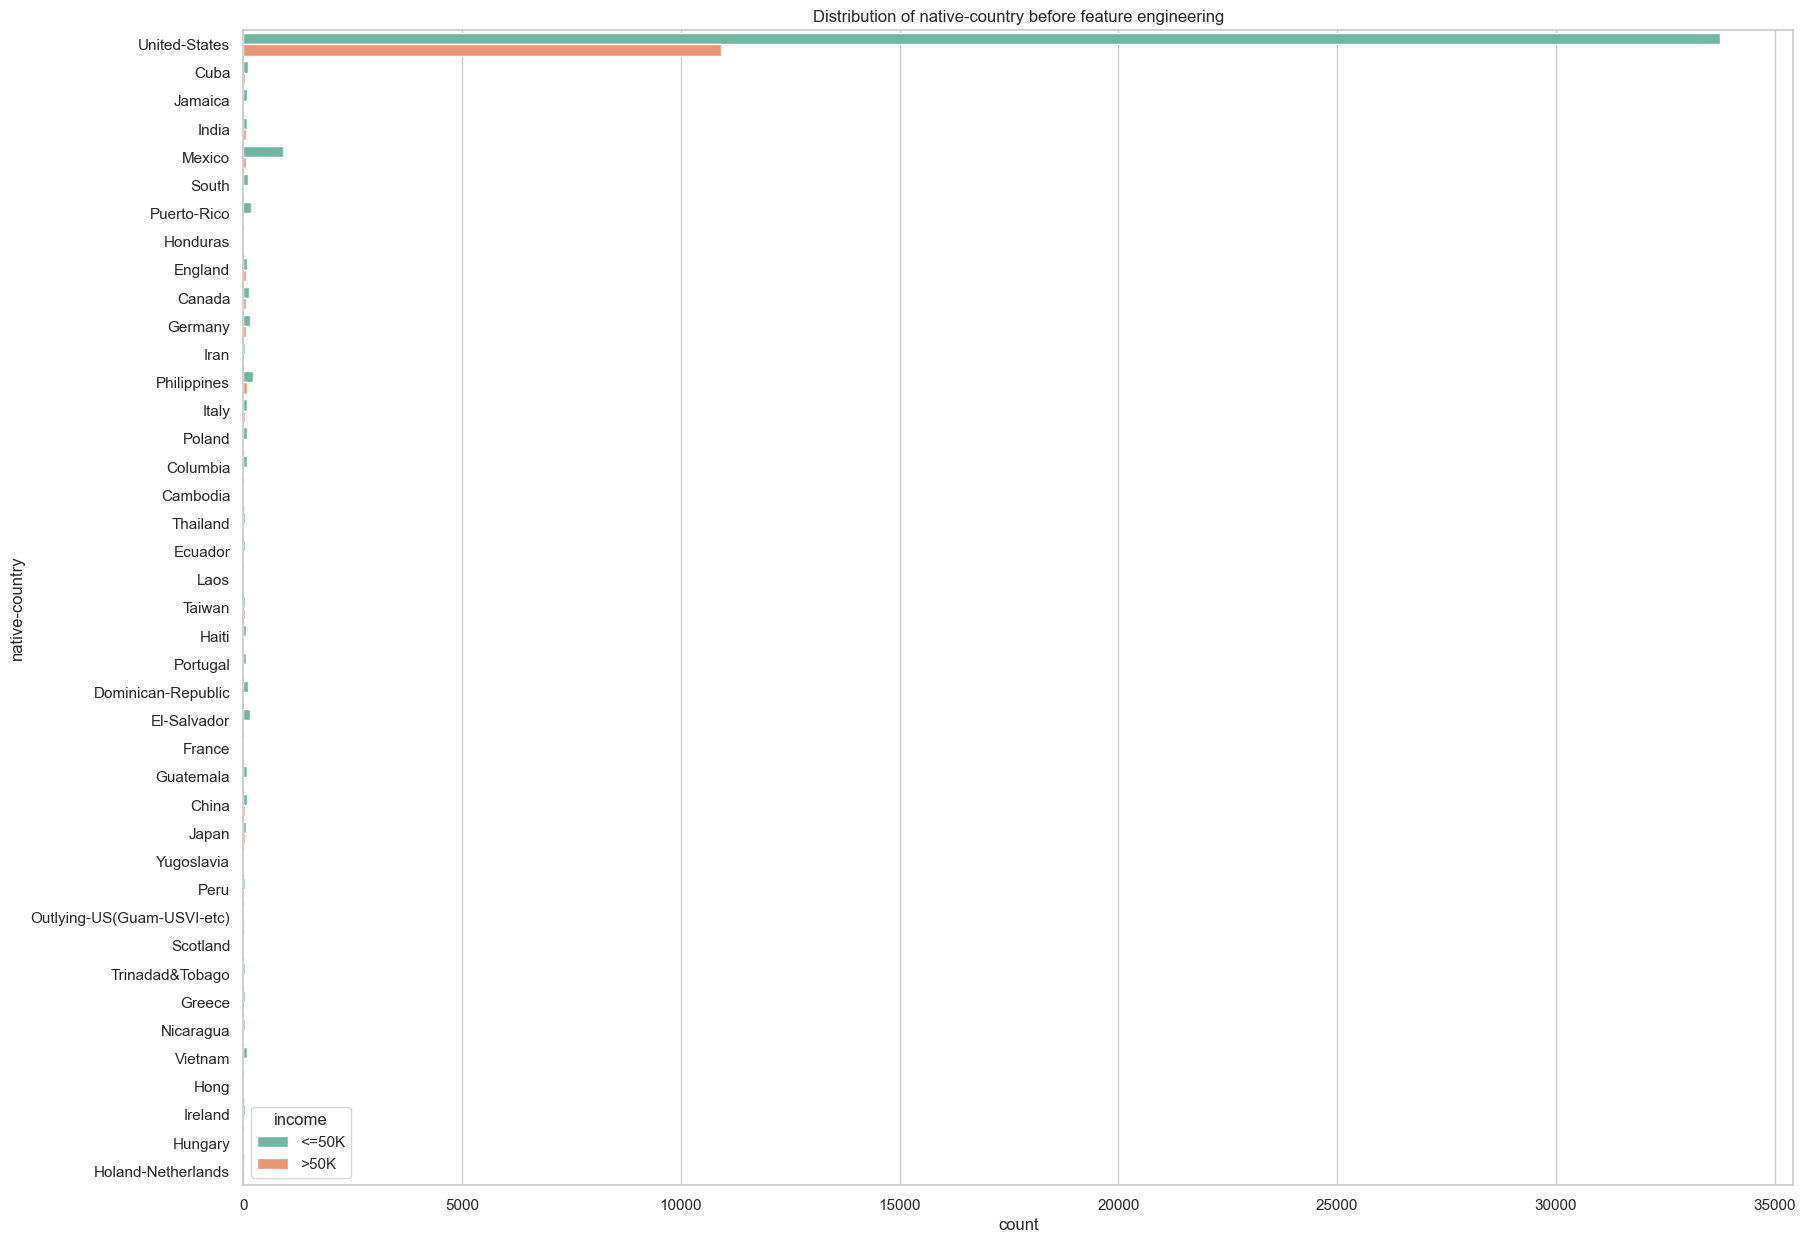

In [63]:
plt.figure(figsize=(20,15))
sns.countplot(y='native-country',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of native-country before feature engineering')
plt.show()

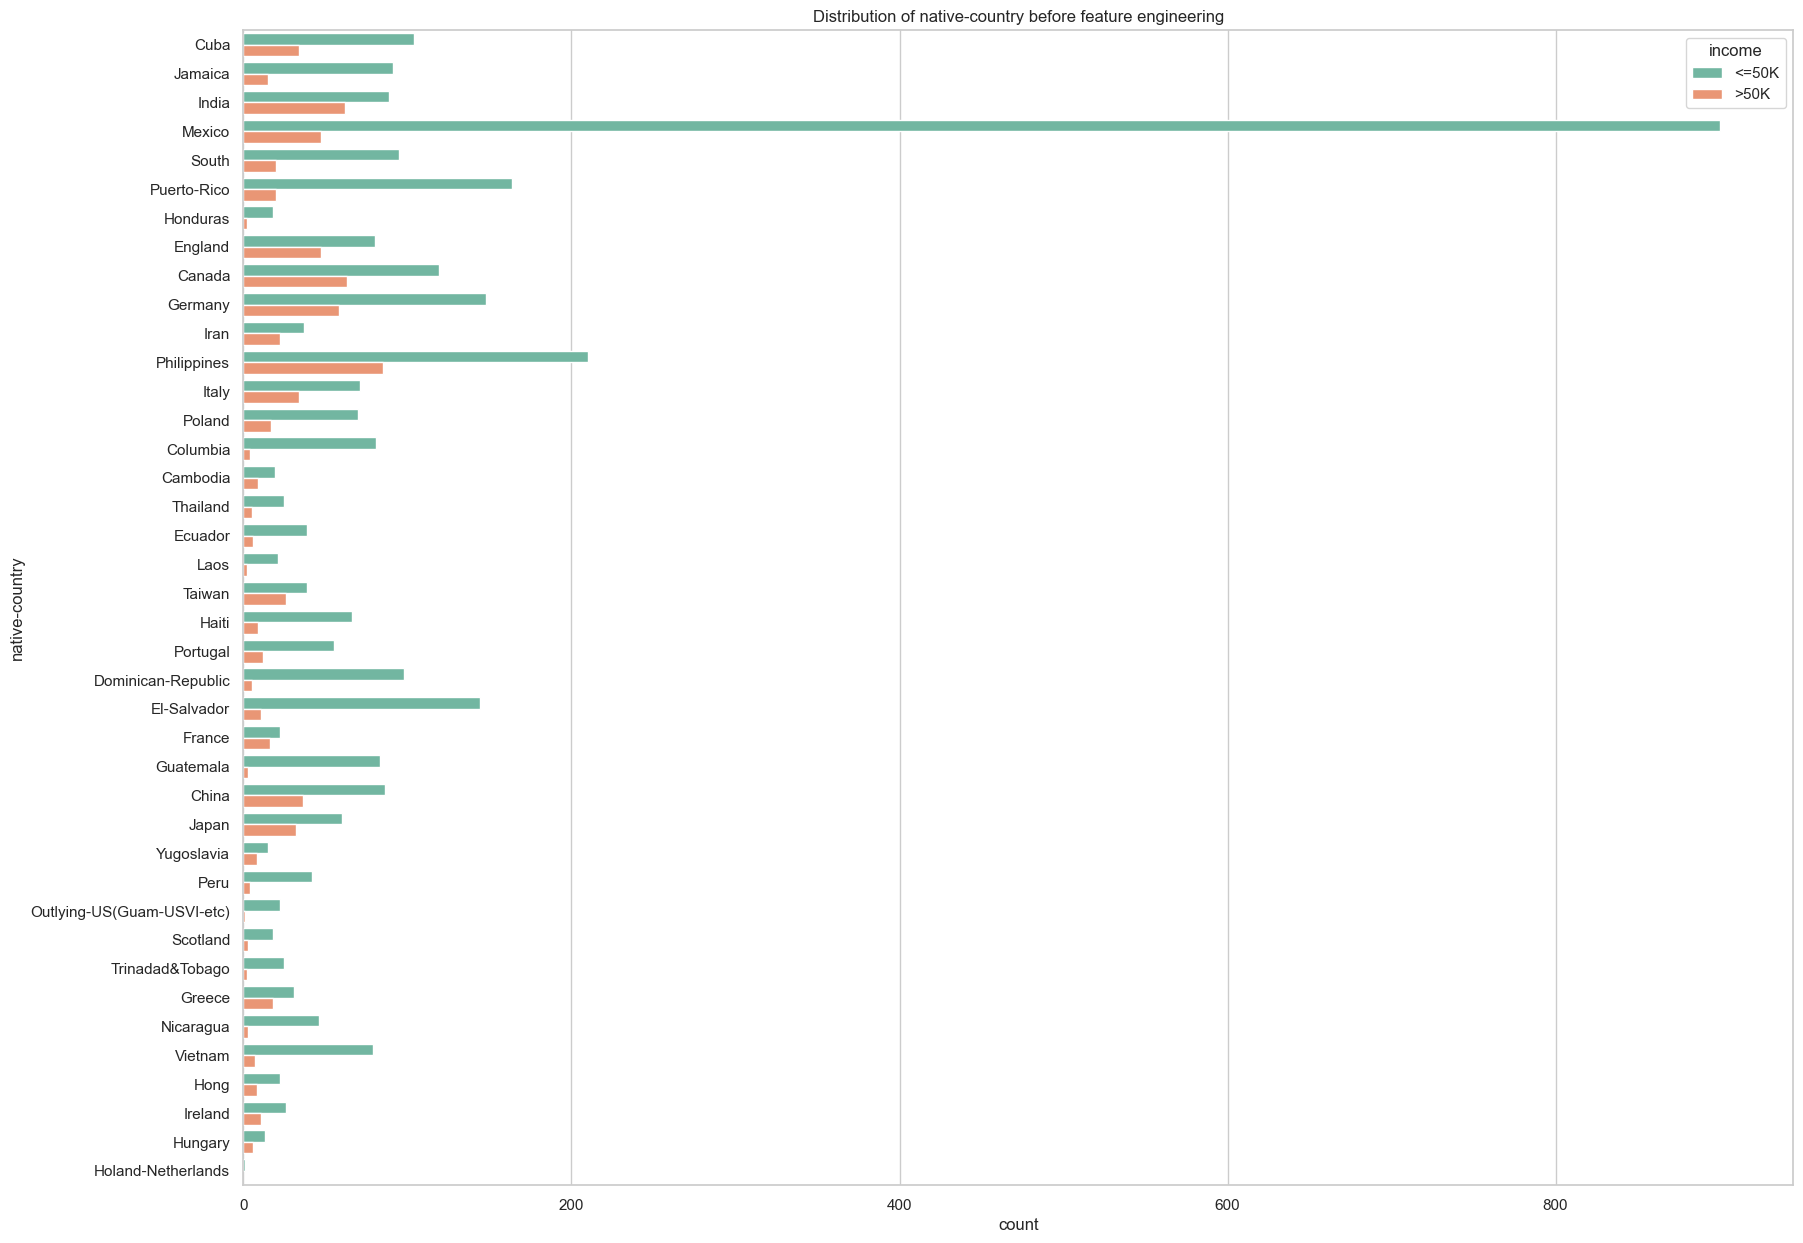

In [64]:
plt.figure(figsize=(20,15))
sns.countplot(y='native-country',hue='income',data=df[df['native-country']!='United-States'],palette='Set2')
plt.title(f'Distribution of native-country before feature engineering')
plt.show()

The value counts of other categories are too small compared to that of “United-States”. So all of them will be grouped as “Other”

In [65]:
df['native-country']=df['native-country'].apply(lambda x : x if x=='United-States' else 'Other')

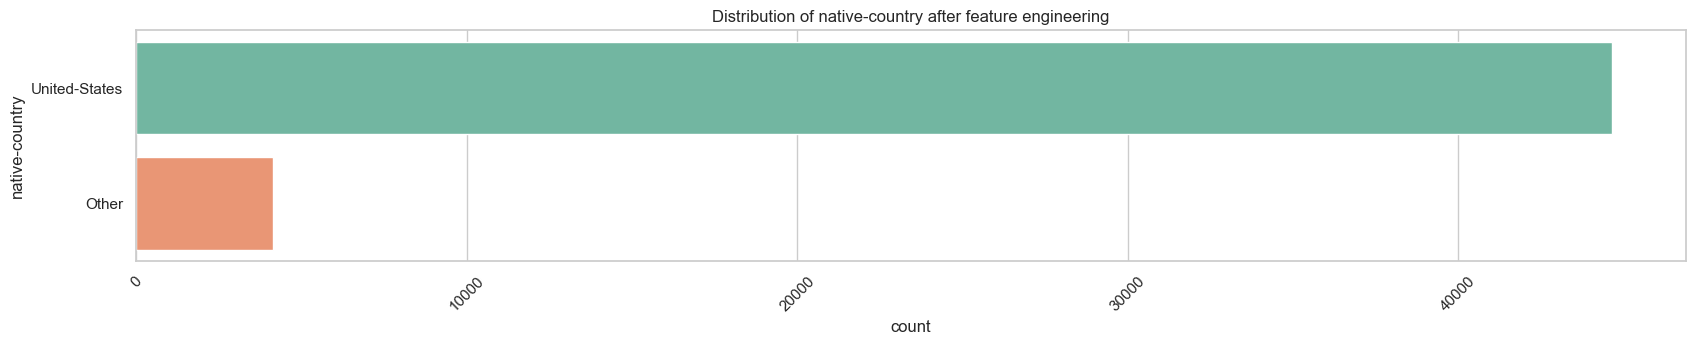

                value_counts  ratio_to_highest_value_count  percentage
native-country                                                        
United-States          44655                      1.000000   91.502397
Other                   4147                      0.092868    8.497603


In [66]:
selected_column=df['native-country']
plt.figure(figsize=(20, 3))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of native-country after feature engineering')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

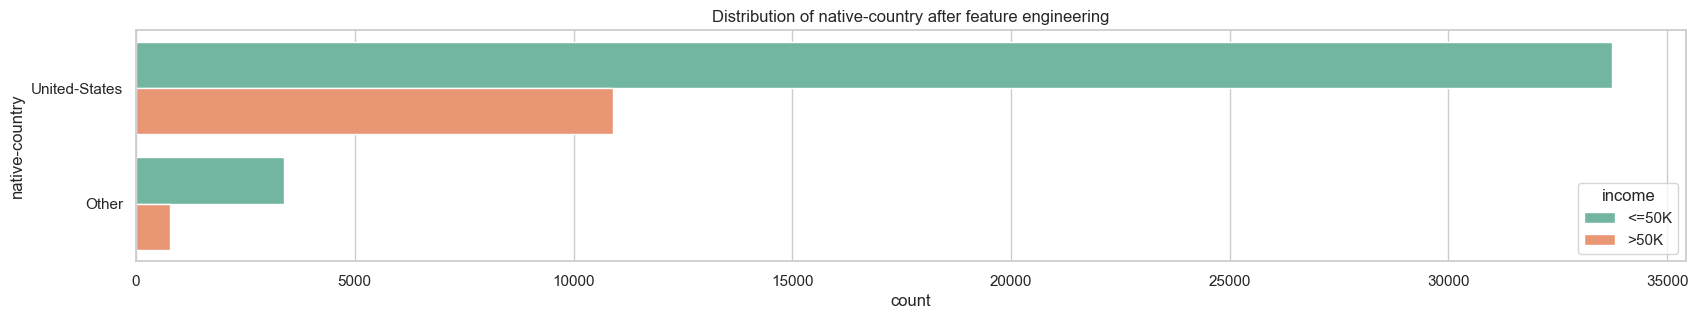

In [67]:
plt.figure(figsize=(20,3))
sns.countplot(y='native-country',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of native-country after feature engineering')
plt.show()

### 2.1.8. Exploitary data analysis and Feature engineering on "relationship" column

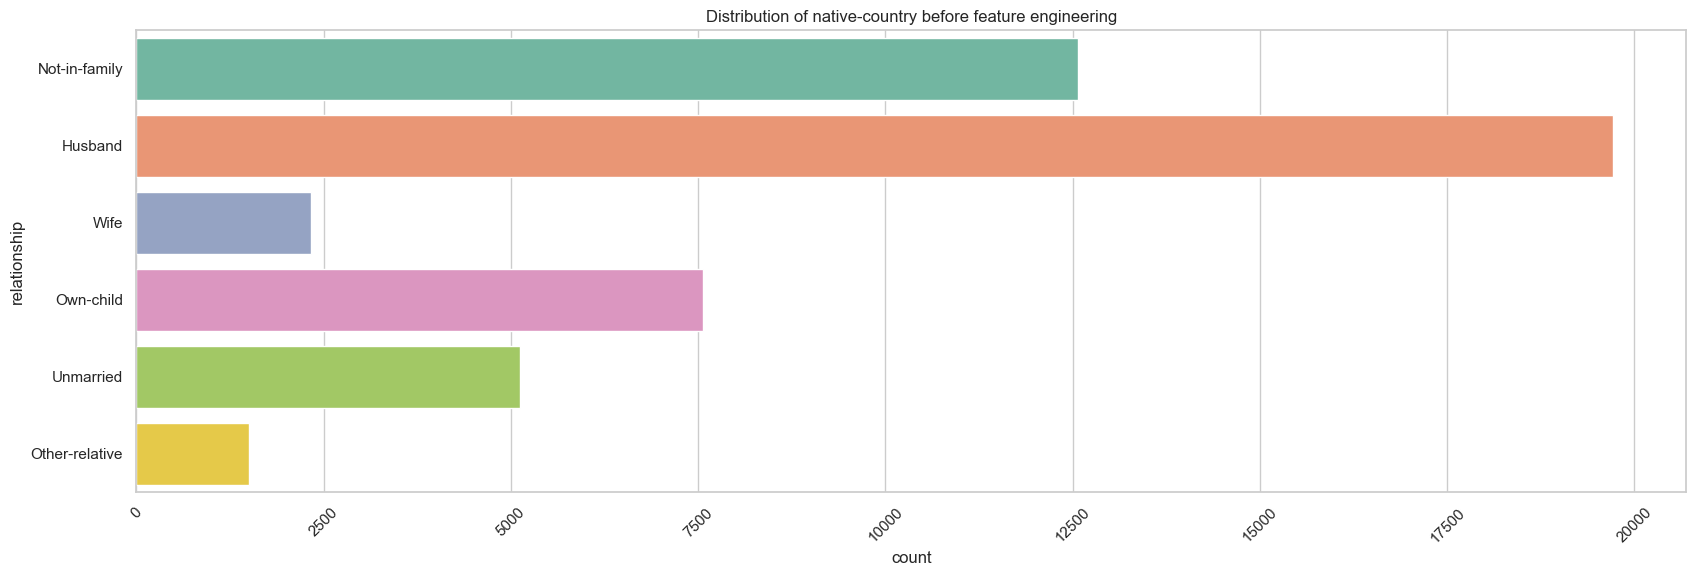

                value_counts  ratio_to_highest_value_count  percentage
relationship                                                          
Husband                19709                      1.000000   40.385640
Not-in-family          12566                      0.637577   25.748945
Own-child               7569                      0.384038   15.509610
Unmarried               5124                      0.259983   10.499570
Wife                    2329                      0.118169    4.772345
Other-relative          1505                      0.076361    3.083890


In [68]:
selected_column=df['relationship']
plt.figure(figsize=(20, 6))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of native-country before feature engineering')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

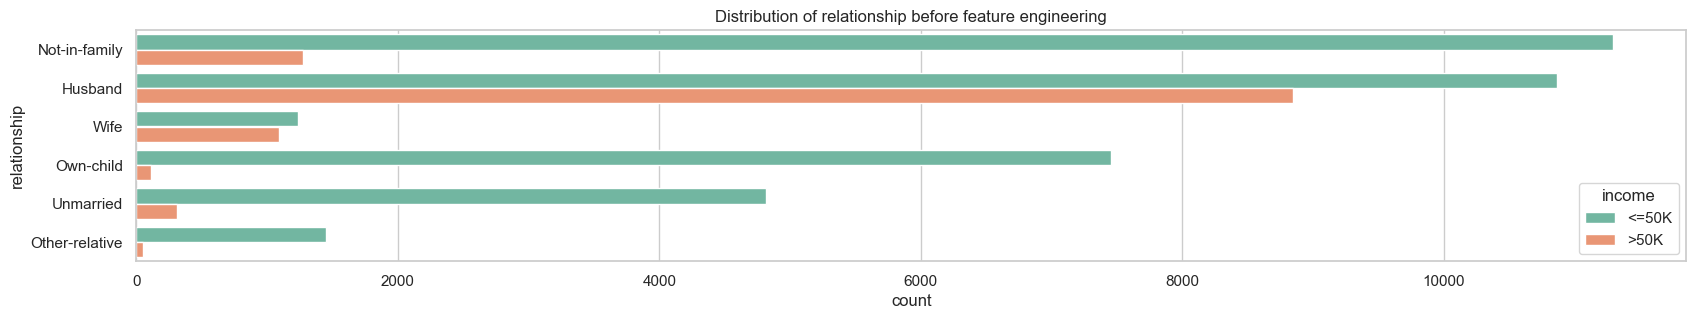

In [69]:
plt.figure(figsize=(20,3))
sns.countplot(y='relationship',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of relationship before feature engineering')
plt.show()

### 2.1.9. Exploitary data analysis and Feature engineering on "race" column

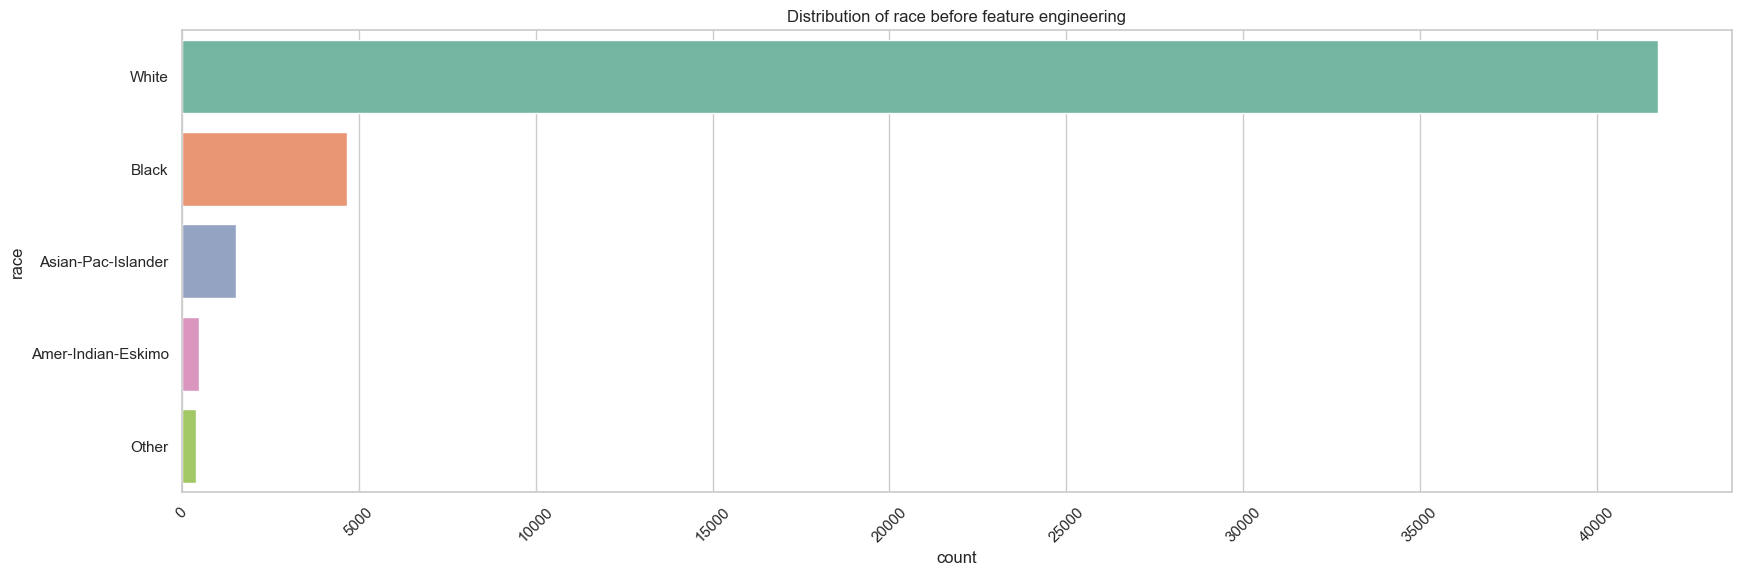

                    value_counts  ratio_to_highest_value_count  percentage
race                                                                      
White                      41728                      1.000000   85.504692
Black                       4680                      0.112155    9.589771
Asian-Pac-Islander          1518                      0.036378    3.110528
Amer-Indian-Eskimo           470                      0.011263    0.963075
Other                        406                      0.009730    0.831933


In [70]:
selected_column=df['race']
plt.figure(figsize=(20, 6))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of race before feature engineering')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

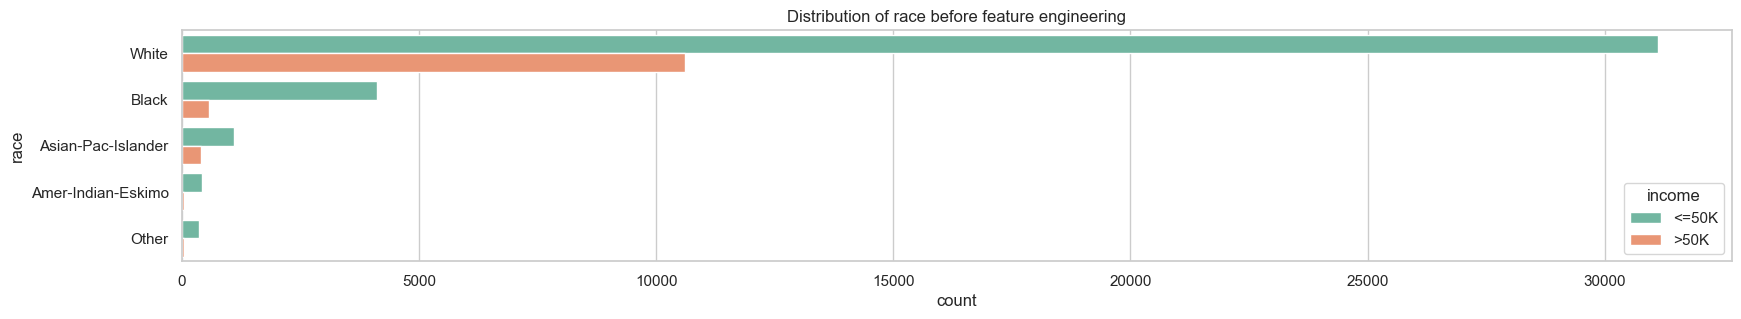

In [71]:
plt.figure(figsize=(20,3))
sns.countplot(y='race',hue='income',data=df,palette='Set2')
plt.title(f'Distribution of race before feature engineering')
plt.show()

## 2.2. Exploitary data analysis and Feature engineering on columns containing Numerical data

Analysations, visualizations and experimentations will be carried out on each column. If an abnormal condition met, they will be considered as outliers and removed.

### 2.2.1. Correlataion matrix

In [72]:
df['income']=df['income'].replace('<=50K', 0)
df['income']=df['income'].replace('>50K', 1)

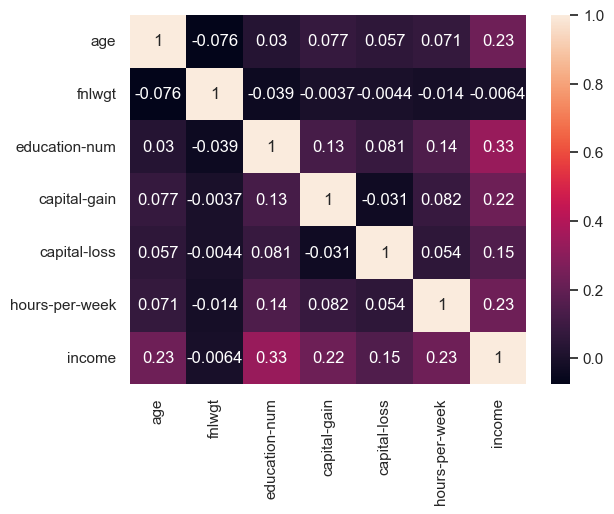

In [73]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [74]:
df['income']=df['income'].replace( 0,'<=50K')
df['income']=df['income'].replace(1,'>50K')

<Figure size 1200x1200 with 0 Axes>

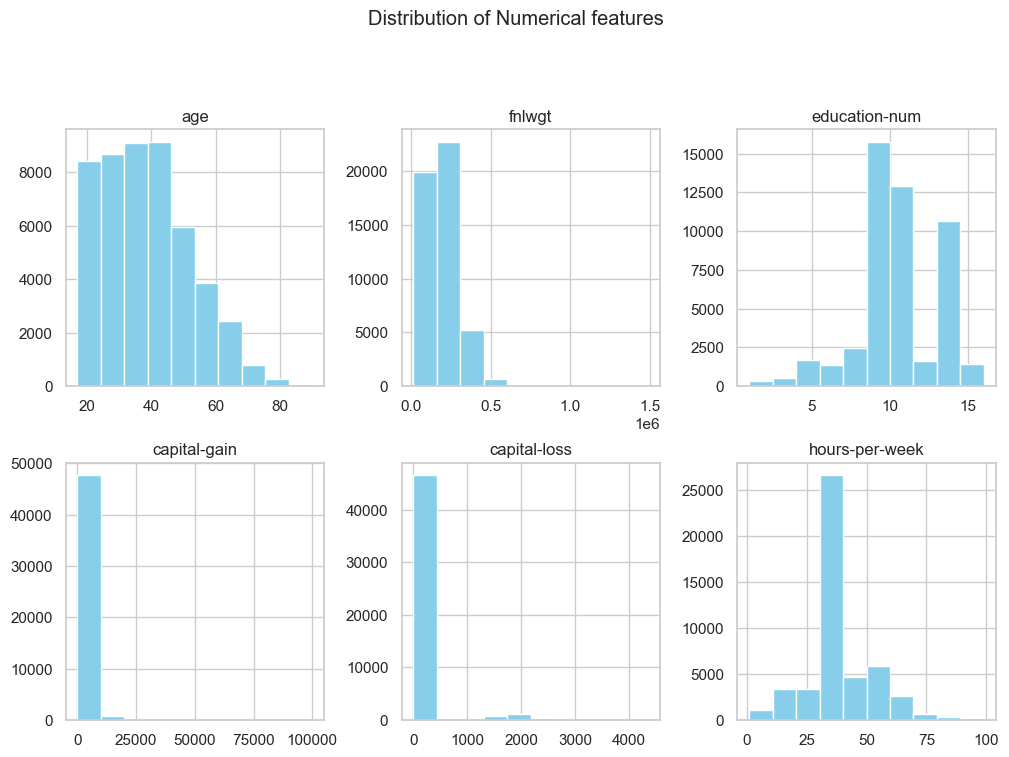

In [75]:

plt.figure(figsize=(12,12))
df.hist(figsize=(12,12), layout=(3,3), sharex=False,color='skyblue');
plt.suptitle(f'Distribution of Numerical features')
plt.show()

### 2.2.2. 5 number summary

age                  Axes(0.125,0.11;0.110714x0.77)
fnlwgt            Axes(0.257857,0.11;0.110714x0.77)
education-num     Axes(0.390714,0.11;0.110714x0.77)
capital-gain      Axes(0.523571,0.11;0.110714x0.77)
capital-loss      Axes(0.656429,0.11;0.110714x0.77)
hours-per-week    Axes(0.789286,0.11;0.110714x0.77)
dtype: object

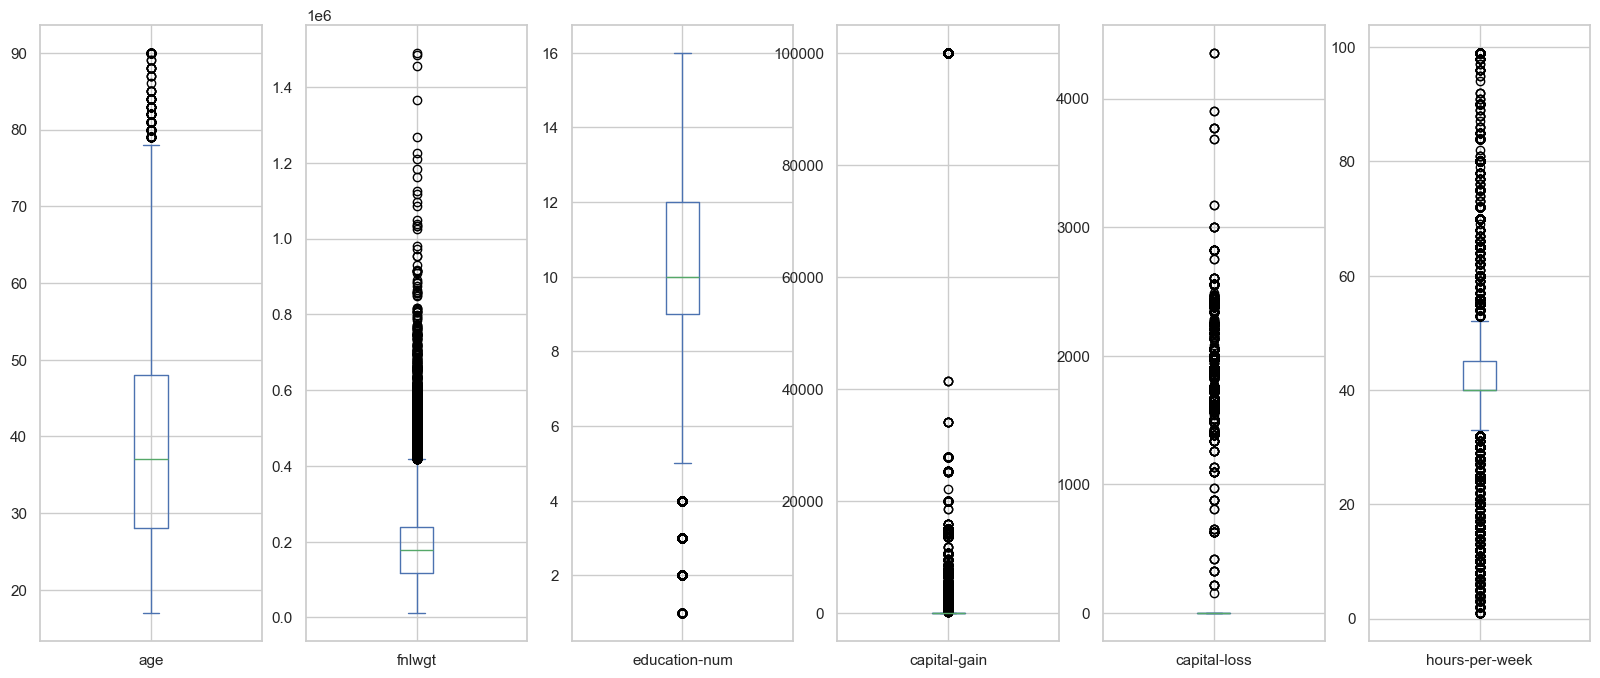

In [76]:
df.plot(kind='box',subplots=True,figsize=(20,8),layout=(1,6))

### 2.2.2. Exploitary data analysis on "education-num" column

In [77]:
df['education-num'].describe()

count    48802.000000
mean        10.079239
std          2.570139
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

<Axes: xlabel='education-num', ylabel='Count'>

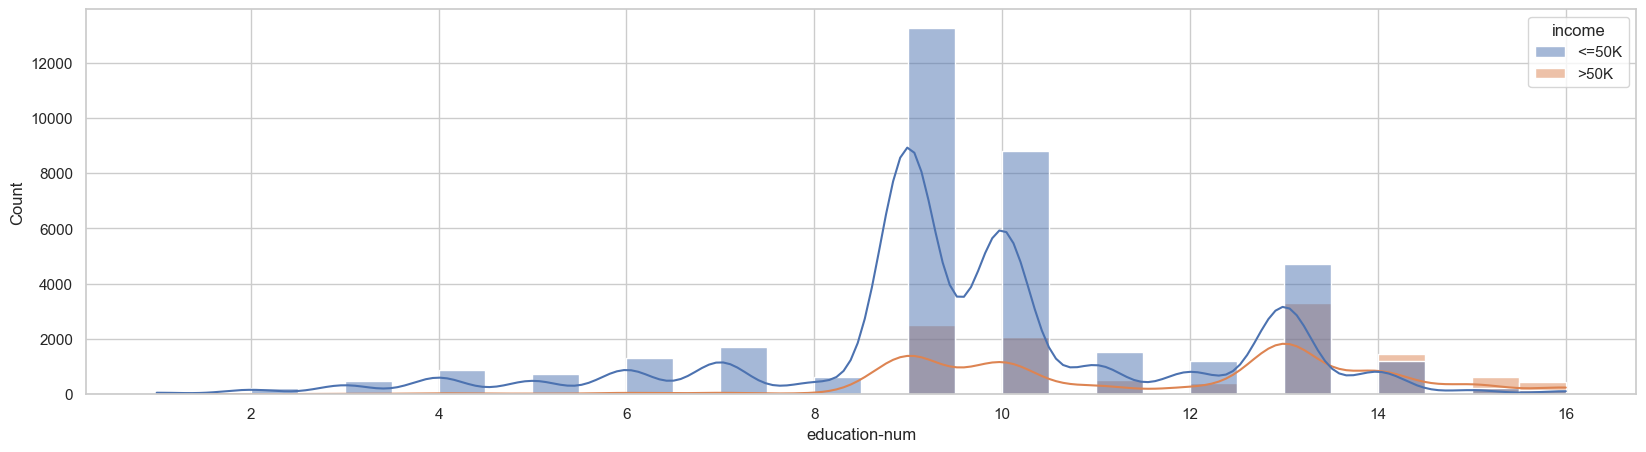

In [78]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="education-num", hue="income", bins=30,kde=True)

In [79]:
# import plotly.express as px

# # Create the histogram with Plotly Express
# fig = px.histogram(df, x="education-num", color="income", nbins=30, marginal="rug", 
#                    barmode='group', histnorm='probability density')

# # Update layout for better readability
# fig.update_layout(
#     title='Histogram of Education Number by Income',
#     xaxis_title='Education Number',
#     yaxis_title='Probability Density'
# )

# # Show the interactive plot
# fig.show()


### 2.2.3. Exploitary data analysis on "capital-gain" column

In [80]:
df['capital-gain'].describe()

count    48802.000000
mean      1079.952072
std       7455.008413
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

<Axes: xlabel='capital-gain', ylabel='Count'>

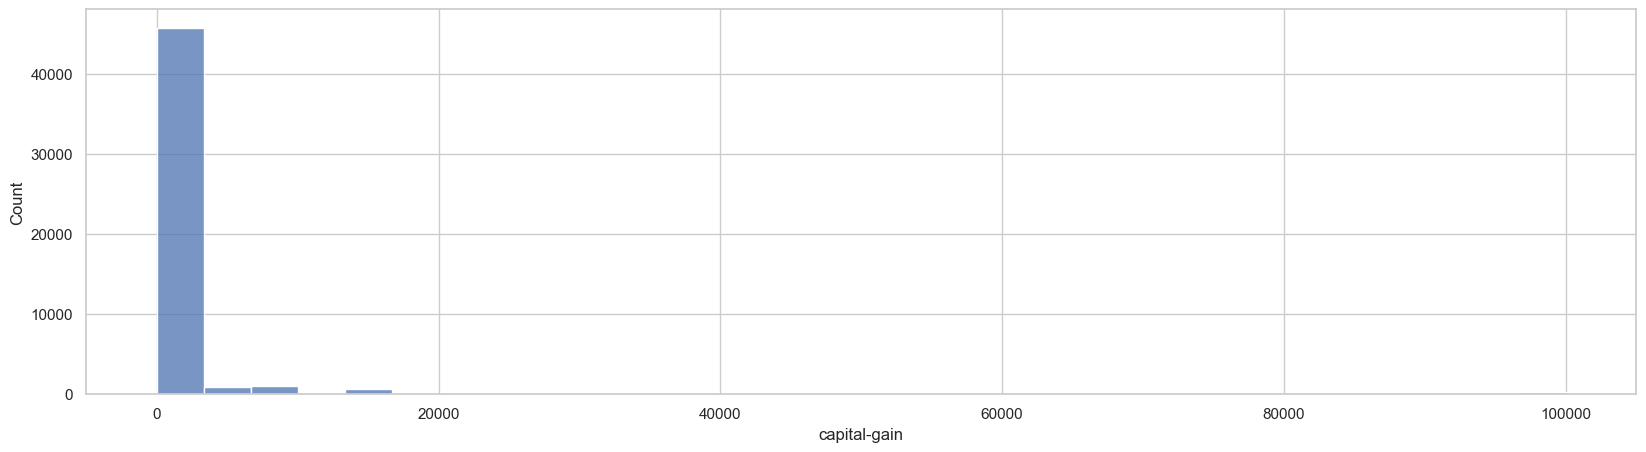

In [81]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="capital-gain",bins=30)

<Axes: xlabel='capital-gain', ylabel='Count'>

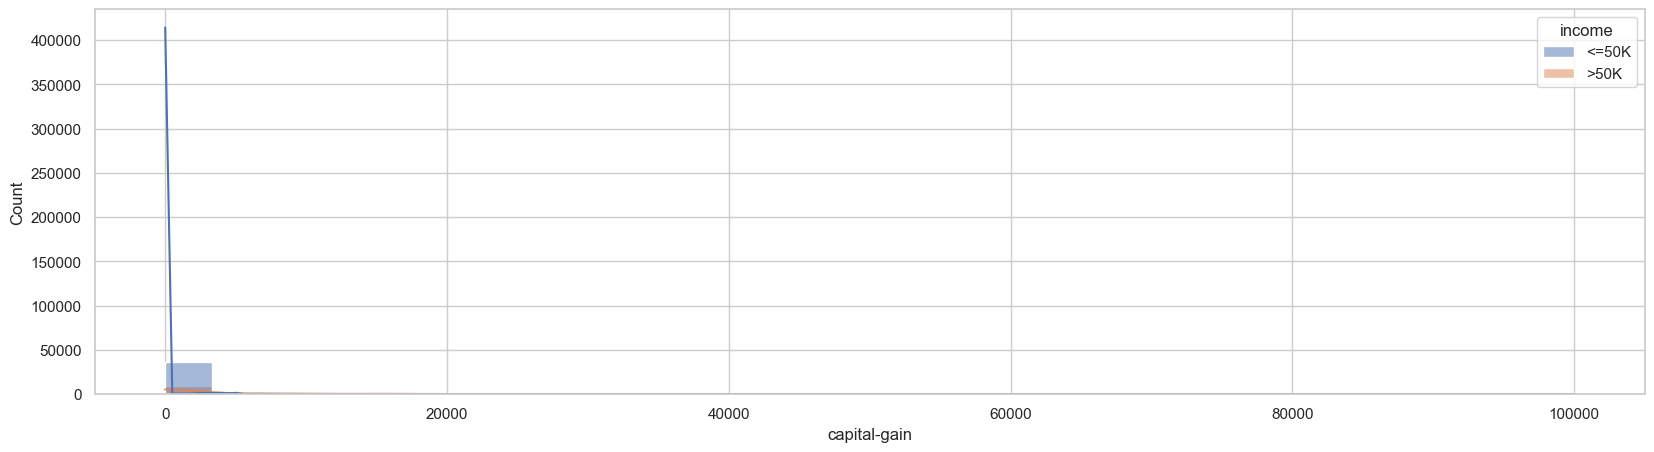

In [82]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="capital-gain", hue="income", bins=30,kde=True)

<Axes: xlabel='capital-gain', ylabel='Count'>

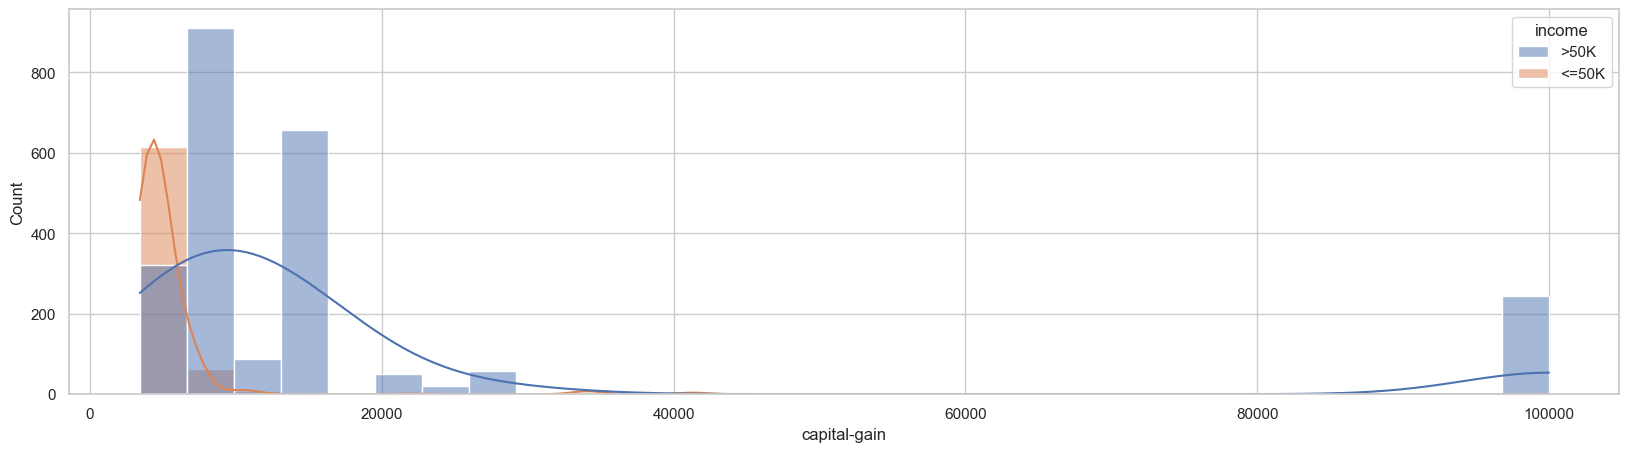

In [83]:
# filtering out the first bin of the above histogram to get a better idea of the values ranged between rest of the range
plt.figure(figsize=(20,5))
sns.histplot(df[df['capital-gain']>df['capital-gain'].max()/30], x="capital-gain", hue="income", bins=30,kde=True)

After enlarging the rest of the distribution it was noticed that the individuals earning less than 50K are less likely to have a capital gain higher than 20000. So to be more precise individuals earning less than 50K and having a capital gain higher than 20000 was filtered out.

In [84]:
print(df[((df['income']=='<=50K')&(df['capital-gain']>20000))].shape)
df[((df['income']=='<=50K')&(df['capital-gain']>20000))]

(10, 15)


age         workclass  fnlwgt        education  education-num  \
106     17           Private  304873  School-or-below              6   
3593    61  Self-emp-not-inc   32423          HS-grad              9   
4568    18           Private  301948          HS-grad              9   
6433    27           Private  211032  School-or-below              1   
7186    19           Private  188815          HS-grad              9   
15376   55  Self-emp-not-inc  145574          HS-grad              9   
17039   20           Private  273701          College             10   
20176   63  Self-emp-not-inc  289741          Masters             14   
36166   36  Self-emp-not-inc  240191          HS-grad              9   
36948   19           Private  248600  School-or-below              6   

      marital-status       occupation    relationship                race  \
106    Never-married   Prof-specialty       Own-child               White   
3593         Married  Farming-fishing            Wife               White   
4568   Never-married  Protective-serv       Own-child               White   
6433         Married  Farming-fishing  Other-relative               White   
7186   Never-married    Other-service       Own-child               White   
15376       Divorced  Exec-managerial   Not-in-family               White   
17039  Never-married     Craft-repair  Other-relative               Black   
20176        Married  Farming-fishing         Husband               White   
36166        Married  Exec-managerial         Husband  Asian-Pac-Islander   
36948  Never-married    Other-service  Other-relative               White   

          sex  capital-gain  capital-loss  hours-per-week native-country  \
106    Female         34095             0              32  United-States   
3593   Female         22040             0              40  United-States   
4568     Male         34095             0               3  United-States   
6433     Male         41310             0              24          Other   
7186   Female         34095             0              20  United-States   
15376    Male         34095             0              60  United-States   
17039    Male         34095             0              10  United-States   
20176    Male         41310             0              50  United-States   
36166    Male         41310             0              90          Other   
36948  Female         34095             0              24  United-States   

      income  
106    <=50K  
3593   <=50K  
4568   <=50K  
6433   <=50K  
7186   <=50K  
15376  <=50K  
17039  <=50K  
20176  <=50K  
36166  <=50K  
36948  <=50K

There are only 10 such individuals. So they are more likely to be outliers. So they were removed

In [85]:
df=df[~((df['income']=='<=50K')&(df['capital-gain']>20000))]

### 2.2.3. Exploitary data analysis on "capital-loss" column

In [86]:
df['capital-loss'].describe()

count    48792.000000
mean        87.591982
std        403.201255
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

<Axes: xlabel='capital-loss', ylabel='Count'>

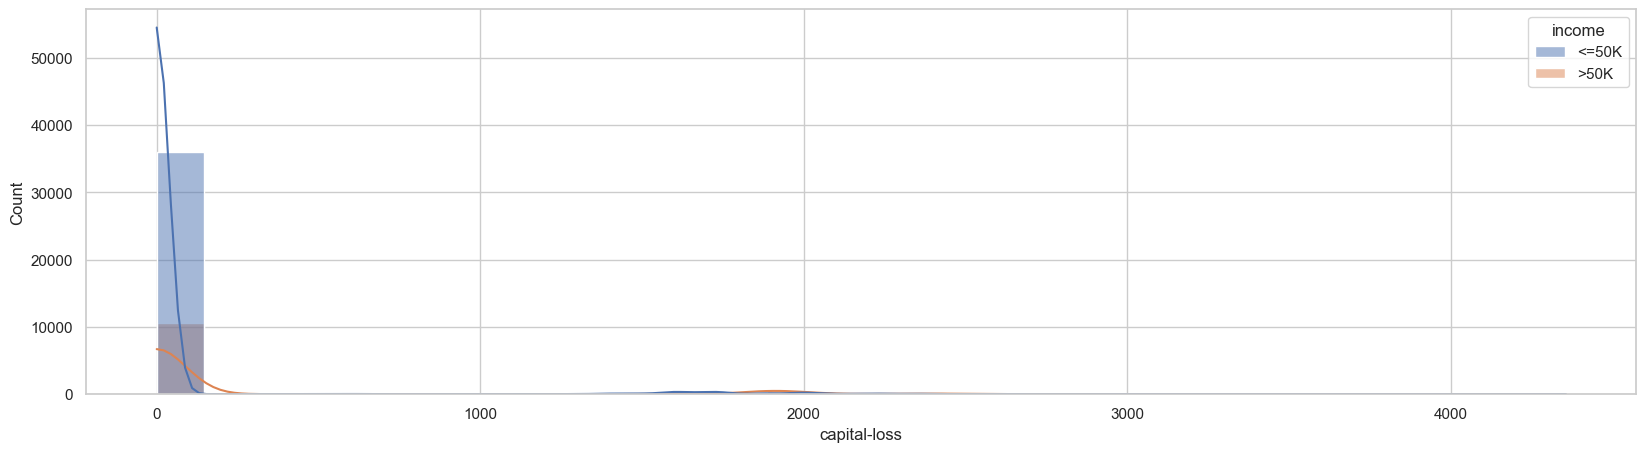

In [87]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="capital-loss", hue="income", bins=30,kde=True)

Most of the values are in the first bin. So to get a better visualization of the rest of the distribution, first bin will be filtered out.

<Axes: xlabel='capital-loss', ylabel='Count'>

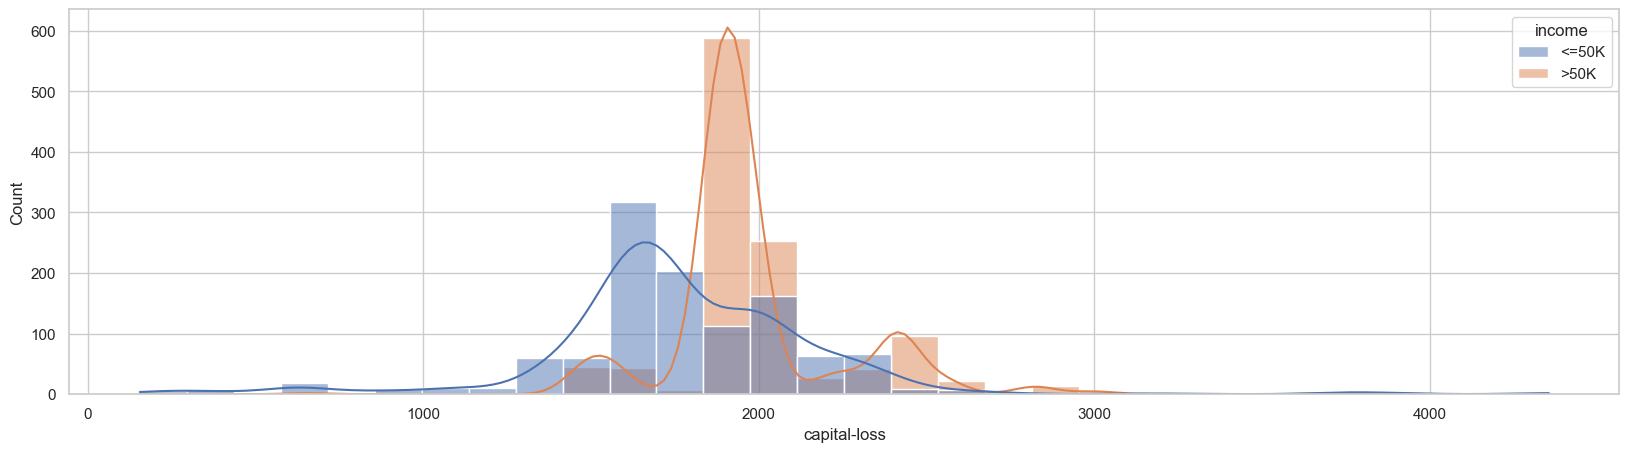

In [88]:
#filter out the 1st bin
plt.figure(figsize=(20,5))
sns.histplot(df[df['capital-loss']>df['capital-loss'].max()/30], x="capital-loss", hue="income", bins=30,kde=True)

### 2.2.4. Exploitary data analysis on "hours-per-week" column

In [89]:
df['hours-per-week'].describe()

count    48792.000000
mean        40.428472
std         12.386049
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

<Axes: xlabel='hours-per-week', ylabel='Count'>

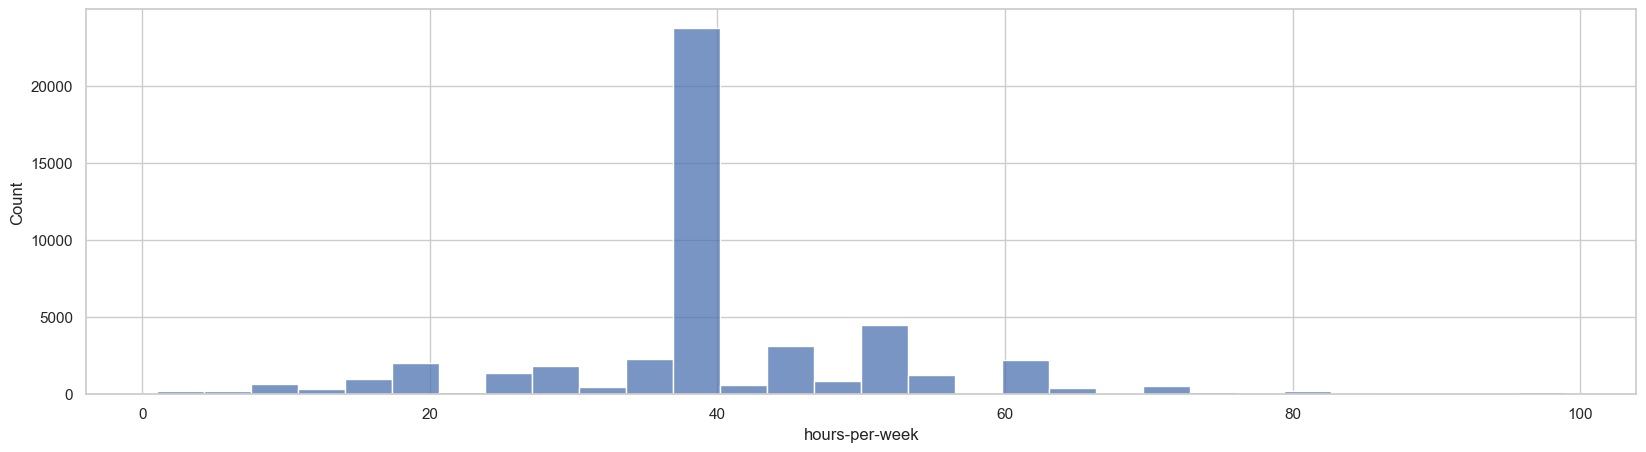

In [90]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="hours-per-week",bins=30)

<Axes: xlabel='hours-per-week', ylabel='Count'>

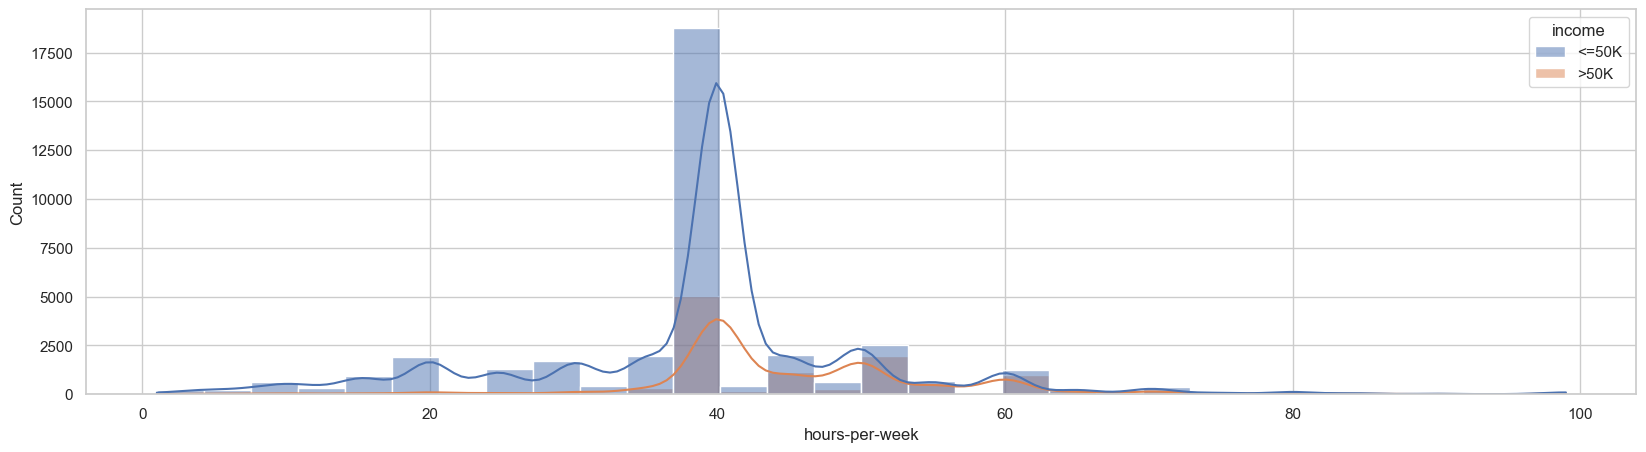

In [91]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="hours-per-week", hue="income", bins=30,kde=True)

It’s obvious that working hours of individuals depends on their age. As people get older they tend to work low count of hours. But also we have to consider the fact some old people tend to work longer hours because of the worsening economic conditions around the world. Anyway to get better idea about the connection between working hours and age, below scatter plot was used.

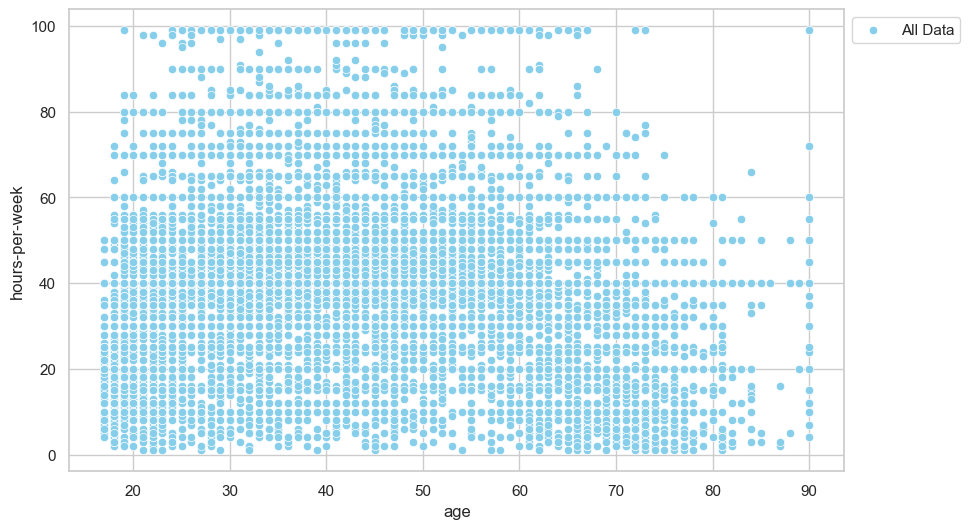

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df, color='skyblue', label='All Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


After looking at the above scatter plot, it was observed that there are some unrealistic scenarios. Example- An individual aged 90, working for 100 hours scenario. After careful analysis it was decided to consider the individuals older than 70 and working for more than 50 hours as outliers. After careful observation it was obvious that they don’t represent the general population of that age group.

(41, 15)


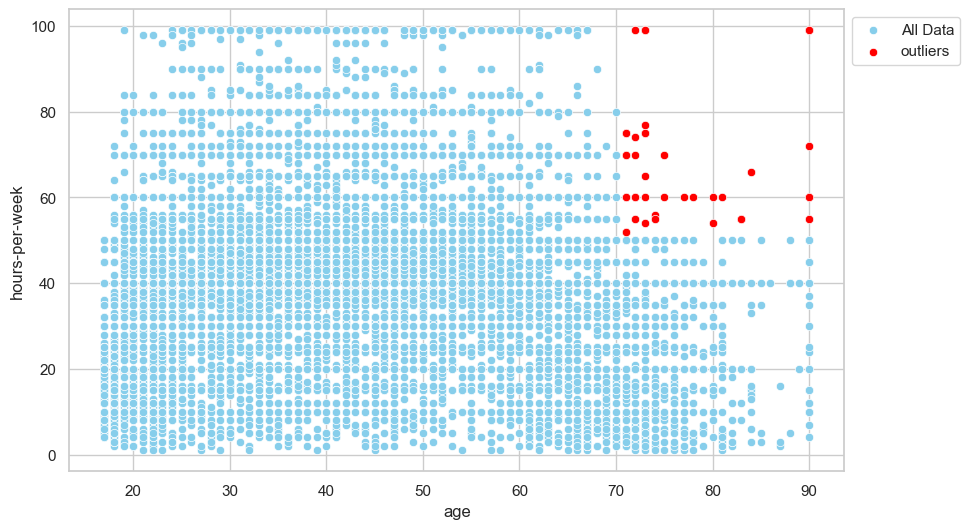

In [93]:
# Filter the data
outliers = (df['hours-per-week'] > 50) & (df['age'] > 70)
print(df[outliers].shape)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df, color='skyblue', label='All Data')
sns.scatterplot(x='age', y='hours-per-week', data=df[outliers], color='red', label='outliers')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [94]:
df=df[~outliers]

Tried to get an understanding of the connection between working hours and work class.

<Axes: xlabel='hours-per-week', ylabel='Count'>

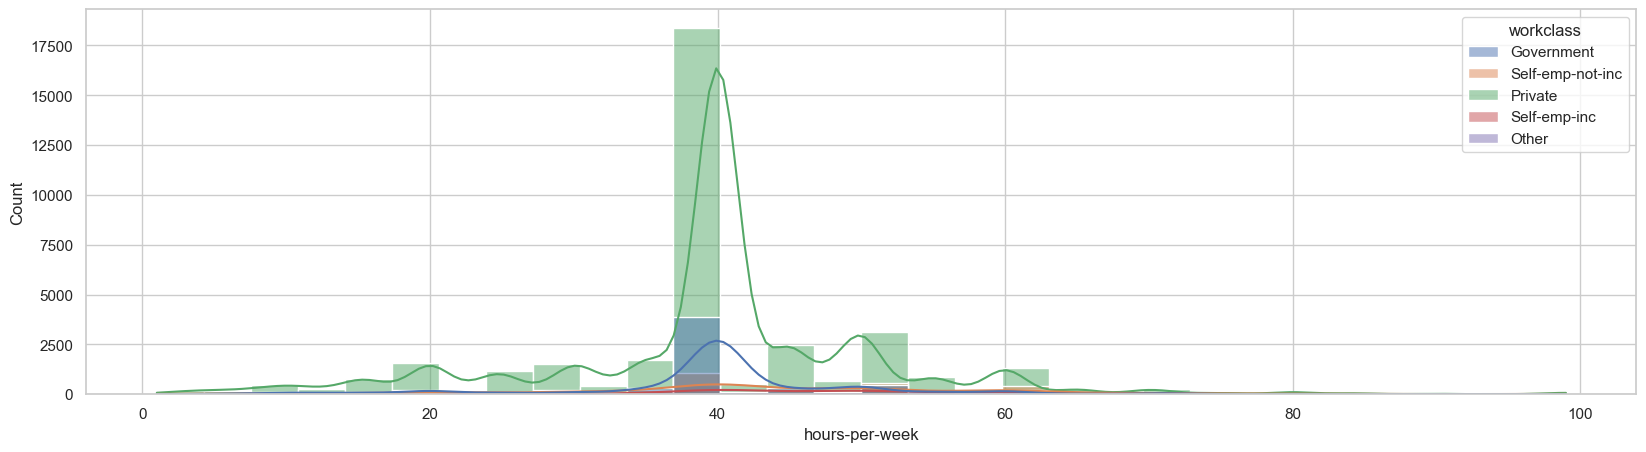

In [95]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="hours-per-week", hue="workclass", bins=30,kde=True)

Self employed jobs, jobs related to private sector and other sectors having working hours less than 20 seems reasonable as those categories represents a very diverse range of jobs. But when it comes to Government that seems bit unrealistic. Government jobs have very strict and structured work schedules. So the area under 20 of the above distribution will filtered out for further analysis.

278


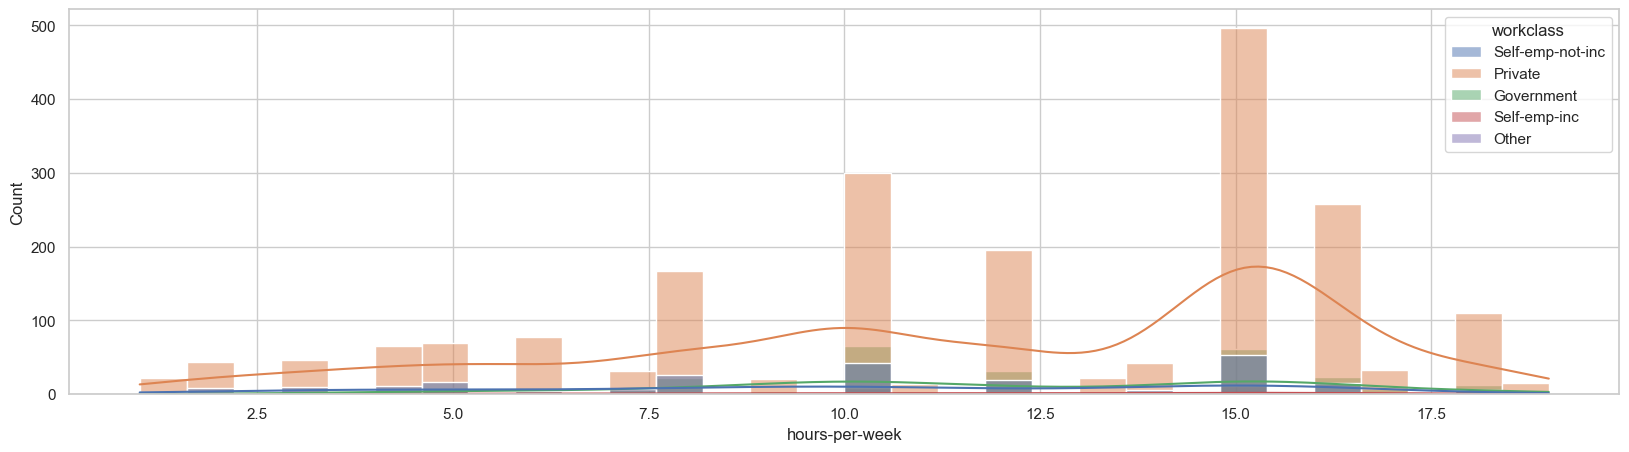

In [96]:
plt.figure(figsize=(20,5))
sns.histplot(df[df['hours-per-week'] < 20], x="hours-per-week", hue="workclass", bins=30,kde=True)

# Filter the outliers
outliers = (df['hours-per-week'] < 20) & (df['workclass'] == 'Government')
print(outliers.sum())

It was observed that there are 278 individuals who works in government that have less working hours. So they will be considered as outliers

In [97]:
df=df[~outliers]

### 2.2.5. Exploitary data analysis on "age" column

In [98]:
df['age'].describe()

count    48473.000000
mean        38.626287
std         13.618394
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

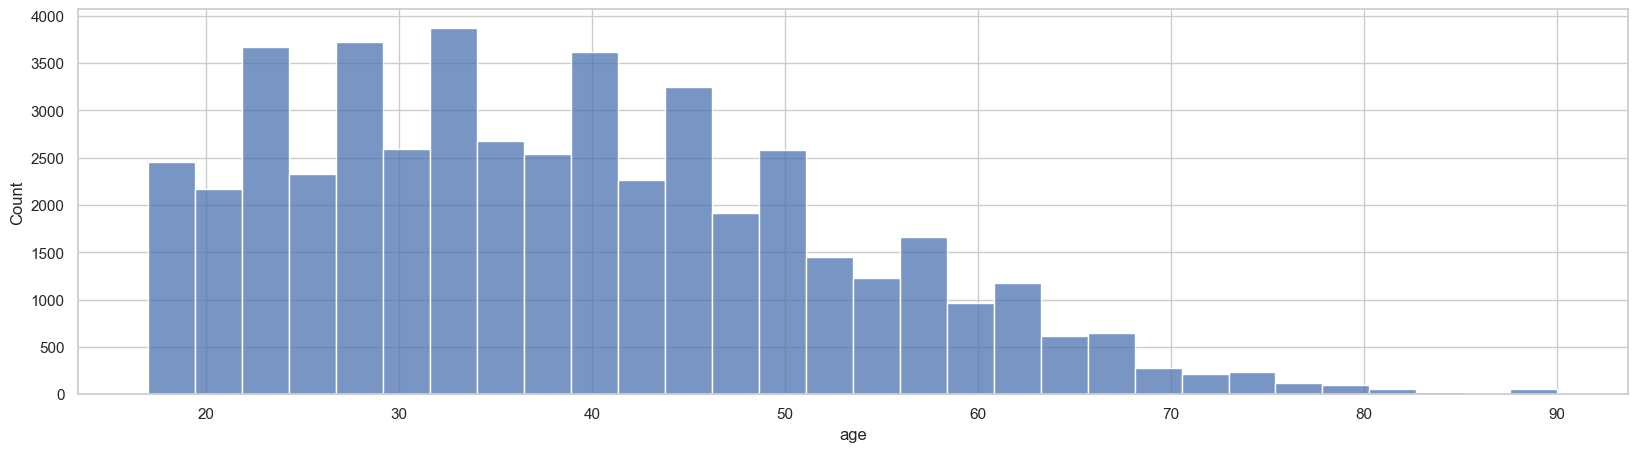

In [99]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="age",bins=30)

<Axes: xlabel='age', ylabel='Count'>

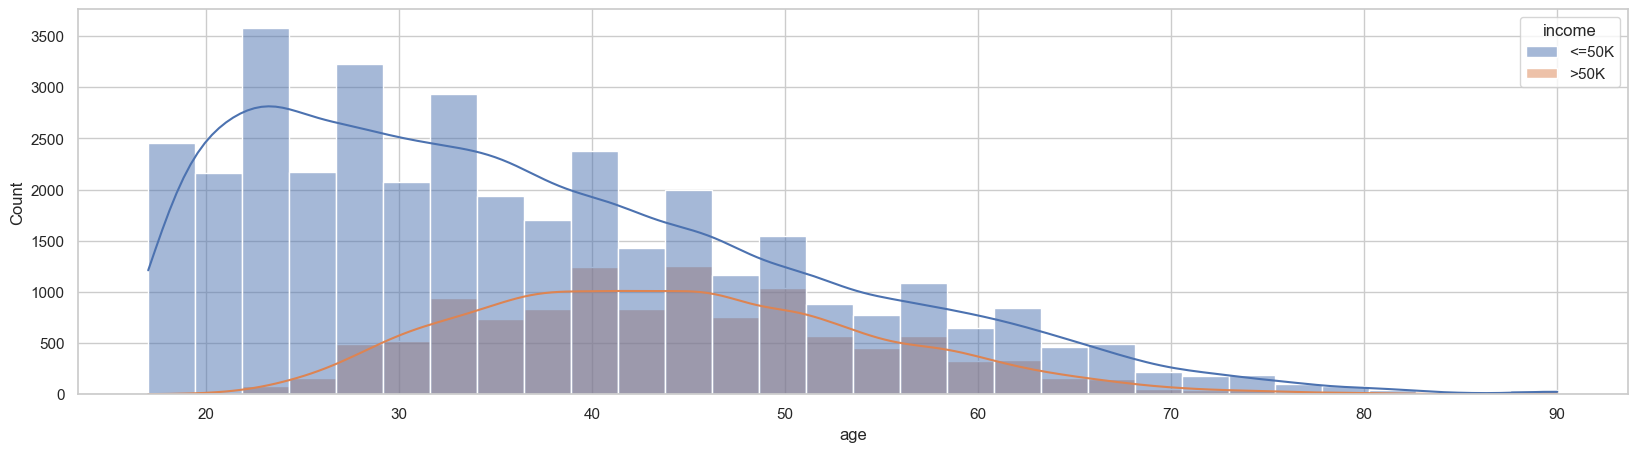

In [100]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="age", hue="income", bins=30,kde=True)

### 2.2.6. Exploitary data analysis on "fnlwgt" column

In [101]:
df['fnlwgt'].describe().astype(int)

count      48473
mean      189709
std       105597
min        12285
25%       117583
50%       178241
75%       237630
max      1490400
Name: fnlwgt, dtype: int32

<Axes: xlabel='fnlwgt', ylabel='Count'>

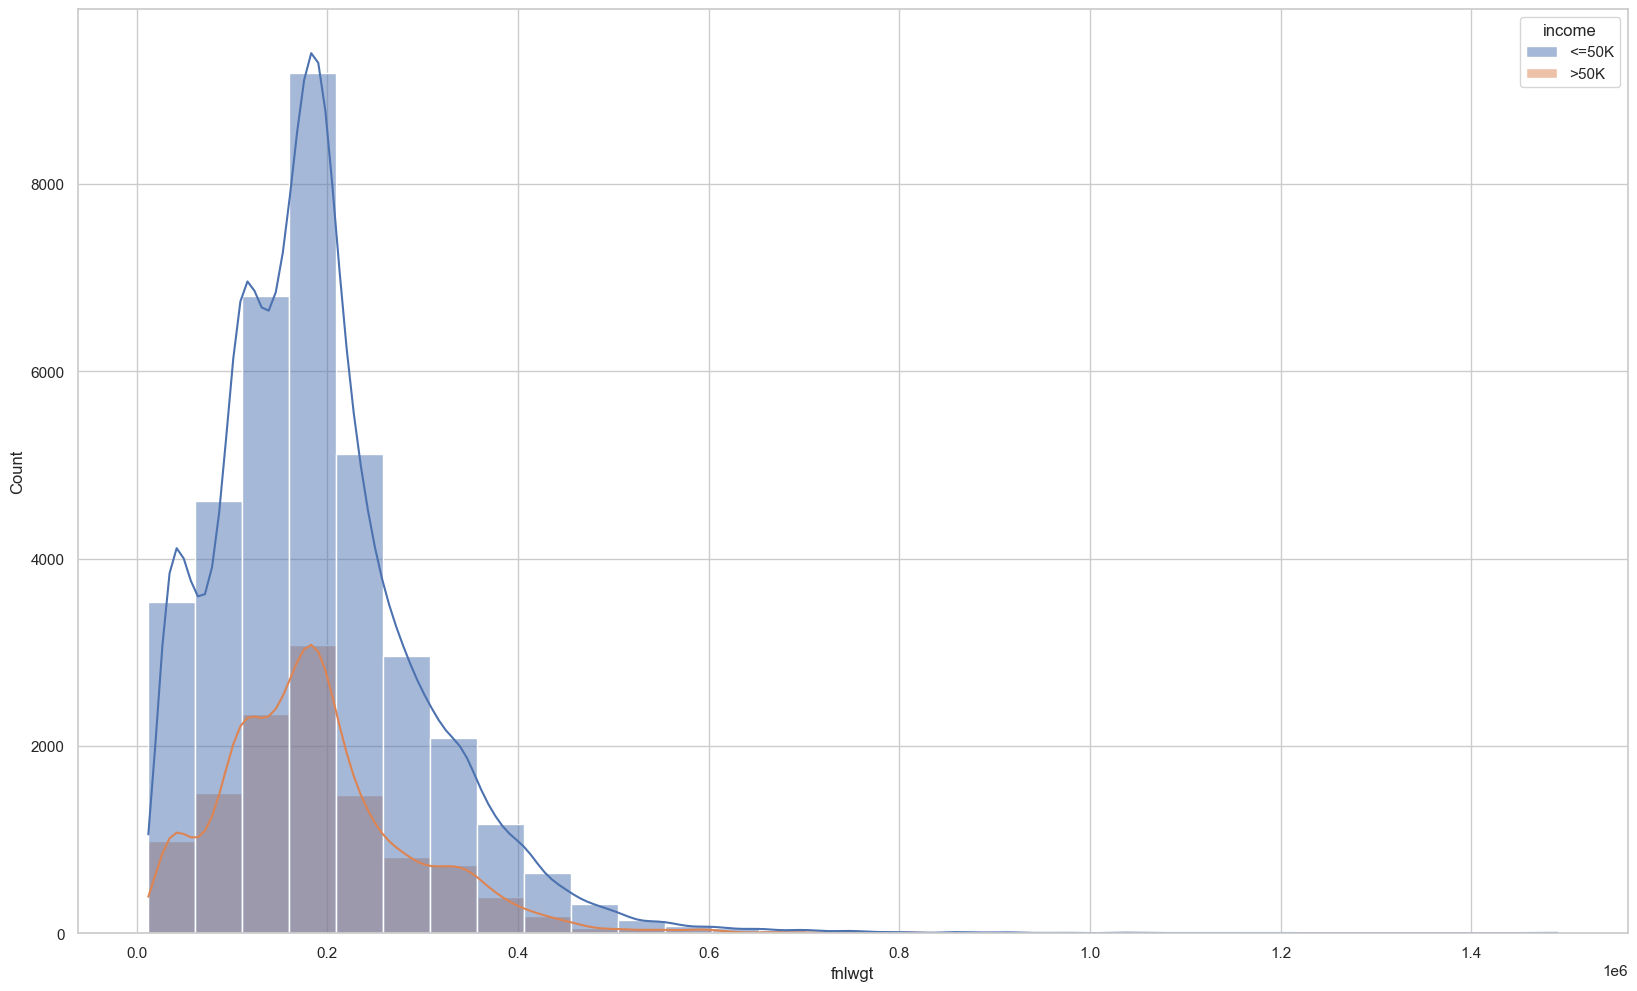

In [102]:
plt.figure(figsize=(20,12))
sns.histplot(df, x="fnlwgt", hue="income", bins=30,kde=True)

The range after 0.6 will be filtered out and visualized to gain and idea about the income distribution in that range.

<Axes: xlabel='fnlwgt', ylabel='Count'>

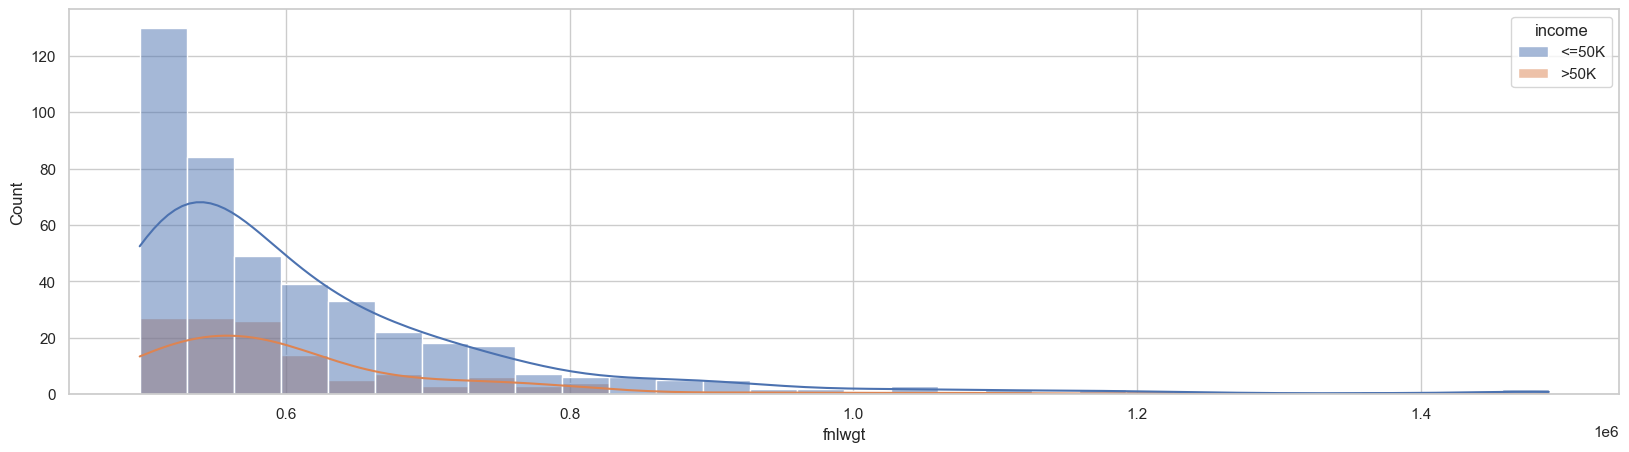

In [103]:
#filter out the 1st bin
plt.figure(figsize=(20,5))
sns.histplot(df[df['fnlwgt']>(df['fnlwgt'].max()/30)*10], x="fnlwgt", hue="income", bins=30,kde=True)

## 2.3. Handling the duplicate values occured during feature engineering

In [104]:
# Find duplicates considering all columns
duplicate_rows = df.duplicated()
print(df[duplicate_rows].shape)
df[duplicate_rows]


(25, 15)


age   workclass  fnlwgt        education  education-num marital-status  \
23520   22  Government  262819          College             10  Never-married   
33967   37     Private  222450  School-or-below              3        Married   
34050   19     Private  277695  School-or-below              1  Never-married   
34229   19     Private  130431  School-or-below              3  Never-married   
34415   22     Private  137876          College             10  Never-married   
34424   20     Private  203353          College             10  Never-married   
36713   17     Private  153021  School-or-below              8  Never-married   
37639   29     Private   41281        Bachelors             13   Other-status   
38343   21     Private  301694          HS-grad              9  Never-married   
38468   41     Private  116391        Bachelors             13        Married   
39017   19     Private  139466          College             10  Never-married   
39911   30     Private  111567          HS-grad              9  Never-married   
42386   25     Private  112835        Bachelors             13  Never-married   
43387   23     Private  250630        Bachelors             13  Never-married   
43484   23     Private  239539          HS-grad              9  Never-married   
44307   47     Private  199058          College             10        Married   
45049   39     Private  184659          HS-grad              9        Married   
46065   45     Private   82797        Bachelors             13        Married   
46714   21     Private  243368  School-or-below              1  Never-married   
46869   25     Private  308144        Bachelors             13  Never-married   
46959   19     Private  318822          HS-grad              9  Never-married   
47048   31     Private  228873          HS-grad              9        Married   
47399   43     Private  195258          HS-grad              9        Married   
47571   27     Private  199118          College             10  Never-married   
47884   23     Private  107882        Bachelors             13  Never-married   

              occupation   relationship                race     sex  \
23520       Adm-clerical  Not-in-family               White  Female   
33967  Machine-op-inspct        Husband               White    Male   
34050    Farming-fishing  Not-in-family               White    Male   
34229    Farming-fishing  Not-in-family               White    Male   
34415    Protective-serv  Not-in-family               White    Male   
34424    Exec-managerial      Own-child               White  Female   
36713              Sales      Own-child               White  Female   
37639    Exec-managerial  Not-in-family               White    Male   
38343       Craft-repair  Not-in-family               White    Male   
38468    Exec-managerial        Husband               White    Male   
39017              Sales      Own-child               White  Female   
39911       Craft-repair      Own-child               White    Male   
42386     Prof-specialty  Not-in-family               White    Male   
43387              Sales  Not-in-family               White  Female   
43484  Machine-op-inspct      Own-child  Asian-Pac-Islander    Male   
44307     Prof-specialty        Husband               White    Male   
45049  Machine-op-inspct        Husband               White    Male   
46065    Exec-managerial        Husband               White    Male   
46714    Farming-fishing  Not-in-family               White    Male   
46869       Craft-repair  Not-in-family               White    Male   
46959       Adm-clerical  Not-in-family               White  Female   
47048       Craft-repair        Husband               White    Male   
47399       Craft-repair        Husband               White    Male   
47571       Adm-clerical      Own-child               White  Female   
47884       Adm-clerical      Own-child               White  Female   

       capital-gain  capital-loss  hours-per-week nat

In [105]:
df=df.drop_duplicates(keep='first')
print(df[duplicate_rows].shape)
df[duplicate_rows]

(0, 15)


Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []

# 3. Feature Scaling and Feature selection

In [106]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [107]:
df1= df.copy()

## 3.1 Label Encoding Columns with catergorical data

Columns with catergorical data will be label encoded. Label encoding was chosen over one hot encoding because label encoding won’t create sperate columns for each category. And also mapped the actual categorical values with their label encoded values because it will be easy for people working with model in the future.

In [108]:
# Initialize a dictionary to store encoders and mappings
encoders = {}

# Iterate over each categorical column
for column in df1.select_dtypes(include=['object']):
    encoder = LabelEncoder()
    df1[column] = encoder.fit_transform(df1[column])
    encoders[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Print mappings for each column
for column, mapping in encoders.items():
    print(f"Column: {column}")
    for key, value in mapping.items():
        print(f"{key}: {value}")
    print('--------------------------------')

Column: workclass
Government: 0
Other: 1
Private: 2
Self-emp-inc: 3
Self-emp-not-inc: 4
--------------------------------
Column: education
Bachelors: 0
College: 1
Doctorate: 2
HS-grad: 3
Masters: 4
School-or-below: 5
--------------------------------
Column: marital-status
Divorced: 0
Married: 1
Never-married: 2
Other-status: 3
--------------------------------
Column: occupation
Adm-clerical: 0
Armed-Forces: 1
Craft-repair: 2
Exec-managerial: 3
Farming-fishing: 4
Handlers-cleaners: 5
Machine-op-inspct: 6
Other-service: 7
Priv-house-serv: 8
Prof-specialty: 9
Protective-serv: 10
Sales: 11
Tech-support: 12
Transport-moving: 13
--------------------------------
Column: relationship
Husband: 0
Not-in-family: 1
Other-relative: 2
Own-child: 3
Unmarried: 4
Wife: 5
--------------------------------
Column: race
Amer-Indian-Eskimo: 0
Asian-Pac-Islander: 1
Black: 2
Other: 3
White: 4
--------------------------------
Column: sex
Female: 0
Male: 1
--------------------------------
Column: native-country

In [109]:
df1.head(20)

age  workclass  fnlwgt  education  education-num  marital-status  \
0    39          0   77516          0             13               2   
1    50          4   83311          0             13               1   
2    38          2  215646          3              9               0   
3    53          2  234721          5              7               1   
4    28          2  338409          0             13               1   
5    37          2  284582          4             14               1   
6    49          2  160187          5              5               3   
7    52          4  209642          3              9               1   
8    31          2   45781          4             14               2   
9    42          2  159449          0             13               1   
10   37          2  280464          1             10               1   
11   30          0  141297          0             13               1   
12   23          2  122272          0             13               2   
13   32          2  205019          1             12               2   
14   40          2  121772          1             11               1   
15   34          2  245487          5              4               1   
16   25          4  176756          3              9               2   
17   32          2  186824          3              9               2   
18   38          2   28887          5              7               1   
19   43          4  292175          4             14               0   

    occupation  relationship  race  sex  capital-gain  capital-loss  \
0            0             1     4    1          2174             0   
1            3             0     4    1             0             0   
2            5             1     4    1             0             0   
3            5             0     2    1             0             0   
4            9             5     2    0             0             0   
5            3             5     4    0             0             0   
6            7             1     2    0             0             0   
7            3             0     4    1             0             0   
8            9             1     4    0         14084             0   
9            3             0     4    1          5178             0   
10           3             0     2    1             0             0   
11           9             0     1    1             0             0   
12           0             3     4    0             0             0   
13          11             1     2    1             0             0   
14           2             0     1    1             0             0   
15          13             0     0    1             0             0   
16           4             3     4    1             0             0   
17           6             4     4    1             0             0   
18          11             0     4    1             0             0   
19           3             4     4    0             0             0   

    hours-per-week  native-country  income  
0               40               1       0  
1               13               1       0  
2               40               1       0  
3               40               1       0  
4               40               0       0  
5               40               1       0  
6               16               0       0  
7               45               1       1  
8               50               1       1  
9               40               1       1  
10              80               1       1  
11              40               0       1  
12              30               1       0  
13              50               1       0  
14              40               1       1  
15              45               0       0  
16              35               1       0  
17              40               1       0  
18              50               1       0  
19              45               1       1

## 3.2 Standardization the "fnlwgt" column

Fnlwgt has very large scale. So it was standardized. 

In [110]:
scaler=StandardScaler()
df1['fnlwgt']=scaler.fit_transform(df1[['fnlwgt']])

In [111]:
df1.head(5)

age  workclass    fnlwgt  education  education-num  marital-status  \
0   39          0 -1.062334          0             13               2   
1   50          4 -1.007462          0             13               1   
2   38          2  0.245588          3              9               0   
3   53          2  0.426205          5              7               1   
4   28          2  1.408003          0             13               1   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  native-country  income  
0              40               1       0  
1              13               1       0  
2              40               1       0  
3              40               1       0  
4              40               0       0

## 3.3 Feature Selection

In [112]:
df1.corr()['income']

age               0.231184
workclass        -0.008165
fnlwgt           -0.006226
education        -0.173587
education-num     0.333907
marital-status   -0.201267
occupation        0.056774
relationship     -0.253053
race              0.071129
sex               0.214376
capital-gain      0.223766
capital-loss      0.147527
hours-per-week    0.226723
native-country    0.038256
income            1.000000
Name: income, dtype: float64

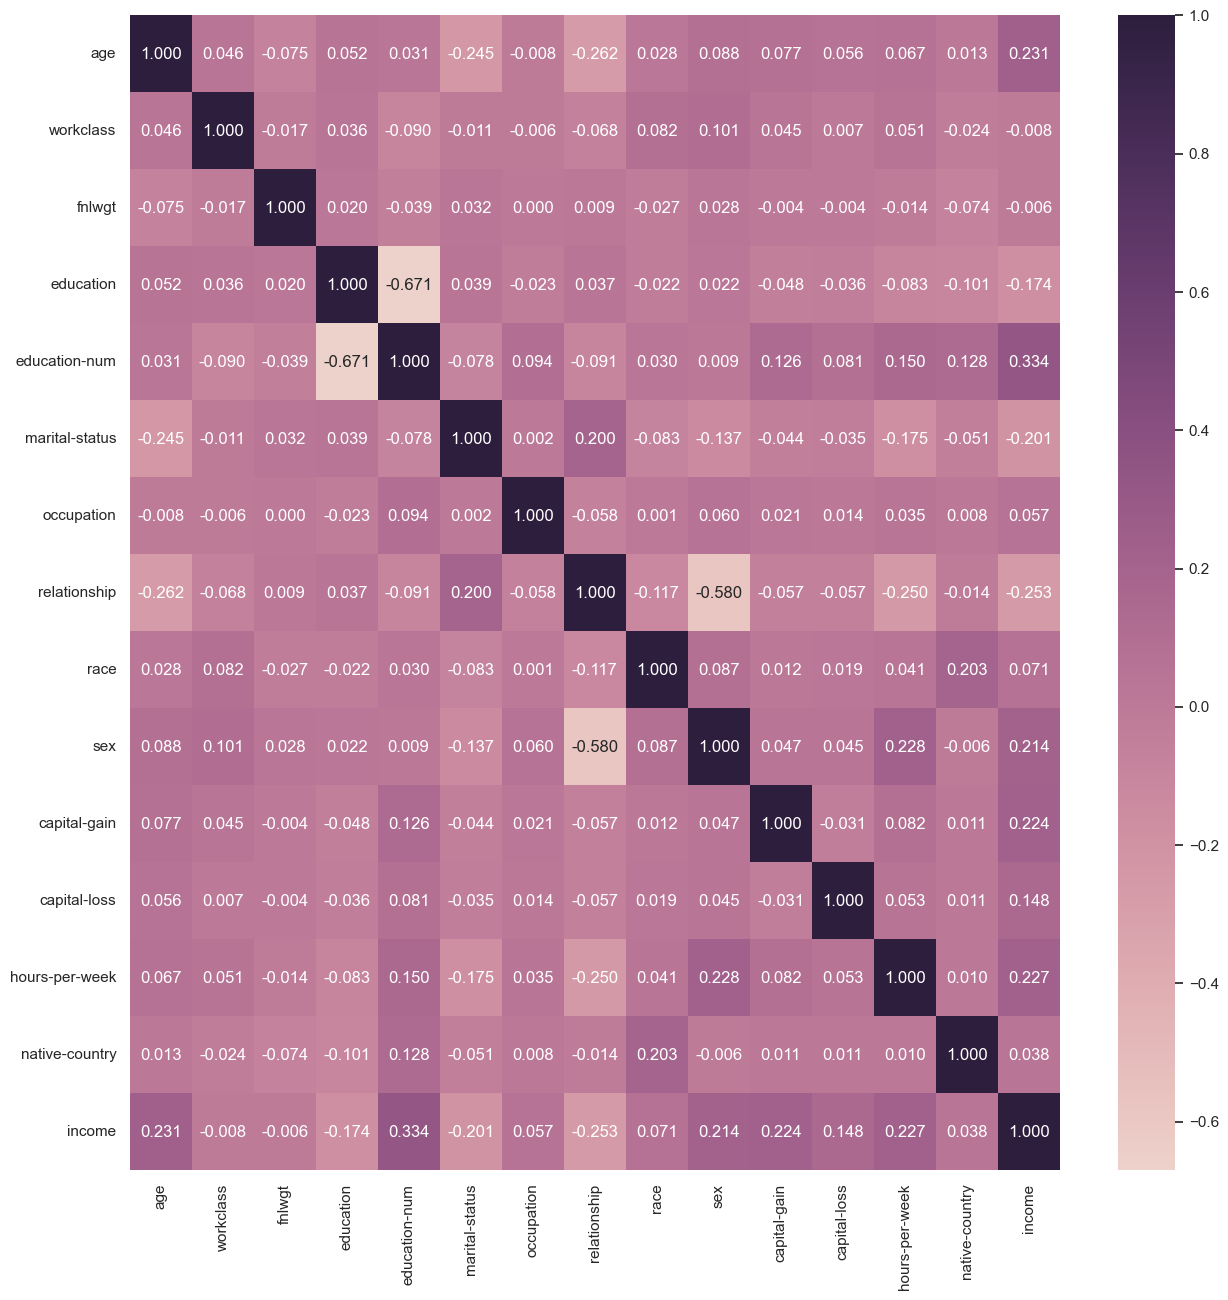

In [113]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True,fmt='.3f',cmap=sns.cubehelix_palette(as_cmap=True));

41Due to the low corelation with income features like ['fnlwgt','workclass','native-country'] will be removed. And education and education-num are highly correlated to each other, so one should be removed. Out of that pair education is less correlated(-0.17) to ‘income’. So it will be removed.

Sex column can also be removed as it is highly correlated ‘relationship’ and less correlated to income compared to ‘relationship’. But it wasn’t removed. If good scores cannot be achieved during model evaluation it will be removed.

In [114]:
X=df1.drop(columns=['income','fnlwgt','education','workclass','native-country'])
y=df1['income']

In [115]:
X.columns

Index(['age', 'education-num', 'marital-status', 'occupation', 'relationship',
       'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')

In [116]:
X.head(10)

age  education-num  marital-status  occupation  relationship  race  sex  \
0   39             13               2           0             1     4    1   
1   50             13               1           3             0     4    1   
2   38              9               0           5             1     4    1   
3   53              7               1           5             0     2    1   
4   28             13               1           9             5     2    0   
5   37             14               1           3             5     4    0   
6   49              5               3           7             1     2    0   
7   52              9               1           3             0     4    1   
8   31             14               2           9             1     4    0   
9   42             13               1           3             0     4    1   

   capital-gain  capital-loss  hours-per-week  
0          2174             0              40  
1             0             0              13  
2             0             0              40  
3             0             0              40  
4             0             0              40  
5             0             0              40  
6             0             0              16  
7             0             0              45  
8         14084             0              50  
9          5178             0              40

Models evaluated during 2 stages: before imbalance learning and after
imbalance learning. Naïve Bayes and Random Forest Classification will be used

# 4. Model Implementation before imbalance learning

## 4.1.Train Test split

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 142)

## 4.2. RandomForestClassifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [119]:
random_forest = RandomForestClassifier(random_state=142)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

print('Train score:',random_forest.score(X_train,y_train))
print('Test score:',random_forest.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, predictions))

Train score: 0.9606640521334002
Test score: 0.8438252493980049
Classification report-----------------------
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     11108
           1       0.69      0.62      0.65      3427

    accuracy                           0.84     14535
   macro avg       0.79      0.77      0.78     14535
weighted avg       0.84      0.84      0.84     14535



Text(29.75, 0.5, 'True Label')

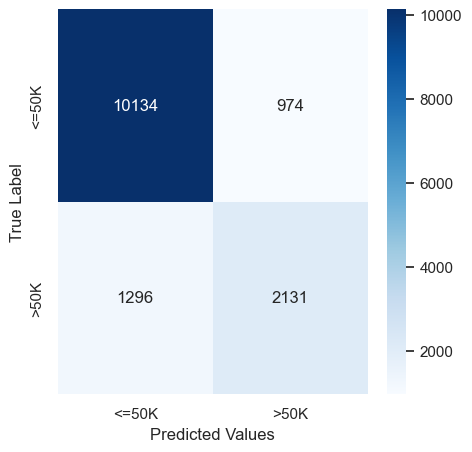

In [120]:
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt='.0f', xticklabels=labels, yticklabels=labels,cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

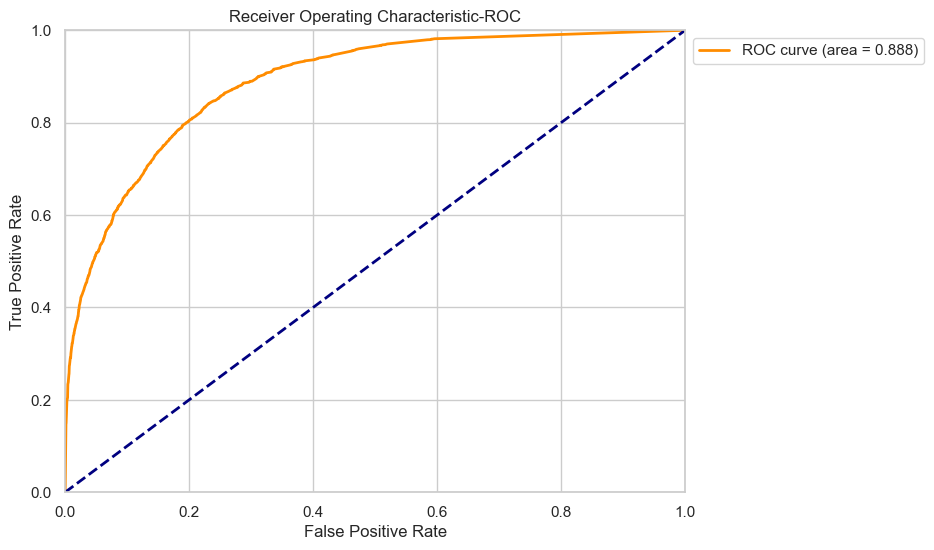

In [121]:
# Get predicted probabilities for the positive class
y_score = random_forest.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## Parameter optimization

The optimization technique utilized for this project is Optuna. Optuna automates the process of hyperparameter tuning for machine learning models. It functions by defining an objective function that evaluates the model's performance based on specified hyperparameters. These hyperparameters are sampled from a defined search space, which can be customized to suit the problem at hand.

In [122]:
import optuna

In [123]:
def objective(trial):

    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 40, 110)
    max_depth = trial.suggest_categorical('max_depth', [None, *range(90, 100)])
    min_samples_split = trial.suggest_int('min_samples_split', 3, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2']) 

    # Instantiate the random forest classifier with the suggested hyperparameters
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 max_features=max_features,
                                 n_jobs=-1,
                                 random_state=142)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Calculate training and testing accuracy
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    # Penalize the objective if the conditions are not met
    penalty = 0
    if test_accuracy<0.865 or  train_accuracy>  0.895:
        penalty = 10000  # Apply a large penalty to steer optimization away from violating conditions

    # Minimize the objective function (1 - testing accuracy) with overfitting penalty
    return 1 - test_accuracy + penalty

# Perform optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train the final model with the best parameters
best_clf = RandomForestClassifier(**best_params, random_state=142)
best_clf.fit(X_train, y_train)

# Evaluate the final model
final_train_accuracy = accuracy_score(y_train, best_clf.predict(X_train))
final_test_accuracy = accuracy_score(y_test, best_clf.predict(X_test))

print("Final Training Accuracy:", final_train_accuracy)
print("Final Testing Accuracy:", final_test_accuracy)
print('Classification report-----------------------')
print(classification_report(y_test, best_clf.predict(X_test)))



[I 2024-03-29 19:15:40,327] A new study created in memory with name: no-name-17a3eb75-09f7-4704-b2c7-dd101cf5531d
[I 2024-03-29 19:15:41,072] Trial 0 finished with value: 0.13429652562779493 and parameters: {'n_estimators': 79, 'max_depth': 98, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.13429652562779493.
[I 2024-03-29 19:15:41,750] Trial 1 finished with value: 10000.136154110767 and parameters: {'n_estimators': 93, 'max_depth': 93, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.13429652562779493.
[I 2024-03-29 19:15:42,299] Trial 2 finished with value: 10000.135466116271 and parameters: {'n_estimators': 90, 'max_depth': 95, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.13429652562779493.
[I 2024-03-29 19:15:42,720] Trial 3 finished with value: 0.13464052287581696 and parameters: {'n_estimators': 60, 'max_depth': 93, '

Best Parameters: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Final Training Accuracy: 0.8901306283726005
Final Testing Accuracy: 0.8662538699690403
Classification report-----------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     11108
           1       0.76      0.63      0.69      3427

    accuracy                           0.87     14535
   macro avg       0.83      0.78      0.80     14535
weighted avg       0.86      0.87      0.86     14535



In [124]:
# Best Parameters: {'n_estimators': 77, 'max_depth': 98, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
# Final Training Accuracy: 0.8840562616105918
# Final Testing Accuracy: 0.8661162710698315
# Classification report-----------------------
#               precision    recall  f1-score   support

#            0       0.89      0.94      0.91     11108
#            1       0.77      0.62      0.69      3427

#     accuracy                           0.87     14535
#    macro avg       0.83      0.78      0.80     14535
# weighted avg       0.86      0.87      0.86     14535

### Model training with optimized parameters

In [125]:
random_forest = RandomForestClassifier(n_estimators=77, max_depth= 98, min_samples_split= 4, min_samples_leaf= 5, max_features='sqrt',random_state=142)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

print('Train score:',random_forest.score(X_train,y_train))
print('Test score:',random_forest.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, predictions))

Train score: 0.8840562616105918
Test score: 0.8661162710698315
Classification report-----------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     11108
           1       0.77      0.62      0.69      3427

    accuracy                           0.87     14535
   macro avg       0.83      0.78      0.80     14535
weighted avg       0.86      0.87      0.86     14535



Text(29.75, 0.5, 'True Label')

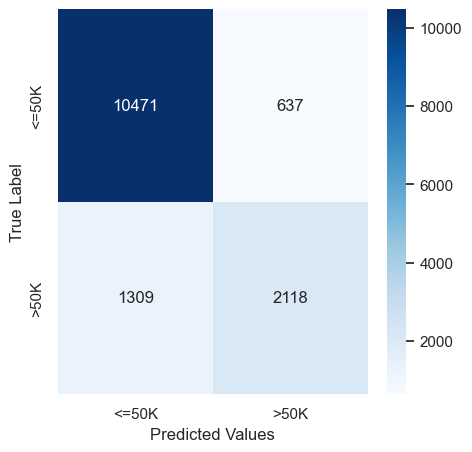

In [126]:
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt='.0f', xticklabels=labels, yticklabels=labels,cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

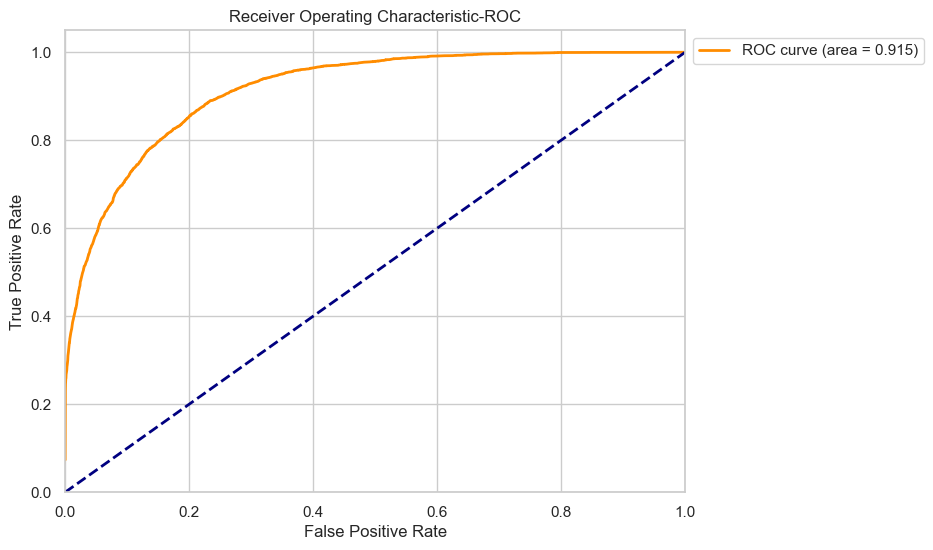

In [127]:
# Get predicted probabilities for the positive class
y_score = random_forest.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## 4.3 Naive bayes

In [128]:
from sklearn.naive_bayes import BernoulliNB

In [129]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
bnb_predictions = bnb.predict(X_test)

print('Train score:',bnb.score(X_train,y_train))
print('Test score:',bnb.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, bnb_predictions))

Train score: 0.7256509303217056
Test score: 0.7176470588235294
Classification report-----------------------
              precision    recall  f1-score   support

           0       0.89      0.72      0.79     11108
           1       0.44      0.72      0.55      3427

    accuracy                           0.72     14535
   macro avg       0.67      0.72      0.67     14535
weighted avg       0.79      0.72      0.74     14535



Text(29.75, 0.5, 'True Label')

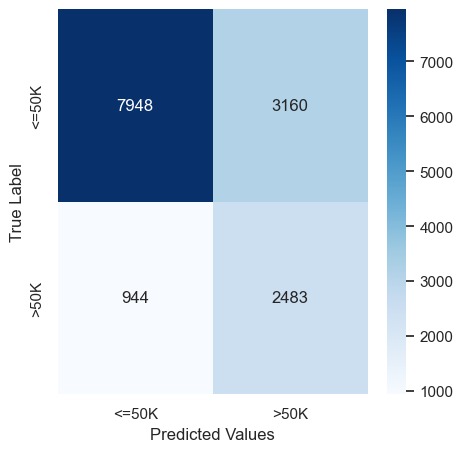

In [130]:
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, bnb_predictions), annot=True,fmt='.0f', xticklabels=labels, yticklabels=labels,cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

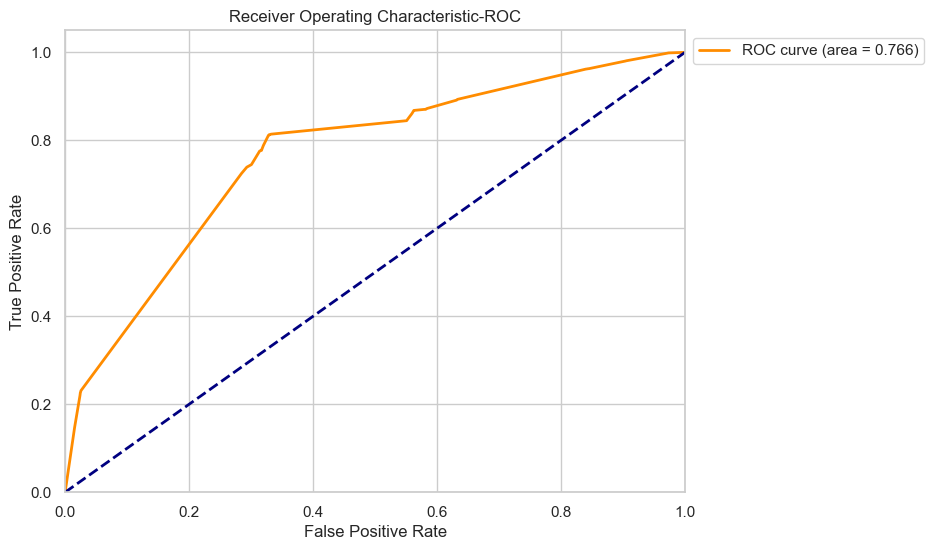

In [131]:
# Get predicted probabilities for the positive class
y_score = bnb.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## Parameter optimization (comment out this before running)

In [132]:
def objective(trial):

    # Define hyperparameters to optimize
    alpha = trial.suggest_loguniform('alpha', 1e-10, 1.0)
    fit_prior = trial.suggest_categorical('fit_prior', [True, False])
    binarize = trial.suggest_uniform('binarize', 0.0, 1.0)

    # Train the model with suggested hyperparameters
    clf = BernoulliNB(alpha=alpha, fit_prior=fit_prior, binarize=binarize)
    clf.fit(X_train, y_train)

    # Evaluate the model
    val_predictions = clf.predict(X_test)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Penalize if the model overfits
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    if train_accuracy - val_accuracy > 3:  # Adjust threshold as needed
        penalty = 100  # Penalize heavily for overfitting
    else:
        penalty = 0

    # Return the value to optimize
    return 1 - val_accuracy + penalty

# Perform optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train the final model with the best parameters
best_clf = BernoulliNB(**best_params)
best_clf.fit(X_train, y_train)

# Evaluate the final model
final_train_accuracy = accuracy_score(y_train, best_clf.predict(X_train))
final_test_accuracy = accuracy_score(y_test, best_clf.predict(X_test))

print("Final Training Accuracy:", final_train_accuracy)
print("Final Testing Accuracy:", final_test_accuracy)

[I 2024-03-29 19:18:54,690] A new study created in memory with name: no-name-8f84f7e0-8181-44a0-b67e-56dccb8b00f2
[I 2024-03-29 19:18:54,738] Trial 0 finished with value: 0.2823529411764706 and parameters: {'alpha': 6.453240226690487e-05, 'fit_prior': True, 'binarize': 0.1634737915302482}. Best is trial 0 with value: 0.2823529411764706.
[I 2024-03-29 19:18:54,769] Trial 1 finished with value: 0.2823529411764706 and parameters: {'alpha': 8.668184040064911e-09, 'fit_prior': True, 'binarize': 0.05070159610712033}. Best is trial 0 with value: 0.2823529411764706.
[I 2024-03-29 19:18:54,817] Trial 2 finished with value: 0.2823529411764706 and parameters: {'alpha': 0.03341625723069223, 'fit_prior': True, 'binarize': 0.9716645666109841}. Best is trial 0 with value: 0.2823529411764706.
[I 2024-03-29 19:18:54,848] Trial 3 finished with value: 0.29453044375645 and parameters: {'alpha': 0.04661489486277505, 'fit_prior': False, 'binarize': 0.9107451052993243}. Best is trial 0 with value: 0.28235294

Best Parameters: {'alpha': 6.453240226690487e-05, 'fit_prior': True, 'binarize': 0.1634737915302482}
Final Training Accuracy: 0.7256509303217056
Final Testing Accuracy: 0.7176470588235294


### Model training with optimized parameters

In [133]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB(alpha= 1.5634347411282968e-06, fit_prior=True, binarize=0.09394475277108971)
bnb.fit(X_train,y_train)
bnb_predictions = bnb.predict(X_test)

print('Train score:',bnb.score(X_train,y_train))
print('Test score:',bnb.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, bnb_predictions))

Train score: 0.7256509303217056
Test score: 0.7176470588235294
Classification report-----------------------
              precision    recall  f1-score   support

           0       0.89      0.72      0.79     11108
           1       0.44      0.72      0.55      3427

    accuracy                           0.72     14535
   macro avg       0.67      0.72      0.67     14535
weighted avg       0.79      0.72      0.74     14535



Text(29.75, 0.5, 'True Label')

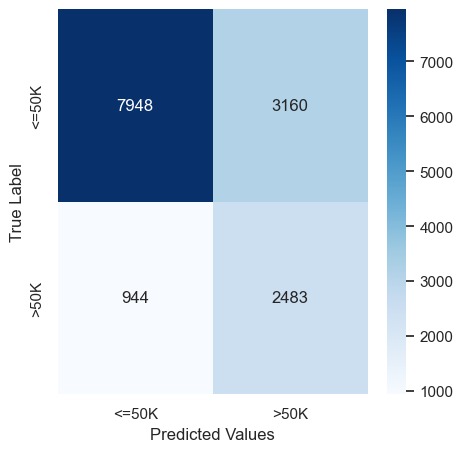

In [134]:
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, bnb_predictions), annot=True,fmt='.0f', xticklabels=labels, yticklabels=labels,cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

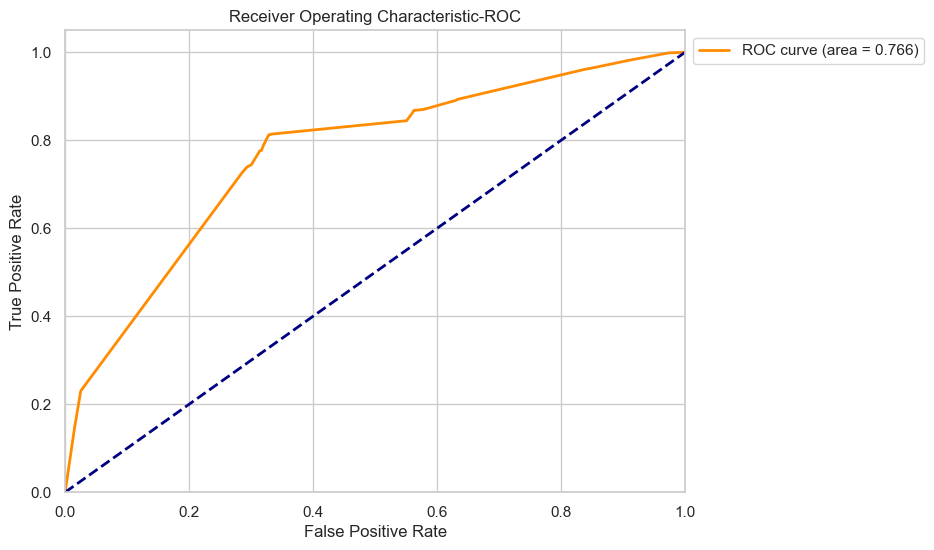

In [135]:
# Get predicted probabilities for the positive class
y_score = bnb.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# 5. Imbalace Learning

In [136]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [137]:
from imblearn.over_sampling import SMOTE

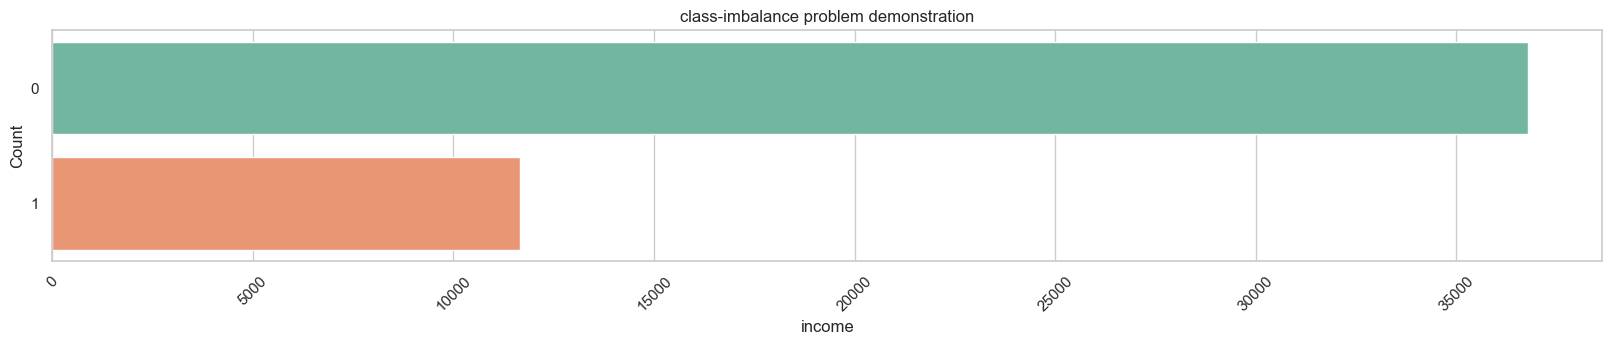

                    value_counts  ratio_to_highest_value_count  percentage
race                                                                      
White                      41728                      1.000000   86.129458
Black                       4680                      0.112155    9.659841
Asian-Pac-Islander          1518                      0.036378    3.133256
Amer-Indian-Eskimo           470                      0.011263    0.970112
Other                        406                      0.009730    0.838012


In [138]:
plt.figure(figsize=(20, 3))
sns.countplot(y=df1['income'], palette='Set2')
plt.title('class-imbalance problem demonstration')
plt.xlabel('income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

In [139]:
print('Original dataset shapep: ',y.shape)

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=142)
X_smote, y_smote = sm.fit_resample(X, y)

print('Resampled dataset shape: ',y_smote.shape)

Original dataset shapep:  (48448,)


Resampled dataset shape:  (73590,)


In [140]:
y_smote.value_counts()

income
0    36795
1    36795
Name: count, dtype: int64

# 6. Model Implementation after imbalance learning

## 6.1. Train, Test Data Split

In [141]:
#Split data into separate training and test set after imbalanced learning
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 142)#50

## 6.2. RandomForestClassifier


In [142]:
random_forest = RandomForestClassifier(random_state=142)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

print('Train score:',random_forest.score(X_train,y_train))
print('Test score:',random_forest.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, predictions))

Train score: 0.9567681944363559
Test score: 0.8725823254971237
Classification report-----------------------
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     11026
           1       0.85      0.90      0.88     11051

    accuracy                           0.87     22077
   macro avg       0.87      0.87      0.87     22077
weighted avg       0.87      0.87      0.87     22077



Text(29.75, 0.5, 'True Label')

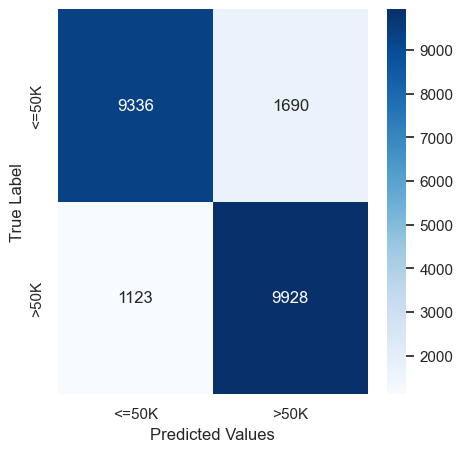

In [143]:
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt='.0f', xticklabels=labels, yticklabels=labels,cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

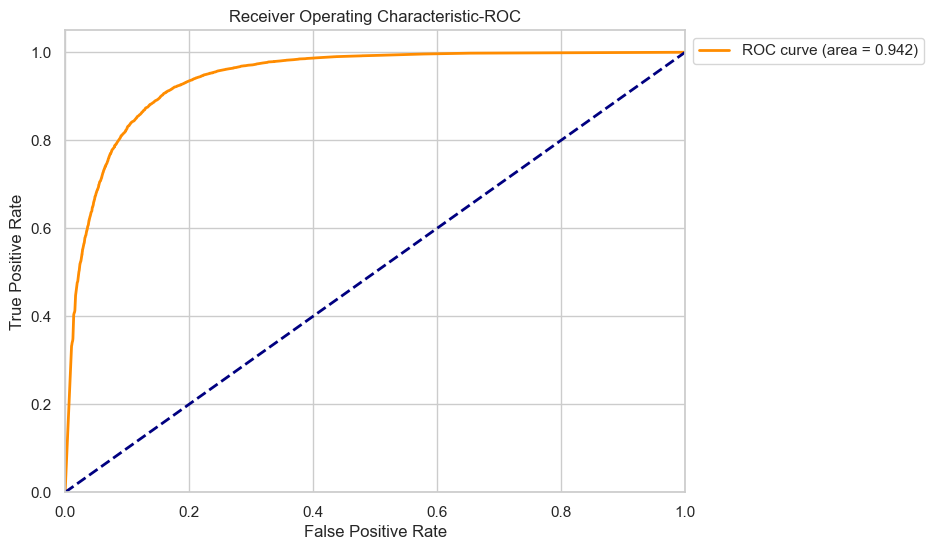

In [144]:
# Get predicted probabilities for the positive class
y_score = random_forest.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## Parameter optimization (comment out this before running)

In [145]:
def objective(trial):

    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 40, 110)
    max_depth = trial.suggest_categorical('max_depth', [None, *range(90, 100)])
    min_samples_split = trial.suggest_int('min_samples_split', 3, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2']) 

    # Instantiate the random forest classifier with the suggested hyperparameters
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 max_features=max_features,
                                 n_jobs=-1,
                                 random_state=142)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Calculate training and testing accuracy
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    # Penalize the objective if the conditions are not met
    penalty = 0
    if test_accuracy<0.865 or  train_accuracy>  0.895:
        penalty = 10000  # Apply a large penalty to steer optimization away from violating conditions

    # Minimize the objective function (1 - testing accuracy) with overfitting penalty
    return 1 - test_accuracy + penalty

# Perform optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train the final model with the best parameters
best_clf = RandomForestClassifier(**best_params, random_state=142)
best_clf.fit(X_train, y_train)

# Evaluate the final model
final_train_accuracy = accuracy_score(y_train, best_clf.predict(X_train))
final_test_accuracy = accuracy_score(y_test, best_clf.predict(X_test))

print("Final Training Accuracy:", final_train_accuracy)
print("Final Testing Accuracy:", final_test_accuracy)
print('Classification report-----------------------')
print(classification_report(y_test, best_clf.predict(X_test)))


[I 2024-03-29 19:19:33,759] A new study created in memory with name: no-name-794422fa-ba39-4a73-987f-53b1ce23b1b1
[I 2024-03-29 19:19:34,958] Trial 0 finished with value: 10000.131947275446 and parameters: {'n_estimators': 104, 'max_depth': 90, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 10000.131947275446.
[I 2024-03-29 19:19:35,641] Trial 1 finished with value: 10000.131131947275 and parameters: {'n_estimators': 59, 'max_depth': 95, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 10000.131131947275.
[I 2024-03-29 19:19:36,409] Trial 2 finished with value: 10000.144313086017 and parameters: {'n_estimators': 66, 'max_depth': 90, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 1 with value: 10000.131131947275.
[I 2024-03-29 19:19:36,988] Trial 3 finished with value: 0.13452914798206284 and parameters: {'n_estimators': 51, 'max_depth': 93, 'mi

Best Parameters: {'n_estimators': 50, 'max_depth': 92, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}
Final Training Accuracy: 0.8910760390581018
Final Testing Accuracy: 0.8678262445078588
Classification report-----------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     11026
           1       0.84      0.91      0.87     11051

    accuracy                           0.87     22077
   macro avg       0.87      0.87      0.87     22077
weighted avg       0.87      0.87      0.87     22077



In [146]:
# 1
# Best Parameters: {'n_estimators': 107, 'max_depth': 96, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
# Final Training Accuracy: 0.9014617669326189
# Final Testing Accuracy: 0.8710875571862119
# Classification report-----------------------
#               precision    recall  f1-score   support

#            0       0.90      0.83      0.87     11031
#            1       0.85      0.91      0.88     11046

#     accuracy                           0.87     22077
#    macro avg       0.87      0.87      0.87     22077
# weighted avg       0.87      0.87      0.87     22077

In [147]:
# 2
# Best Parameters: {'n_estimators': 50, 'max_depth': 97, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
# Final Training Accuracy: 0.8910760390581018
# Final Testing Accuracy: 0.8678262445078588
# Classification report-----------------------
#               precision    recall  f1-score   support

#            0       0.90      0.83      0.86     11026
#            1       0.84      0.91      0.87     11051

#     accuracy                           0.87     22077
#    macro avg       0.87      0.87      0.87     22077
# weighted avg       0.87      0.87      0.87     22077

### Model training with optimized parameters

In [148]:
random_forest = RandomForestClassifier(n_estimators=50, max_depth=97, min_samples_split=10, min_samples_leaf=4, max_features= 'sqrt',random_state=142)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
print('Train score:',random_forest.score(X_train,y_train))
print('Test score:',random_forest.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, predictions))

Train score: 0.8910760390581018
Test score: 0.8678262445078588
Classification report-----------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     11026
           1       0.84      0.91      0.87     11051

    accuracy                           0.87     22077
   macro avg       0.87      0.87      0.87     22077
weighted avg       0.87      0.87      0.87     22077



Text(29.75, 0.5, 'True Label')

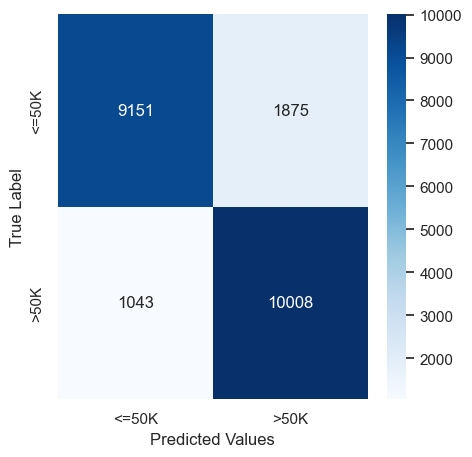

In [149]:
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt='.0f', xticklabels=labels, yticklabels=labels,cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

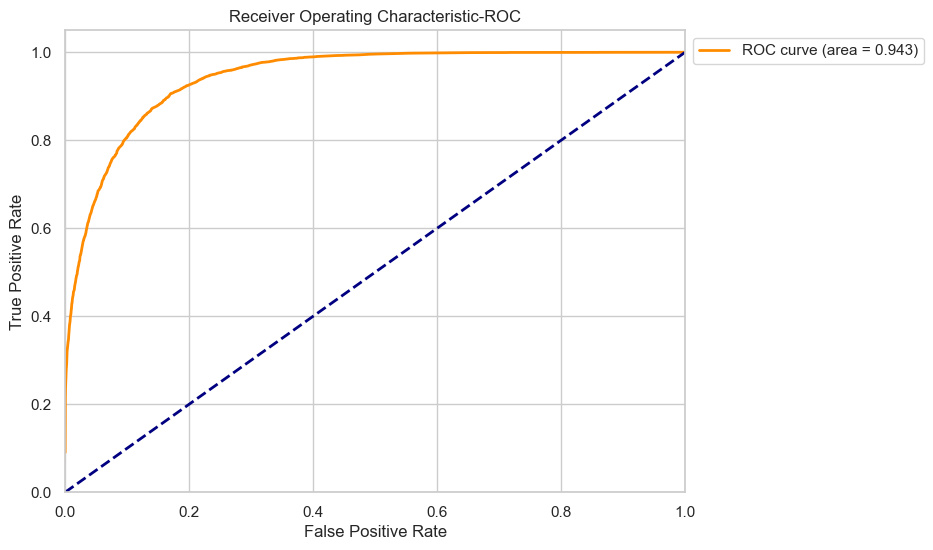

In [150]:
# Get predicted probabilities for the positive class
y_score = random_forest.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## 5.3. Naive Bayes

In [151]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
bnb_predictions = bnb.predict(X_test)

print('Train score:',bnb.score(X_train,y_train))
print('Test score:',bnb.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, bnb_predictions))

Train score: 0.7495001261817406
Test score: 0.7446663948906102
Classification report-----------------------
              precision    recall  f1-score   support

           0       0.78      0.69      0.73     11026
           1       0.72      0.80      0.76     11051

    accuracy                           0.74     22077
   macro avg       0.75      0.74      0.74     22077
weighted avg       0.75      0.74      0.74     22077



Text(29.75, 0.5, 'True Label')

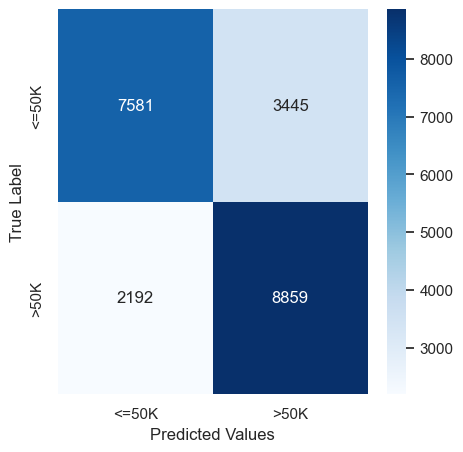

In [152]:
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, bnb_predictions), annot=True,fmt='.0f', xticklabels=labels, yticklabels=labels,cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

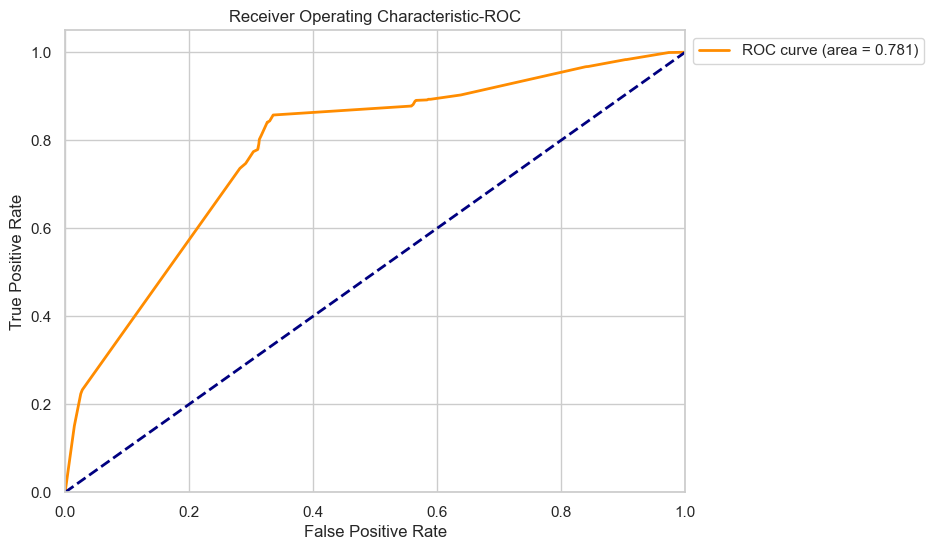

In [153]:
# Get predicted probabilities for the positive class
y_score = bnb.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Parameter optimization (comment out this before running)

In [154]:
def objective(trial):

    # Define hyperparameters to optimize
    alpha_values = [1, 2, 3, 5, 6,7,8,9,10,11,12]
    alpha = trial.suggest_categorical('alpha', alpha_values)
    fit_prior = trial.suggest_categorical('fit_prior', [True, False])
    binarize_values = [0.0, 0.1,0.3, 0.2,0.4, 0.5, 0.8, 1.0]
    #binarize = trial.suggest_categorical('binarize', binarize_values)
    binarize = trial.suggest_uniform('binarize', 0.0, 1.0)

    # Train the model with suggested hyperparameters
    clf = BernoulliNB(alpha=alpha, fit_prior=fit_prior, binarize=binarize)
    clf.fit(X_train, y_train)

    # Evaluate the model
    val_predictions = clf.predict(X_test)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # # Penalize if the model overfits
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    # if train_accuracy - val_accuracy > 3:  # Adjust threshold as needed
    #     penalty = 100  # Penalize heavily for overfitting
    # else:
    #     penalty = 0

    # # Return the value to optimize
    # return 1 - val_accuracy + penalty

    penalty = 0
    if val_accuracy<0.8 or  train_accuracy>  0.83:
        penalty = 10000  # Apply a large penalty to steer optimization away from violating conditions

    # Minimize the objective function (1 - testing accuracy) with overfitting penalty
    return 1 - val_accuracy + penalty

# Perform optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train the final model with the best parameters
best_clf = BernoulliNB(**best_params)
best_clf.fit(X_train, y_train)

# Evaluate the final model
final_train_accuracy = accuracy_score(y_train, best_clf.predict(X_train))
final_test_accuracy = accuracy_score(y_test, best_clf.predict(X_test))

print("Final Training Accuracy:", final_train_accuracy)
print("Final Testing Accuracy:", final_test_accuracy)

[I 2024-03-29 19:23:04,714] A new study created in memory with name: no-name-4c2488c0-2cf8-4eea-8bf9-e3509c047a30
[I 2024-03-29 19:23:04,860] Trial 0 finished with value: 10000.25533360511 and parameters: {'alpha': 5, 'fit_prior': False, 'binarize': 0.9147533686863651}. Best is trial 0 with value: 10000.25533360511.
[I 2024-03-29 19:23:04,940] Trial 1 finished with value: 10000.25533360511 and parameters: {'alpha': 9, 'fit_prior': True, 'binarize': 0.4255180764657335}. Best is trial 0 with value: 10000.25533360511.
[I 2024-03-29 19:23:05,015] Trial 2 finished with value: 10000.25533360511 and parameters: {'alpha': 1, 'fit_prior': True, 'binarize': 0.780261247572014}. Best is trial 0 with value: 10000.25533360511.
[I 2024-03-29 19:23:05,082] Trial 3 finished with value: 10000.25533360511 and parameters: {'alpha': 9, 'fit_prior': False, 'binarize': 0.36321184945575924}. Best is trial 0 with value: 10000.25533360511.
[I 2024-03-29 19:23:05,161] Trial 4 finished with value: 10000.255333605

Best Parameters: {'alpha': 5, 'fit_prior': False, 'binarize': 0.9147533686863651}
Final Training Accuracy: 0.7495001261817406
Final Testing Accuracy: 0.7446663948906102


### Model training with optimized parameters

In [155]:
bnb=BernoulliNB(alpha= 2.097240966282802,fit_prior=False, binarize= 0.2378006681238779)
bnb.fit(X_train,y_train)
bnb_predictions = bnb.predict(X_test)

print('Train score:',bnb.score(X_train,y_train))
print('Test score:',bnb.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, bnb_predictions))

Train score: 0.7495001261817406
Test score: 0.7446663948906102
Classification report-----------------------
              precision    recall  f1-score   support

           0       0.78      0.69      0.73     11026
           1       0.72      0.80      0.76     11051

    accuracy                           0.74     22077
   macro avg       0.75      0.74      0.74     22077
weighted avg       0.75      0.74      0.74     22077



Text(29.75, 0.5, 'True Label')

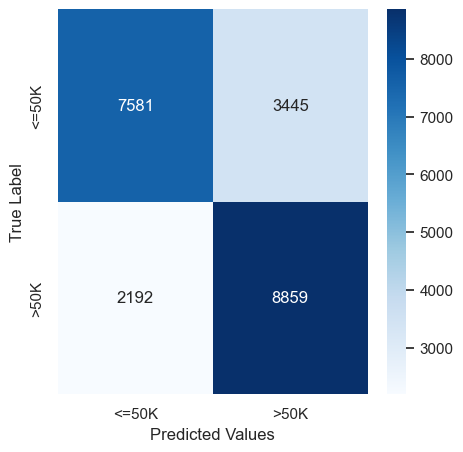

In [156]:
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, bnb_predictions), annot=True,fmt='.0f', xticklabels=labels, yticklabels=labels,cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

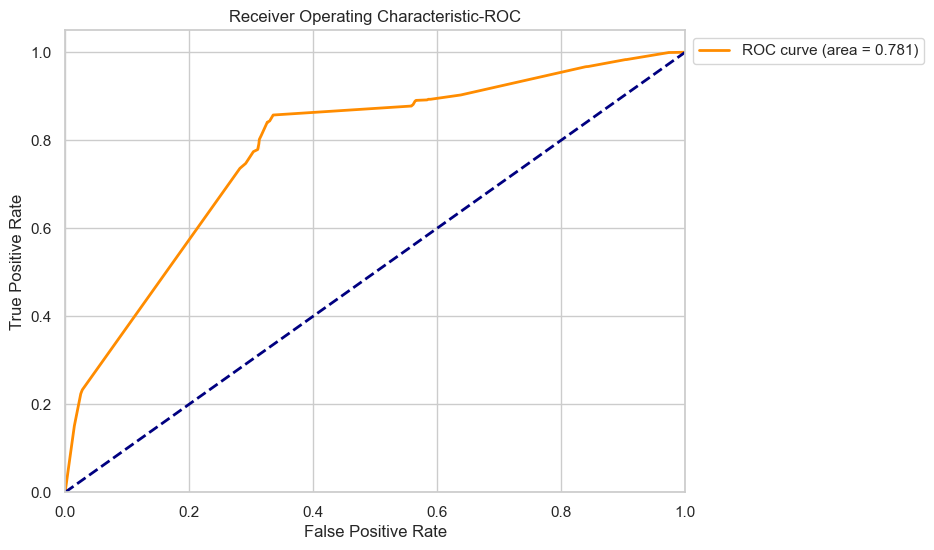

In [157]:
# Get predicted probabilities for the positive class
y_score = bnb.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# Summary

- Red- Before imbalace learning
- Black- After imbalance learning

| Algorithm                                      | Train Score | Test Score | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1-Score (Class 0) | F1-Score (Class 1) | Accuracy | Models Overfit or Not | Overall Ranking |
|------------------------------------------------|-------------|------------|----------------------|----------------------|------------------|------------------|---------------------|---------------------|----------|-----------------------|-----------------|
| <span style="color:red">Random Forest Regressor</span>   | 72.57%      | 71.76%     | 89%                  | 44%                  | 72%              | 72%              | 79%                 | 55%                 | 72%      | Yes                   | 5               |
| <span style="color:red">Parameter-Optimized Random Forest Regressor</span> | 88.41% | 86.61% | 89%                  | 44%                  | 72%              | 72%              | 79%                 | 55%                 | 72%      | No                    | 4               |
| <span style="color:red">Bernoulli Naive Bayes(Both Parameter optimized and not)</span> | 72.57% | 71.76% | 78%                  | 44%                  | 69%              | 62%              | 73%                 | 52%                 | 72%      | No                   | 6               |
| Random Forest Regressor                        | 95.68%      | 87.26%     | 89%                  | 85%                  | 85%              | 90%              | 87%                 | 88%                 | 87%      | Yes                    | 2               |
| Parameter-Optimized Random Forest Regressor    | 89.11%      | 86.78%     | 90%                  | 84%                  | 83%              | 91%              | 86%                 | 87%                 | 87%      | No                    | 1               |
| Bernoulli Naive Bayes(Both Parameter optimized and not) | 74.95% | 74.47% | 78%                  | 72%                  | 69%              | 80%              | 73%                 | 76%                 | 74%      | No                    | 3               |
